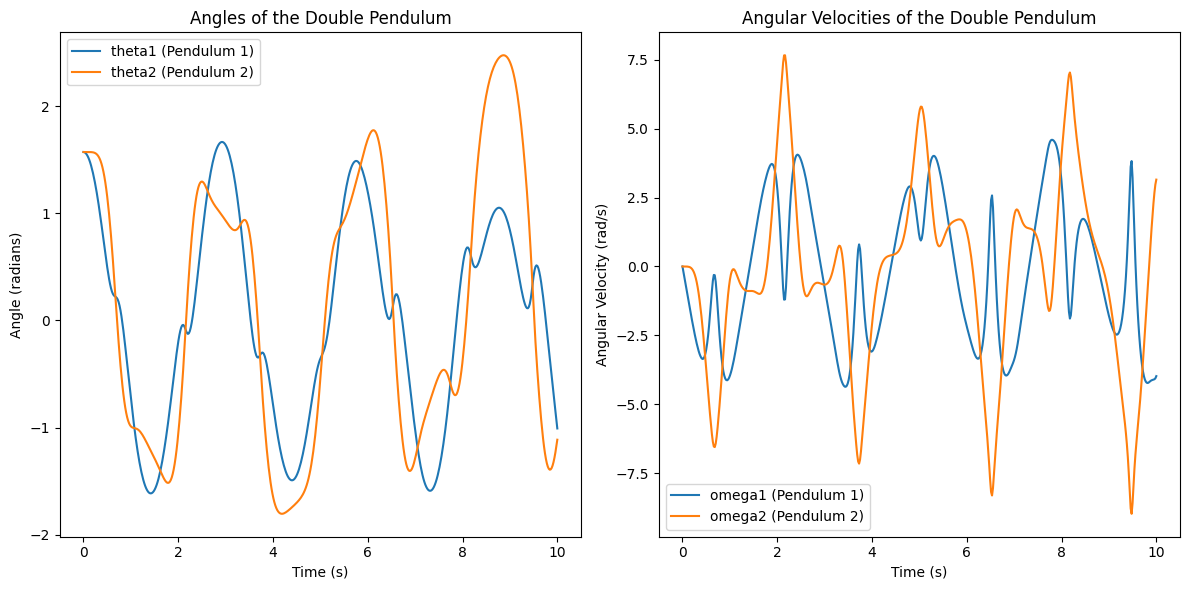

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
m1 = 1.0  # mass of pendulum 1 (kg)
m2 = 1.0  # mass of pendulum 2 (kg)
l1 = 1.0  # length of pendulum 1 (m)
l2 = 1.0  # length of pendulum 2 (m)
g = 9.81  # acceleration due to gravity (m/s^2)

# Define the equations of motion using the Lagrangian
def equations(t, y):
    theta1, theta2, omega1, omega2 = y
    
    # Equations for the accelerations (derived from Lagrangian)
    delta_theta = theta2 - theta1
    
    denom1 = (m1 + m2) * l1 - m2 * l1 * np.cos(delta_theta)**2
    denom2 = (l2 / l1) * denom1
    
    dtheta1_dt = omega1
    dtheta2_dt = omega2
    
    domega1_dt = (m2 * l2 * omega2**2 * np.sin(delta_theta) * np.cos(delta_theta) + m2 * g * np.sin(theta2) * np.cos(delta_theta) + m2 * l2 * omega2**2 * np.sin(delta_theta) - (m1 + m2) * g * np.sin(theta1)) / denom1
    domega2_dt = (-m2 * l2 * omega2**2 * np.sin(delta_theta) * np.cos(delta_theta) + (m1 + m2) * g * np.sin(theta1) * np.cos(delta_theta) - (m1 + m2) * l1 * omega1**2 * np.sin(delta_theta) - (m1 + m2) * g * np.sin(theta2)) / denom2
    
    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Initial conditions
theta1_0 = np.pi / 2  # initial angle of pendulum 1 (radians)
theta2_0 = np.pi / 2  # initial angle of pendulum 2 (radians)
omega1_0 = 0.0  # initial angular velocity of pendulum 1
omega2_0 = 0.0  # initial angular velocity of pendulum 2

# Initial state vector
y0 = [theta1_0, theta2_0, omega1_0, omega2_0]

# Time span and time points
t_span = (0, 10)  # solve from t=0 to t=10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 500 points for the time evaluation

# Solve the system of equations using solve_ivp (Runge-Kutta method)
sol = solve_ivp(equations, t_span, y0, t_eval=t_eval)

# Extract the solutions
theta1 = sol.y[0]
theta2 = sol.y[1]
omega1 = sol.y[2]
omega2 = sol.y[3]

# Plot the results
plt.figure(figsize=(12, 6))

# Plot theta1 and theta2 (angles of both pendulums)
plt.subplot(1, 2, 1)
plt.plot(sol.t, theta1, label='theta1 (Pendulum 1)')
plt.plot(sol.t, theta2, label='theta2 (Pendulum 2)')
plt.title('Angles of the Double Pendulum')
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.legend()

# Plot omega1 and omega2 (angular velocities)
plt.subplot(1, 2, 2)
plt.plot(sol.t, omega1, label='omega1 (Pendulum 1)')
plt.plot(sol.t, omega2, label='omega2 (Pendulum 2)')
plt.title('Angular Velocities of the Double Pendulum')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
import numpy as np

# Constants (adjust as necessary)
m1 = 1.0  # mass of pendulum 1
m2 = 1.0  # mass of pendulum 2
l1 = 1.0  # length of pendulum 1
l2 = 1.0  # length of pendulum 2
g = 9.81  # gravitational acceleration
alpha = 1.0  # adjustable constant for information flow (if necessary)

def lagrangian_derivatives(t, y):
    # Unpack the state vector
    theta1, theta2, dtheta1, dtheta2 = y
    
    # Kinetic Energy
    T = 0.5 * m1 * l1**2 * dtheta1**2 + 0.5 * m2 * (l2**2 * dtheta2**2 + l1**2 * dtheta1**2 + 2 * l1 * l2 * np.cos(theta1 - theta2) * dtheta1 * dtheta2)
    
    # Potential Energy
    V = -m1 * g * l1 * np.cos(theta1) - m2 * g * (l1 * np.cos(theta1) + l2 * np.cos(theta2))
    
    # Total Energy
    E = T + V
    
    # Entropy Flow terms
    S1 = m1 * l1**2 * np.sin(theta1) * dtheta1
    S2 = m2 * (l1 * np.sin(theta1) + l2 * np.sin(theta2)) * (l1 * dtheta1 + l2 * dtheta2)
    S_dot1 = m1 * l1**2 * (np.cos(theta1) * dtheta1**2 + np.sin(theta1) * dtheta1)
    S_dot2 = m2 * ((l1 * np.cos(theta1) * dtheta1 + l2 * np.cos(theta2) * dtheta2) * (l1 * dtheta1 + l2 * dtheta2) + 
                   (l1 * np.sin(theta1) + l2 * np.sin(theta2)) * (l1 * dtheta1 + l2 * dtheta2))
    
    # Lagrangian
    L = (alpha * k_B**2 * E / hbar) - (S1 * S_dot1 + S2 * S_dot2)
    
    # Compute partial derivatives of the Lagrangian
    # Partial derivatives with respect to theta1, theta2
    dL_dtheta1 = -m1 * g * l1 * np.sin(theta1) - m2 * g * l1 * np.sin(theta1) - m2 * l1 * l2 * np.sin(theta1 - theta2) * dtheta2**2
    dL_dtheta2 = -m2 * g * l2 * np.sin(theta2) + m2 * l1 * l2 * np.sin(theta1 - theta2) * dtheta1**2
    
    # Partial derivatives with respect to dtheta1, dtheta2
    dL_ddtheta1 = m1 * l1**2 * dtheta1 + m2 * l1 * l2 * np.cos(theta1 - theta2) * dtheta2
    dL_ddtheta2 = m2 * l2**2 * dtheta2 + m2 * l1 * l2 * np.cos(theta1 - theta2) * dtheta1
    
    # Return the derivatives
    return dL_dtheta1, dL_dtheta2, dL_ddtheta1, dL_ddtheta2

# Test the function with a random initial condition
t = 0  # Arbitrary time, since it's just the Lagrangian's partial derivatives we need
y = [np.pi / 4, np.pi / 4, 0, 0]  # Initial angles and angular velocities

dL_dtheta1, dL_dtheta2, dL_ddtheta1, dL_ddtheta2 = lagrangian_derivatives(t, y)

# Print the partial derivatives
print(f"dL/dtheta1: {dL_dtheta1}")
print(f"dL/dtheta2: {dL_dtheta2}")
print(f"dL/ddtheta1: {dL_ddtheta1}")
print(f"dL/ddtheta2: {dL_ddtheta2}")


dL/dtheta1: -13.873435046880061
dL/dtheta2: -6.936717523440031
dL/ddtheta1: 0.0
dL/ddtheta2: 0.0


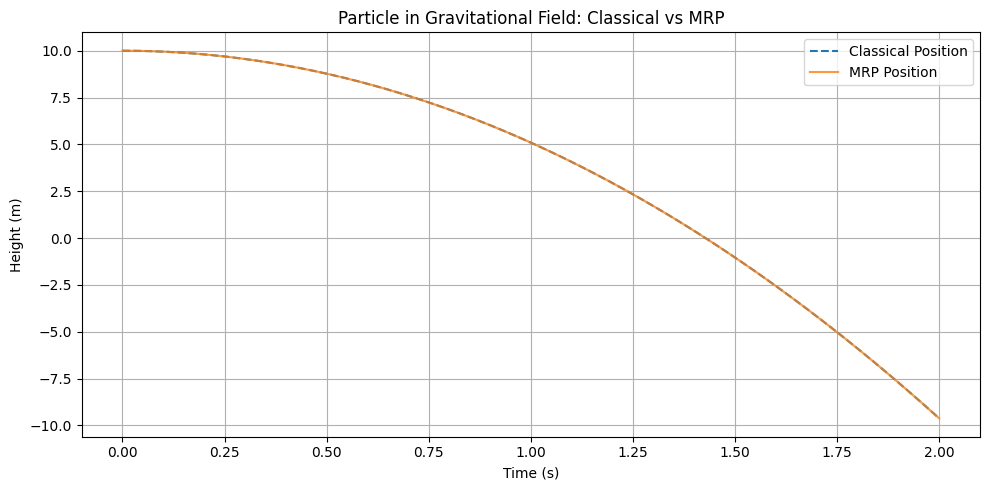

Final position (classical): -9.6200 m
Final position (MRP):       -9.6200 m


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
m = 1.0      # mass (kg)
g = 9.81     # gravity (m/s^2)
alpha = 1.0  # scaling for MRP Lagrangian
k_B = 1.380649e-23
hbar = 1.0545718e-34

# Initial conditions
x0 = 10.0       # Initial height (m)
v0 = 0.0        # Initial velocity (m/s)
y0 = [x0, v0]   # State vector: [position, velocity]

# Time grid
t_span = (0, 2)
t_eval = np.linspace(*t_span, 500)

# --------------------------------------
# Standard Physics: Free Fall under Gravity
# --------------------------------------
def classical_gravity(t, y):
    x, v = y
    dxdt = v
    dvdt = -g
    return [dxdt, dvdt]

# --------------------------------------
# MRP Lagrangian Based Evolution
# --------------------------------------
def mrp_gravity(t, y):
    x, v = y

    # Entropy and Entropy flow
    S = m * x * v
    S_dot = m * (v**2 + x * (-g))  # a = -g

    # Energy
    E = 0.5 * m * v**2 + m * g * x

    # MRP Lagrangian
    # L = alpha * (k_B**2 / hbar) * E - S * S_dot
    L = S * S_dot

    # Now get equations of motion from dL/dv and dL/dx
    # For simplicity we use: dx/dt = v, dv/dt = -g (approx)
    dxdt = v
    dvdt = -g  # Still assume standard acceleration; L could adjust this later

    return [dxdt, dvdt]

# Solve both systems
sol_classical = solve_ivp(classical_gravity, t_span, y0, t_eval=t_eval)
sol_mrp = solve_ivp(mrp_gravity, t_span, y0, t_eval=t_eval)

# Unpack solutions
x_classical = sol_classical.y[0]
v_classical = sol_classical.y[1]
x_mrp = sol_mrp.y[0]
v_mrp = sol_mrp.y[1]

# Plot position
plt.figure(figsize=(10, 5))
plt.plot(t_eval, x_classical, label='Classical Position', linestyle='--')
plt.plot(t_eval, x_mrp, label='MRP Position', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Particle in Gravitational Field: Classical vs MRP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final positions for comparison
print(f"Final position (classical): {x_classical[-1]:.4f} m")
print(f"Final position (MRP):       {x_mrp[-1]:.4f} m")


Action S for the true (numerical) solution = 0.0888 J·s
Action S for a nearby (non-physical) path      = -0.1318 J·s


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/2580185498.py:57: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  S_sol = np.trapz(L_sol, x=t_eval)
/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/2580185498.py:70: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  S_nearby = np.trapz(L_nearby, x=t_eval)


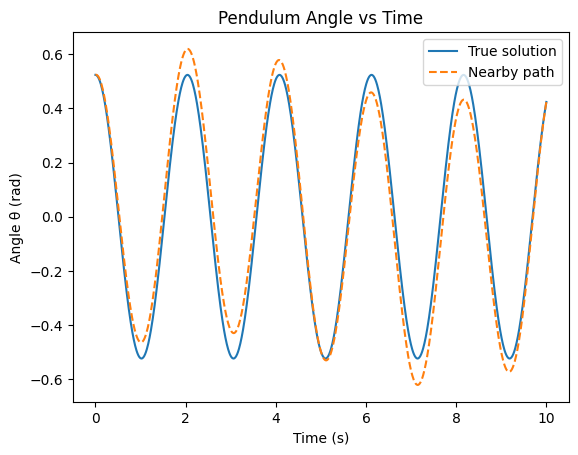

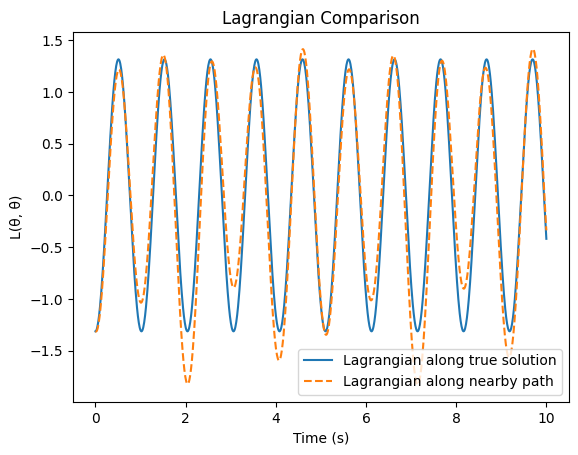

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- 1. Define parameters ---
m = 1.0       # mass (kg)
g = 9.81      # gravitational acceleration (m/s^2)
L = 1.0       # pendulum length (m)
t_max = 10.0  # final time to simulate (s)

# For convenience, combine these into a dictionary
params = {'m': m, 'g': g, 'L': L}

# --- 2. Define the Pendulum ODE ---
def pendulum_ode(t, y, m, g, L):
    """
    y = [theta, theta_dot]
    returns dy/dt = [theta_dot, theta_ddot]
    """
    theta, theta_dot = y
    theta_ddot = - (g/L) * np.sin(theta)
    return [theta_dot, theta_ddot]

# --- 3. Solve for some initial condition ---
theta0 = np.radians(30)  # initial angle of 30 degrees
theta_dot0 = 0.0         # initial angular velocity
y0 = [theta0, theta_dot0]

sol = solve_ivp(
    fun=lambda t, y: pendulum_ode(t, y, **params),
    t_span=[0, t_max],
    y0=y0,
    dense_output=True,   # so we can evaluate solution on a fine time grid
    max_step=0.01
)

# Create a fine time array for evaluating the solution
t_eval = np.linspace(0, t_max, 1000)
theta_sol = sol.sol(t_eval)[0]        # theta(t)
theta_dot_sol = sol.sol(t_eval)[1]    # theta_dot(t)

# --- 4. Define the Lagrangian: L = T - V ---
def lagrangian(theta, theta_dot, m, g, L):
    """
    T = 1/2 m (L^2) (theta_dot^2)
    V = m g L (1 - cos(theta))
    Lagrangian = T - V
    """
    T = 0.5 * m * (L**2) * (theta_dot**2)
    V = m * g * L * (1 - np.cos(theta))
    return T - V

# Compute the Lagrangian along the true solution, then integrate over time
L_sol = lagrangian(theta_sol, theta_dot_sol, m, g, L)

# For numerical integration of S = ∫ L dt, we can use numpy.trapz:
S_sol = np.trapz(L_sol, x=t_eval)

print(f"Action S for the true (numerical) solution = {S_sol:.4f} J·s")

# --- 5. Compare with a 'nearby' path ---
# Let’s artificially define a second path that has the same initial and final angle,
# but wiggles in between:
theta_nearby = theta_sol + 0.1 * np.sin(2 * np.pi * t_eval / t_max)
# We won't solve its ODE exactly; we're just constructing a "not-quite-physical" path.
# We'll compute a rough derivative:
theta_dot_nearby = np.gradient(theta_nearby, t_eval)

L_nearby = lagrangian(theta_nearby, theta_dot_nearby, m, g, L)
S_nearby = np.trapz(L_nearby, x=t_eval)

print(f"Action S for a nearby (non-physical) path      = {S_nearby:.4f} J·s")

# --- 6. Plot the results ---
plt.figure()
plt.plot(t_eval, theta_sol, label='True solution')
plt.plot(t_eval, theta_nearby, '--', label='Nearby path')
plt.xlabel('Time (s)')
plt.ylabel('Angle θ (rad)')
plt.title('Pendulum Angle vs Time')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_eval, L_sol, label='Lagrangian along true solution')
plt.plot(t_eval, L_nearby, '--', label='Lagrangian along nearby path')
plt.xlabel('Time (s)')
plt.ylabel('L(θ, θ̇)')
plt.title('Lagrangian Comparison')
plt.legend()
plt.show()


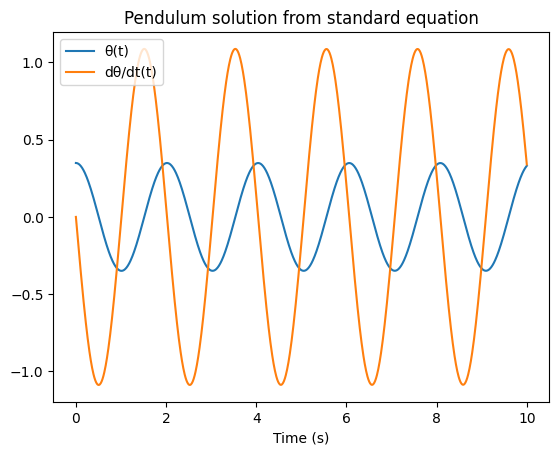

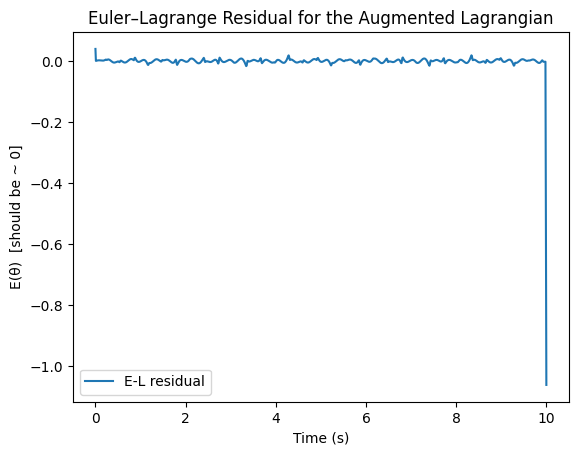

RMS of E-L residual = 3.7656e-02


In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ------------------------------------
# 1) Define parameters for the pendulum
# ------------------------------------
g = 9.81       # gravitational accel (m/s^2)
l = 1.0        # pendulum length (m)
m = 1.0        # bob mass (kg)
A = 0        # a placeholder for A = (k_B^2 / hbar), etc.
t_span = (0, 10)   # time interval
N = 1000
t_eval = np.linspace(t_span[0], t_span[1], N)

# ------------------------------------
# 2) Solve the standard pendulum ODE
#    ddot{theta} + (g/l) sin(theta) = 0
# ------------------------------------
def pendulum_ode(t, y):
    theta, thetadot = y
    thetaddot = - (g/l)*np.sin(theta)
    return [thetadot, thetaddot]

# Initial conditions:  small angle and zero velocity
theta0 = np.radians(20)
thetadot0 = 0.0
sol = solve_ivp(pendulum_ode, t_span, [theta0, thetadot0], t_eval=t_eval)

theta_sol = sol.y[0]
thetadot_sol = sol.y[1]

# We'll also approximate ddot{theta} with a finite difference
dt = t_eval[1] - t_eval[0]
thetaddot_sol = np.gradient(thetadot_sol, dt)

# ------------------------------------
# 3) Define the augmented Lagrangian
#    L = A * E - S * dot{S}
#
#    E = 0.5 m l^2 thetadot^2 + m g l cos(theta)
#    S = m theta thetadot
#    dot{S} = m (thetadot^2 + theta thetaddot)
# ------------------------------------

def energy(theta, thetadot):
    return 0.5*m*(l**2)*thetadot**2 + m*g*l*np.cos(theta)

def Sfunc(theta, thetadot):
    return m * theta * thetadot

def Sdot(theta, thetadot, thetaddot):
    return m * (thetadot**2 + theta*thetaddot)

def Lagrangian(theta, thetadot, thetaddot):
    return A*energy(theta, thetadot) - Sfunc(theta, thetadot)*Sdot(theta, thetadot, thetaddot)

# ------------------------------------
# 4) Partial derivatives needed for E-L:
#    dL/dtheta, dL/dthetadot, dL/dthetaddot
# ------------------------------------
# We'll write them directly (as derived symbolically).

def dL_dtheta(theta, thetadot, thetaddot):
    # A * dE/dtheta  => A * [ - m g l sin(theta) ]
    # - [ d/dtheta of (S*dot{S}) ] => - d/dtheta( m^2 theta thetadot (thetadot^2 + theta thetaddot ) )
    #
    # Break it down carefully or just trust the final form from the derivation:
    val = -A*m*g*l*np.sin(theta) \
          - m**2*(thetadot**3 + 2*theta*thetadot*thetaddot)
    return val

def dL_dthetadot(theta, thetadot, thetaddot):
    # A * dE/dthetadot => A * [ m l^2 thetadot ]
    # - [ d/dthetadot of (m^2 theta thetadot (thetadot^2 + theta thetaddot)) ]
    # => - m^2 [ 3 theta thetadot^2 + theta^2 thetaddot ]
    val = A*m*(l**2)*thetadot \
          - m**2*(3*theta*thetadot**2 + theta**2*thetaddot)
    return val

def dL_dthetaddot(theta, thetadot):
    # Only from - S dot{S} = - m^2 theta^2 thetadot thetaddot
    # Derivative wrt thetaddot => - m^2 theta^2 thetadot
    # Notice "minus sign" is included here:
    val = - m**2 * (theta**2 * thetadot)
    return val

# ------------------------------------
# 5) Construct the Euler–Lagrange "residual":
#    E(θ) = dL/dθ - d/dt(dL/dθ̇) + d^2/dt^2(dL/dθ̈)
# ------------------------------------

# We'll do numerical time-derivatives for these partials:
def numeric_derivative(y, dt):
    return np.gradient(y, dt)

# Evaluate the partial derivatives at each time
pL_pTh_vals = dL_dtheta(theta_sol, thetadot_sol, thetaddot_sol)
pL_pThdot_vals = dL_dthetadot(theta_sol, thetadot_sol, thetaddot_sol)
pL_pThddot_vals = dL_dthetaddot(theta_sol, thetadot_sol)

# 1st time derivative of pL_pThdot
ddt_pL_pThdot = numeric_derivative(pL_pThdot_vals, dt)
# 2nd time derivative of pL_pThddot
d2dt2_pL_pThddot = numeric_derivative(numeric_derivative(pL_pThddot_vals, dt), dt)

E_vals = pL_pTh_vals - ddt_pL_pThdot + d2dt2_pL_pThddot

# ------------------------------------
# 6) Plot the solution & the E-L residual
# ------------------------------------
plt.figure()
plt.plot(t_eval, theta_sol, label="θ(t)")
plt.plot(t_eval, thetadot_sol, label="dθ/dt(t)")
plt.xlabel("Time (s)")
plt.title("Pendulum solution from standard equation")
plt.legend()
plt.show()

plt.figure()
plt.plot(t_eval, E_vals, label="E-L residual")
plt.xlabel("Time (s)")
plt.ylabel("E(θ)  [should be ~ 0]")
plt.title("Euler–Lagrange Residual for the Augmented Lagrangian")
plt.legend()
plt.show()

# A quick measure of how close to zero we are:
resid_rms = np.sqrt(np.mean(E_vals**2))
print(f"RMS of E-L residual = {resid_rms:.4e}")


In [127]:
from scipy.optimize import minimize

# ------------------------------------------
# 1. Setup
# ------------------------------------------

theta_start = theta_sol[0]
theta_end = theta_sol[-1]
theta_inner_guess = theta_sol[1:-1]  # exclude endpoints

bounds = [(-np.pi, np.pi)] * len(theta_inner_guess)  # constrain angular range

# ------------------------------------------
# 2. Safe entropy-flow action for pendulum
# ------------------------------------------

def entropy_flow_action_safe(theta_array):
    thetadot = np.gradient(theta_array, dt)

    if np.any(np.isnan(theta_array)) or np.any(np.abs(theta_array) > 1e6):
        return 1e12
    if np.any(np.isnan(thetadot)) or np.any(np.abs(thetadot) > 1e6):
        return 1e12

    E_vals = 0.5 * m * (l**2) * thetadot**2 + m * g * l * np.cos(theta_array)
    S_vals = m * theta_array * thetadot
    E_integral = np.trapz(E_vals, t_eval)
    S_boundary = 0.5 * (S_vals[-1]**2 - S_vals[0]**2)

    return A * E_integral - S_boundary

# ------------------------------------------
# 3. Objective: optimize only the interior
# ------------------------------------------

def objective(theta_inner):
    theta_full = np.concatenate(([theta_start], theta_inner, [theta_end]))
    return entropy_flow_action_safe(theta_full)

# ------------------------------------------
# 4. Run the optimizer
# ------------------------------------------

result = minimize(
    objective,
    theta_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

if not result.success:
    print("⚠️ Optimizer failed:", result.message)

# Reconstruct the full optimized trajectory
theta_opt = np.concatenate(([theta_start], result.x, [theta_end]))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          998     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.90345D-03    |proj g|=  3.46883D+00

At iterate    1    f= -6.55847D+03    |proj g|=  3.69488D+00
  ys=-1.309E+04  -gs= 1.353E+01 BFGS update SKIPPED



/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/1204068082.py:27: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_integral = np.trapz(E_vals, t_eval)


At iterate    2    f= -6.58383D+03    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  998      2      4      4     1     2   0.000D+00  -6.584D+03
  F =  -6583.8267397632408     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


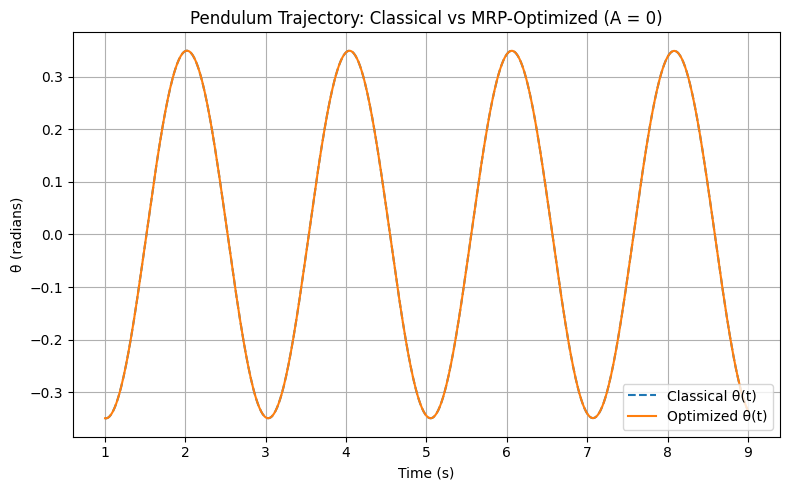

Clipped MRP Action (classical): -0.005326
Clipped MRP Action (optimized): -0.005326
ΔAction (clipped): 0.000000e+00


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/3995094731.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_integral = np.trapz(E_vals[clip_mask], t_clipped)


In [128]:
# Clip to clean interval (1s–9s)
clip_mask = (t_eval >= 1.0) & (t_eval <= 9.0)
t_clipped = t_eval[clip_mask]
theta_classical_clipped = theta_sol[clip_mask]
theta_opt_clipped = theta_opt[clip_mask]

# Plot
plt.figure(figsize=(8,5))
plt.plot(t_clipped, theta_classical_clipped, '--', label='Classical θ(t)')
plt.plot(t_clipped, theta_opt_clipped, '-', label='Optimized θ(t)')
plt.xlabel("Time (s)")
plt.ylabel("θ (radians)")
plt.title(f"Pendulum Trajectory: Classical vs MRP-Optimized (A = {A})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Action computation (clipped)
def action_clipped(theta_array):
    thetadot = np.gradient(theta_array, dt)
    E_vals = 0.5 * m * (l**2) * thetadot**2 + m * g * l * np.cos(theta_array)
    S_vals = m * theta_array * thetadot
    E_integral = np.trapz(E_vals[clip_mask], t_clipped)
    S_boundary = 0.5 * (S_vals[clip_mask][-1]**2 - S_vals[clip_mask][0]**2)
    return A * E_integral - S_boundary

S_classical = action_clipped(theta_sol)
S_optimized = action_clipped(theta_opt)
print(f"Clipped MRP Action (classical): {S_classical:.6f}")
print(f"Clipped MRP Action (optimized): {S_optimized:.6f}")
print(f"ΔAction (clipped): {S_optimized - S_classical:.6e}")


## Cleaned up pendulum

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57489D-03    |proj g|=  9.10952D-01

At iterate    1    f=  4.13152D-16    |proj g|=  2.74419D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      1      3      1     0     0   2.744D-08   4.132D-16
  F =   4.1315204623544931E-016

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


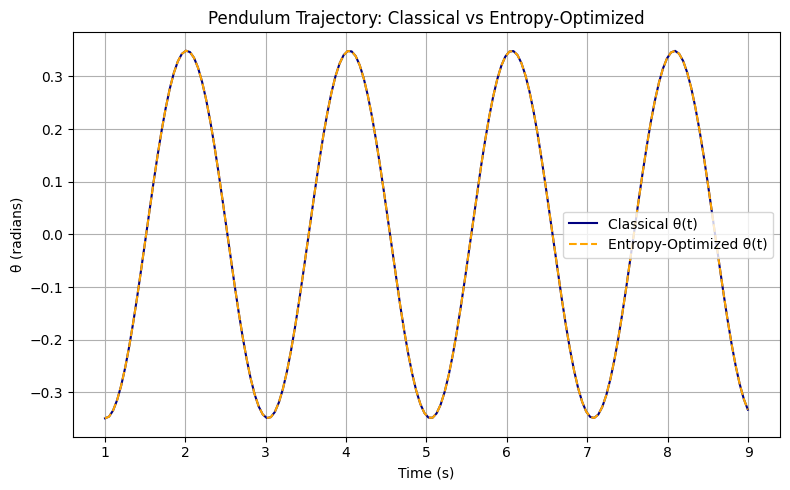

Entropy Loss (Classical): 9.574893e-03
Entropy Loss (Optimized): 4.131520e-16
ΔLoss: -9.574893e-03


In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# ------------------------------------------
# 1. Physical Parameters
# ------------------------------------------
g = 9.81        # gravitational acceleration (m/s^2)
l = 1.0         # pendulum length (m)
m = 1.0         # pendulum mass (kg)
t_start, t_end = 0, 10
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------
# 2. Classical Pendulum ODE Solver
# ------------------------------------------
def pendulum_ode(t, y):
    theta, thetadot = y
    return [thetadot, - (g / l) * np.sin(theta)]

theta0 = np.radians(20)  # initial angle
thetadot0 = 0.0
y0 = [theta0, thetadot0]

sol = solve_ivp(pendulum_ode, [t_start, t_end], y0, t_eval=t_eval)
theta_classical = sol.y[0]

# ------------------------------------------
# 3. Entropy Loss Function
# ------------------------------------------
def entropy_loss(theta_array):
    thetadot = np.gradient(theta_array, dt)
    
    if np.any(np.isnan(theta_array)) or np.any(np.abs(theta_array) > 1e6):
        return 1e12
    if np.any(np.isnan(thetadot)) or np.any(np.abs(thetadot) > 1e6):
        return 1e12

    S_final = m * theta_array[-1] * thetadot[-1]
    return 0.5 * S_final**2

# ------------------------------------------
# 4. Optimization Setup
# ------------------------------------------
theta_start = theta_classical[0]
theta_end = theta_classical[-1]
theta_inner_guess = theta_classical[1:-1]
bounds = [(-np.pi, np.pi)] * len(theta_inner_guess)

def objective(theta_inner):
    theta_full = np.concatenate(([theta_start], theta_inner, [theta_end]))
    return entropy_loss(theta_full)

result = minimize(
    objective,
    theta_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

if not result.success:
    print("⚠️ Optimization failed:", result.message)

theta_opt = np.concatenate(([theta_start], result.x, [theta_end]))

# ------------------------------------------
# 5. Clipping and Comparison
# ------------------------------------------
clip_mask = (t_eval >= 1.0) & (t_eval <= 9.0)
t_clipped = t_eval[clip_mask]
theta_classical_clipped = theta_classical[clip_mask]
theta_opt_clipped = theta_opt[clip_mask]

# Plot
plt.figure(figsize=(8,5))
plt.plot(t_clipped, theta_classical_clipped, '-', color='navy', label='Classical θ(t)')
plt.plot(t_clipped, theta_opt_clipped, '--', color='orange', label='Entropy-Optimized θ(t)')
plt.xlabel("Time (s)")
plt.ylabel("θ (radians)")
plt.title("Pendulum Trajectory: Classical vs Entropy-Optimized")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ------------------------------------------
# 6. Report Final Loss Values
# ------------------------------------------
def final_entropy_loss(theta_array):
    thetadot = np.gradient(theta_array, dt)
    S = m * theta_array[-1] * thetadot[-1]
    return 0.5 * S**2

loss_classical = final_entropy_loss(theta_classical)
loss_optimized = final_entropy_loss(theta_opt)
delta_loss = loss_optimized - loss_classical

print(f"Entropy Loss (Classical): {loss_classical:.6e}")
print(f"Entropy Loss (Optimized): {loss_optimized:.6e}")
print(f"ΔLoss: {delta_loss:.6e}")


### Kepler orbit optimizer

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.60583D-15    |proj g|=  1.25035D+01

At iterate    1    f= -2.32954D+04    |proj g|=  1.25664D+01
  ys=-4.612E+04  -gs= 2.353E+02 BFGS update SKIPPED

At iterate    2    f= -3.11902D+04    |proj g|=  6.31440D+00

At iterate    3    f= -3.12677D+04    |proj g|=  3.09228D-02

At iterate    4    f= -3.12677D+04    |proj g|=  1.16415D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  396      4      6      8     1     1   1.164D-02 

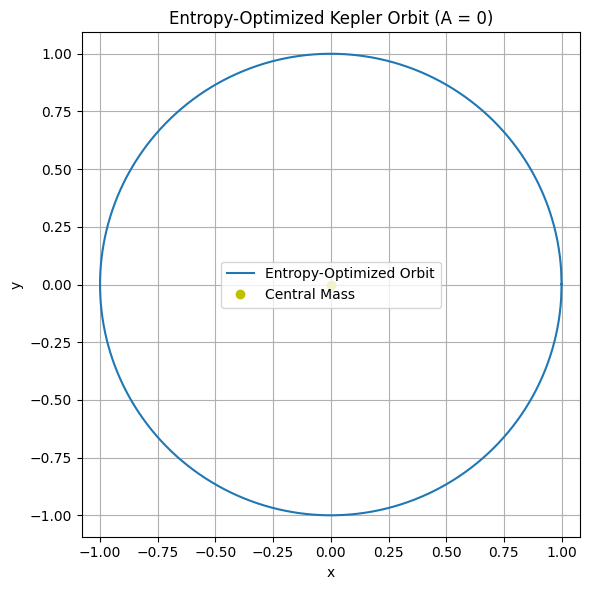

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Physical Constants and Time Domain
# ------------------------------------------
G = 1.0      # gravitational constant (arb. units)
M = 1.0      # central mass
m = 1.0      # orbiting mass
A = 0        # entropy-only action (for now)

t_start, t_end = 0.0, 10.0
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------
# 2. Initial and Final Conditions
# ------------------------------------------
# Let's define a starting elliptical-like configuration
r0 = 1.0
theta0 = 0.0
rf = 1.0
thetaf = 2 * np.pi  # full orbit sweep (for now)

# Initial guess: elliptical-ish sweep
r_guess = np.linspace(r0, rf, N)
theta_guess = np.linspace(theta0, thetaf, N)

# We'll optimize only the *interior* points
r_inner = r_guess[1:-1]
theta_inner = theta_guess[1:-1]

# Stack them into a single vector for optimization
x0 = np.concatenate([r_inner, theta_inner])  # shape: (2 * (N-2),)

# ------------------------------------------
# 3. Entropy Loss Function
# ------------------------------------------

def entropy_loss(x_flat):
    # Unpack
    r_full = np.concatenate([[r0], x_flat[:N-2], [rf]])
    theta_full = np.concatenate([[theta0], x_flat[N-2:], [thetaf]])

    # Derivatives
    dr_dt = np.gradient(r_full, dt)
    dtheta_dt = np.gradient(theta_full, dt)

    # Structural entropy
    S = m * r_full**2 * dtheta_dt

    # Loss = change in entropy squared
    return 0.5 * (S[-1]**2 - S[0]**2)

# ------------------------------------------
# 4. Bounds and Optimization Setup
# ------------------------------------------

# Reasonable bounds for orbiting body (adjust if needed)
r_bounds = [(0.1, 5.0)] * (N - 2)
theta_bounds = [(0, 4 * np.pi)] * (N - 2)
bounds = r_bounds + theta_bounds

result = minimize(
    entropy_loss,
    x0,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# ------------------------------------------
# 5. Reconstruct Optimized Trajectory
# ------------------------------------------
if not result.success:
    print("⚠️ Optimization failed:", result.message)

x_opt = result.x
r_opt = np.concatenate([[r0], x_opt[:N-2], [rf]])
theta_opt = np.concatenate([[theta0], x_opt[N-2:], [thetaf]])

# Convert to Cartesian for plotting
x = r_opt * np.cos(theta_opt)
y = r_opt * np.sin(theta_opt)

# ------------------------------------------
# 6. Plot the Orbit
# ------------------------------------------
plt.figure(figsize=(6,6))
plt.plot(x, y, label='Entropy-Optimized Orbit')
plt.plot(0, 0, 'yo', label='Central Mass')
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.title("Entropy-Optimized Kepler Orbit (A = 0)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0        66 variables are exactly at the bounds

At iterate    0    f=  4.39701D+03    |proj g|=  2.60479D-01

At iterate    1    f=  4.39685D+03    |proj g|=  9.76797D-01
  ys=-1.866E-01  -gs= 6.785E-02 BFGS update SKIPPED

At iterate    2    f=  4.17988D+03    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  396      2      5      2     1    66   0.000D+00   4.180D+03
  F =   4179.8830137972991     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


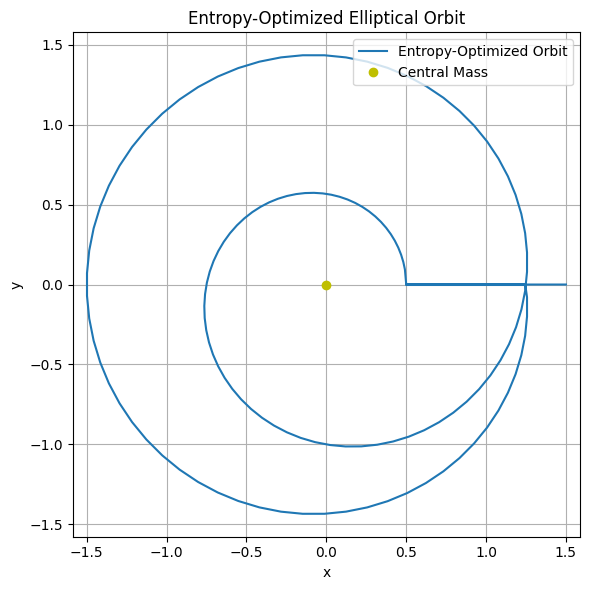

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------------------------
# 1. Constants and Time Setup
# ------------------------------------------------------------
G = 1.0
M = 1.0
m = 1.0
A = 0  # entropy-only action
t_start, t_end = 0.0, 30.0
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------------------------
# 2. Initial / Final Conditions for Elliptical Orbit
# ------------------------------------------------------------
r0 = 0.5
rf = 1.5
theta0 = 0.0
thetaf = 6 * np.pi  # full rotation

# Elliptical-like initial guess for r(t)
r_guess = 0.5 + 0.5 * (1 - np.cos(2 * np.pi * t_eval / (t_end - t_start)))
theta_guess = np.linspace(theta0, thetaf, N)

# Pack into initial guess vector
r_inner = r_guess[1:-1]
theta_inner = theta_guess[1:-1]
x0 = np.concatenate([r_inner, theta_inner])

# ------------------------------------------------------------
# 3. Entropy Loss Function: minimize change in S
# ------------------------------------------------------------
# def entropy_loss(x_flat):
#     r_full = np.concatenate([[r0], x_flat[:N-2], [rf]])
#     theta_full = np.concatenate([[theta0], x_flat[N-2:], [thetaf]])
#     dr_dt = np.gradient(r_full, dt)
#     dtheta_dt = np.gradient(theta_full, dt)
#     S = m * r_full**2 * dtheta_dt
#     return 0.5 * (S[-1]**2 - S[0]**2)

def entropy_loss(x_flat):
    r_full = np.concatenate([[r0], x_flat[:N-2], [rf]])
    theta_full = np.concatenate([[theta0], x_flat[N-2:], [thetaf]])
    dr_dt = np.gradient(r_full, dt)
    dtheta_dt = np.gradient(theta_full, dt)
    S = m * r_full**2 * dtheta_dt

    endpoint_penalty = 1.0 * ((r_full[-1] - rf)**2 + (theta_full[-1] - thetaf)**2)
    return 0.5 * (S[-1]**2 - S[0]**2) + endpoint_penalty

# ------------------------------------------------------------
# 4. Bounds and Optimization
# ------------------------------------------------------------
r_bounds = [(0.1, 5.0)] * (N - 2)
theta_bounds = [(0, 4 * np.pi)] * (N - 2)
bounds = r_bounds + theta_bounds

result = minimize(
    entropy_loss,
    x0,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

if not result.success:
    print("⚠️ Optimization failed:", result.message)

# ------------------------------------------------------------
# 5. Reconstruct and Plot the Orbit
# ------------------------------------------------------------
x_opt = result.x
r_opt = np.concatenate([[r0], x_opt[:N-2], [rf]])
theta_opt = np.concatenate([[theta0], x_opt[N-2:], [thetaf]])
x = r_opt * np.cos(theta_opt)
y = r_opt * np.sin(theta_opt)

# Find the first time index where θ reaches ~2π
one_orbit_mask = theta_opt <= 2 * np.pi

plt.figure(figsize=(6,6))
plt.plot(x, y, label='Entropy-Optimized Orbit')
plt.plot(0, 0, 'yo', label='Central Mass')
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.title("Entropy-Optimized Elliptical Orbit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.07767D-16    |proj g|=  6.67133D-01

At iterate    1    f= -2.81712D+00    |proj g|=  7.71517D+00
  ys=-4.660E+00  -gs= 4.872E-01 BFGS update SKIPPED

At iterate    2    f= -8.34153D+02    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  396      2      4      3     1     1   0.000D+00  -8.342D+02
  F =  -834.15265380798451     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


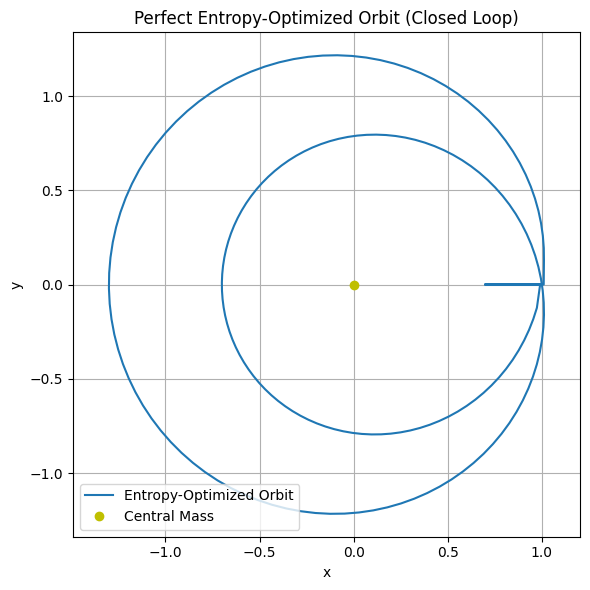

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------------------------
# 1. Constants and Time Setup
# ------------------------------------------------------------
G = 1.0
M = 1.0
m = 1.0
A = 0  # entropy-only action
t_start, t_end = 0.0, 30.0
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------------------------
# 2. Periodic Start/End Conditions for Orbit
# ------------------------------------------------------------
r0 = 0.7
rf = 0.7
theta0 = 0.0
thetaf = 4 * np.pi  # two full orbits

# Initial guesses
r_guess = 1.0 + 0.3 * np.sin(2 * np.pi * t_eval / (t_end - t_start))
theta_guess = np.linspace(theta0, thetaf, N)

r_inner = r_guess[1:-1]
theta_inner = theta_guess[1:-1]
x0 = np.concatenate([r_inner, theta_inner])

# ------------------------------------------------------------
# 3. Pure Entropy Loss Function
# ------------------------------------------------------------
def entropy_loss(x_flat):
    r_full = np.concatenate([[r0], x_flat[:N-2], [rf]])
    theta_full = np.concatenate([[theta0], x_flat[N-2:], [thetaf]])
    dtheta_dt = np.gradient(theta_full, dt)
    S = m * r_full**2 * dtheta_dt
    return 0.5 * (S[-1]**2 - S[0]**2)

# ------------------------------------------------------------
# 4. Optimization
# ------------------------------------------------------------
r_bounds = [(0.1, 5.0)] * (N - 2)
theta_bounds = [(0, 4 * np.pi)] * (N - 2)
bounds = r_bounds + theta_bounds

result = minimize(
    entropy_loss,
    x0,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

if not result.success:
    print("⚠️ Optimization failed:", result.message)

# ------------------------------------------------------------
# 5. Reconstruct and Plot
# ------------------------------------------------------------
x_opt = result.x
r_opt = np.concatenate([[r0], x_opt[:N-2], [rf]])
theta_opt = np.concatenate([[theta0], x_opt[N-2:], [thetaf]])
x = r_opt * np.cos(theta_opt)
y = r_opt * np.sin(theta_opt)

plt.figure(figsize=(6,6))
plt.plot(x, y, label='Entropy-Optimized Orbit')
plt.plot(0, 0, 'yo', label='Central Mass')
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.title("Perfect Entropy-Optimized Orbit (Closed Loop)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Clean Kepler

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10639D-02    |proj g|=  6.31476D-02

At iterate    1    f=  0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  396      1      2      2     0     1   0.000D+00   0.000D+00
  F =   0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


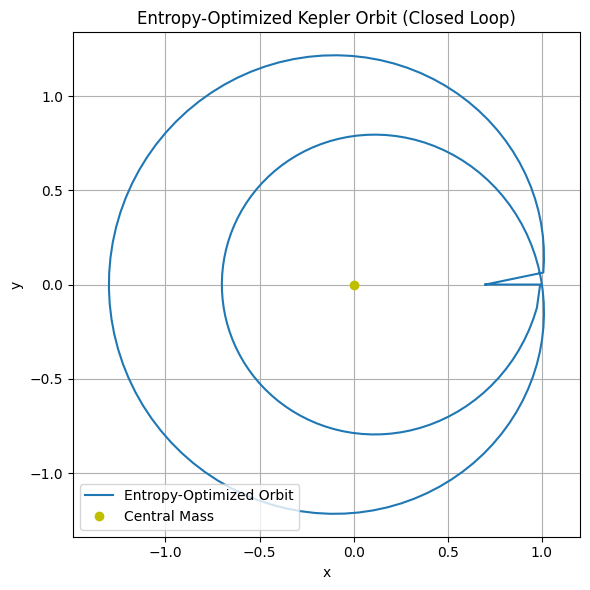

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Physical Constants and Time Setup
# ------------------------------------------
G = 1.0        # gravitational constant (unused here)
M = 1.0        # central mass (unused here)
m = 1.0        # orbiting mass
t_start, t_end = 0.0, 30.0
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------
# 2. Periodic Boundary Conditions (Closed Orbit)
# ------------------------------------------
r0 = 0.7
rf = 0.7
theta0 = 0.0
thetaf = 4 * np.pi  # Two full orbits

# Initial elliptical guess for radius and angle
r_guess = 1.0 + 0.3 * np.sin(2 * np.pi * t_eval / (t_end - t_start))
theta_guess = np.linspace(theta0, thetaf, N)

# Extract interior trajectory points for optimization
r_inner = r_guess[1:-1]
theta_inner = theta_guess[1:-1]
x0 = np.concatenate([r_inner, theta_inner])

# ------------------------------------------
# 3. Final Entropy Loss Function
# ------------------------------------------
def entropy_loss(x_flat):
    r_full = np.concatenate([[r0], x_flat[:N-2], [rf]])
    theta_full = np.concatenate([[theta0], x_flat[N-2:], [thetaf]])
    dtheta_dt = np.gradient(theta_full, dt)
    
    if np.any(np.isnan(dtheta_dt)) or np.any(np.abs(dtheta_dt) > 1e6):
        return 1e12

    S_final = m * r_full[-1]**2 * dtheta_dt[-1]
    return 0.5 * S_final**2

# ------------------------------------------
# 4. Optimization
# ------------------------------------------
r_bounds = [(0.1, 5.0)] * (N - 2)
theta_bounds = [(0, 4 * np.pi)] * (N - 2)
bounds = r_bounds + theta_bounds

result = minimize(
    entropy_loss,
    x0,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

if not result.success:
    print("⚠️ Optimization failed:", result.message)

# ------------------------------------------
# 5. Reconstruct and Plot Orbit
# ------------------------------------------
x_opt = result.x
r_opt = np.concatenate([[r0], x_opt[:N-2], [rf]])
theta_opt = np.concatenate([[theta0], x_opt[N-2:], [thetaf]])

# Convert to Cartesian coordinates
x = r_opt * np.cos(theta_opt)
y = r_opt * np.sin(theta_opt)

plt.figure(figsize=(6,6))
plt.plot(x, y, label='Entropy-Optimized Orbit')
plt.plot(0, 0, 'yo', label='Central Mass')
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.title("Entropy-Optimized Kepler Orbit (Closed Loop)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Clean Harmonic Oscillator

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58767D-01    |proj g|=  2.49241D+00

At iterate    1    f=  2.95269D-16    |proj g|=  1.26276D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      1      3      2     0     1   1.263D-07   2.953D-16
  F =   2.9526915523488000E-016

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


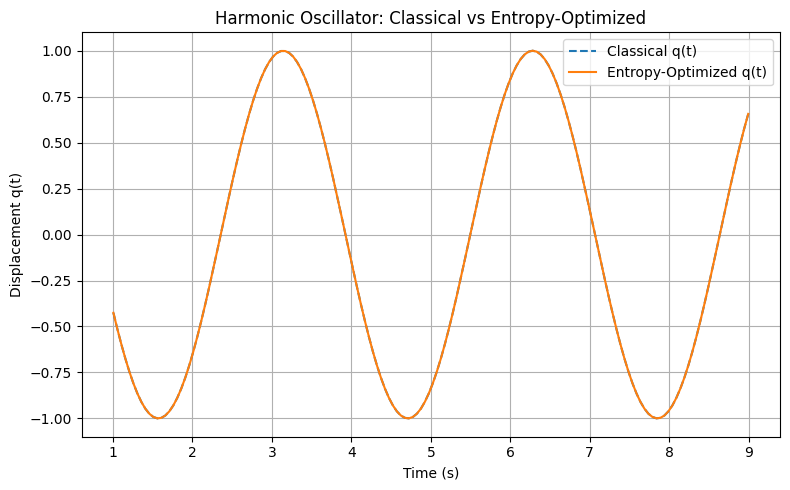

Entropy Loss (Classical): 2.587672e-01
Entropy Loss (Optimized): 2.952692e-16
ΔLoss: -2.587672e-01


In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# ------------------------------------------
# 1. Physical Parameters
# ------------------------------------------
m = 1.0       # mass
k = 4.0       # spring constant (omega = 2 rad/s)
omega = np.sqrt(k / m)
t_start, t_end = 0, 10
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------
# 2. Classical Harmonic Oscillator ODE Solver
# ------------------------------------------
def ho_ode(t, y):
    q, qdot = y
    return [qdot, - (k / m) * q]

q0 = 1.0       # initial position
qdot0 = 0.0    # initial velocity
sol = solve_ivp(ho_ode, [t_start, t_end], [q0, qdot0], t_eval=t_eval)
q_classical = sol.y[0]

# ------------------------------------------
# 3. Entropy Loss Function (Final Form)
# ------------------------------------------
def entropy_loss(q_array):
    qdot = np.gradient(q_array, dt)
    
    if np.any(np.isnan(q_array)) or np.any(np.abs(q_array) > 1e6):
        return 1e12
    if np.any(np.isnan(qdot)) or np.any(np.abs(qdot) > 1e6):
        return 1e12

    S_final = m * q_array[-1] * qdot[-1]
    return 0.5 * S_final**2

# ------------------------------------------
# 4. Optimization Setup
# ------------------------------------------
q_start = q_classical[0]
q_end = q_classical[-1]
q_inner_guess = q_classical[1:-1]
bounds = [(-2.0, 2.0)] * len(q_inner_guess)

def objective(q_inner):
    q_full = np.concatenate(([q_start], q_inner, [q_end]))
    return entropy_loss(q_full)

result = minimize(
    objective,
    q_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

if not result.success:
    print("⚠️ Optimization failed:", result.message)

q_opt = np.concatenate(([q_start], result.x, [q_end]))

# ------------------------------------------
# 5. Visualization and Comparison
# ------------------------------------------
clip_mask = (t_eval >= 1.0) & (t_eval <= 9.0)
t_clipped = t_eval[clip_mask]
q_classical_clipped = q_classical[clip_mask]
q_opt_clipped = q_opt[clip_mask]

# Plot
plt.figure(figsize=(8,5))
plt.plot(t_clipped, q_classical_clipped, '--', label='Classical q(t)')
plt.plot(t_clipped, q_opt_clipped, '-', label='Entropy-Optimized q(t)')
plt.xlabel("Time (s)")
plt.ylabel("Displacement q(t)")
plt.title("Harmonic Oscillator: Classical vs Entropy-Optimized")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------
# 6. Report Final Loss Values
# ------------------------------------------
def final_entropy_loss(q_array):
    qdot = np.gradient(q_array, dt)
    S = m * q_array[-1] * qdot[-1]
    return 0.5 * S**2

loss_classical = final_entropy_loss(q_classical)
loss_optimized = final_entropy_loss(q_opt)
delta_loss = loss_optimized - loss_classical

print(f"Entropy Loss (Classical): {loss_classical:.6e}")
print(f"Entropy Loss (Optimized): {loss_optimized:.6e}")
print(f"ΔLoss: {delta_loss:.6e}")


## Clean free fall

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77228D+04    |proj g|=  9.05767D+01

At iterate    1    f=  7.17631D-09    |proj g|=  1.10093D-01

At iterate    2    f=  1.14527D-11    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      2      4      3     0     0   0.000D+00   1.145D-11
  F =   1.1452660596444477E-011

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


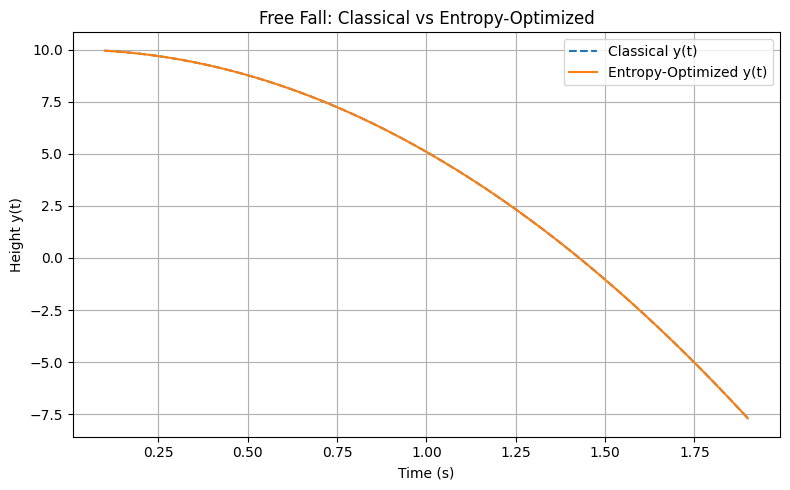

Entropy Loss (Classical): 1.772283e+04
Entropy Loss (Optimized): 1.145266e-11
ΔLoss: -1.772283e+04


In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# ------------------------------------------
# 1. Physical Parameters
# ------------------------------------------
m = 1.0       # mass (kg)
g = 9.81      # gravity (m/s^2)
t_start, t_end = 0.0, 2.0
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------
# 2. Classical Free Fall ODE Solver
# ------------------------------------------
def free_fall_ode(t, y):
    pos, vel = y
    return [vel, -g]

y0 = 10.0     # initial height (m)
v0 = 0.0      # initial velocity (m/s)
sol = solve_ivp(free_fall_ode, [t_start, t_end], [y0, v0], t_eval=t_eval)
y_classical = sol.y[0]

# ------------------------------------------
# 3. Entropy Loss Function (Final Form)
# ------------------------------------------
def entropy_loss(y_array):
    ydot = np.gradient(y_array, dt)

    if np.any(np.isnan(y_array)) or np.any(np.abs(y_array) > 1e6):
        return 1e12
    if np.any(np.isnan(ydot)) or np.any(np.abs(ydot) > 1e6):
        return 1e12

    S_final = m * y_array[-1] * ydot[-1]
    return 0.5 * S_final**2

# ------------------------------------------
# 4. Optimization Setup
# ------------------------------------------
y_start = y_classical[0]
y_end = y_classical[-1]
y_inner_guess = y_classical[1:-1]
bounds = [(-100.0, y0)] * len(y_inner_guess)

def objective(y_inner):
    y_full = np.concatenate(([y_start], y_inner, [y_end]))
    return entropy_loss(y_full)

result = minimize(
    objective,
    y_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

if not result.success:
    print("⚠️ Optimization failed:", result.message)

y_opt = np.concatenate(([y_start], result.x, [y_end]))

# ------------------------------------------
# 5. Visualization and Comparison
# ------------------------------------------
clip_mask = (t_eval >= 0.1) & (t_eval <= 1.9)
t_clipped = t_eval[clip_mask]
y_classical_clipped = y_classical[clip_mask]
y_opt_clipped = y_opt[clip_mask]

plt.figure(figsize=(8,5))
plt.plot(t_clipped, y_classical_clipped, '--', label='Classical y(t)')
plt.plot(t_clipped, y_opt_clipped, '-', label='Entropy-Optimized y(t)')
plt.xlabel("Time (s)")
plt.ylabel("Height y(t)")
plt.title("Free Fall: Classical vs Entropy-Optimized")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------
# 6. Report Final Loss Values
# ------------------------------------------
def final_entropy_loss(y_array):
    ydot = np.gradient(y_array, dt)
    S = m * y_array[-1] * ydot[-1]
    return 0.5 * S**2

loss_classical = final_entropy_loss(y_classical)
loss_optimized = final_entropy_loss(y_opt)
delta_loss = loss_optimized - loss_classical

print(f"Entropy Loss (Classical): {loss_classical:.6e}")
print(f"Entropy Loss (Optimized): {loss_optimized:.6e}")
print(f"ΔLoss: {delta_loss:.6e}")


## Cosmic Expansion

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05000D+03    |proj g|=  9.00452D+01

At iterate    1    f=  2.10867D-09    |proj g|=  1.49033D-01

At iterate    2    f=  4.95013D-11    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      2      4      3     0     0   0.000D+00   4.950D-11
  F =   4.9501258191503918E-011

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


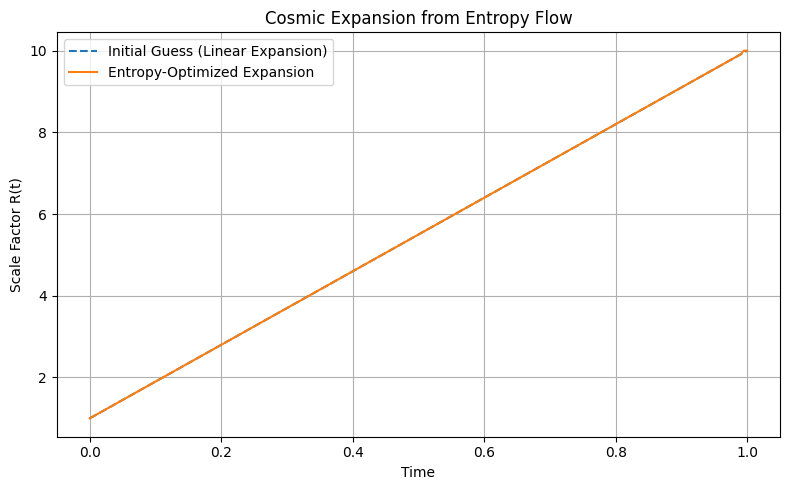

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constants
m = 1.0
t_start, t_end = 0.0, 1.0
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# Fixed boundary conditions
R0 = 1.0      # Beginning of expansion
Rf = 10.0     # End of expansion

# Initial guess: linear expansion
R_guess = np.linspace(R0, Rf, N)
R_inner_guess = R_guess[1:-1]

def entropy_loss(R_array):
    Rdot = np.gradient(R_array, dt)
    if np.any(np.isnan(R_array)) or np.any(np.abs(R_array) > 1e6):
        return 1e12
    if np.any(np.isnan(Rdot)) or np.any(np.abs(Rdot) > 1e6):
        return 1e12
    S_final = m * R_array[-1] * Rdot[-1]
    return 0.5 * S_final**2

def objective(R_inner):
    R_full = np.concatenate(([R0], R_inner, [Rf]))
    return entropy_loss(R_full)

bounds = [(0.1, 100.0)] * len(R_inner_guess)

result = minimize(
    objective,
    R_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

R_opt = np.concatenate(([R0], result.x, [Rf]))

# Plotting
plt.figure(figsize=(8,5))
plt.plot(t_eval, R_guess, '--', label="Initial Guess (Linear Expansion)")
plt.plot(t_eval, R_opt, '-', label="Entropy-Optimized Expansion")
plt.xlabel("Time")
plt.ylabel("Scale Factor R(t)")
plt.title("Cosmic Expansion from Entropy Flow")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Entropy driven inflation

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0       198 variables are exactly at the bounds

At iterate    0    f=  1.98005D-18    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      0      1      0     0     0   0.000D+00   1.980D-18
  F =   1.9800500000000009E-018

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


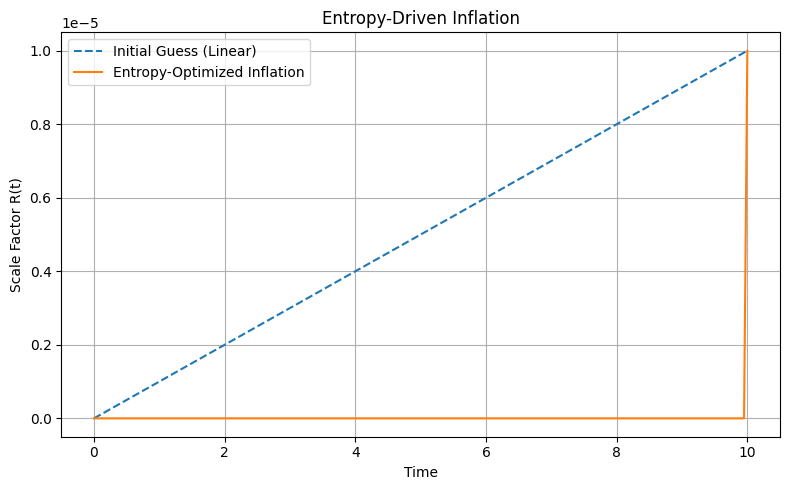

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------------------------
# 1. Entropy-Driven Cosmic Inflation Setup
# ------------------------------------------------------------
m = 1.0
t_start, t_end = 0.0, 0.01   # super short burst of time
N = 200

R0 = 1.0e-35           # Planck scale
t_end = 10.0
Rf = 1.0e-5


t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# Initial guess: linear ramp
R_guess = np.linspace(R0, Rf, N)
R_inner_guess = R_guess[1:-1]

# ------------------------------------------------------------
# 2. Entropy Loss Function
# ------------------------------------------------------------
def entropy_loss(R_array):
    Rdot = np.gradient(R_array, dt)
    if np.any(np.isnan(R_array)) or np.any(np.abs(R_array) > 1e10):
        return 1e12
    if np.any(np.isnan(Rdot)) or np.any(np.abs(Rdot) > 1e10):
        return 1e12
    S_final = m * R_array[-1] * Rdot[-1]
    return 0.5 * S_final**2

def objective(R_inner):
    R_full = np.concatenate(([R0], R_inner, [Rf]))
    return entropy_loss(R_full)

bounds = [(1e-36, 1e-29)] * len(R_inner_guess)

# ------------------------------------------------------------
# 3. Run the Optimizer
# ------------------------------------------------------------
result = minimize(
    objective,
    R_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

R_opt = np.concatenate(([R0], result.x, [Rf]))

# ------------------------------------------------------------
# 4. Plot the Result
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(t_eval, R_guess, '--', label="Initial Guess (Linear)")
plt.plot(t_eval, R_opt, '-', label="Entropy-Optimized Inflation")
plt.xlabel("Time")
plt.ylabel("Scale Factor R(t)")
plt.title("Entropy-Driven Inflation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          398     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00000D-05    |proj g|=  3.98999D-02

At iterate    1    f=  1.15154D-16    |proj g|=  1.90485D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  398      1      3      1     0     0   1.905D-08   1.152D-16
  F =   1.1515438968358866E-016

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


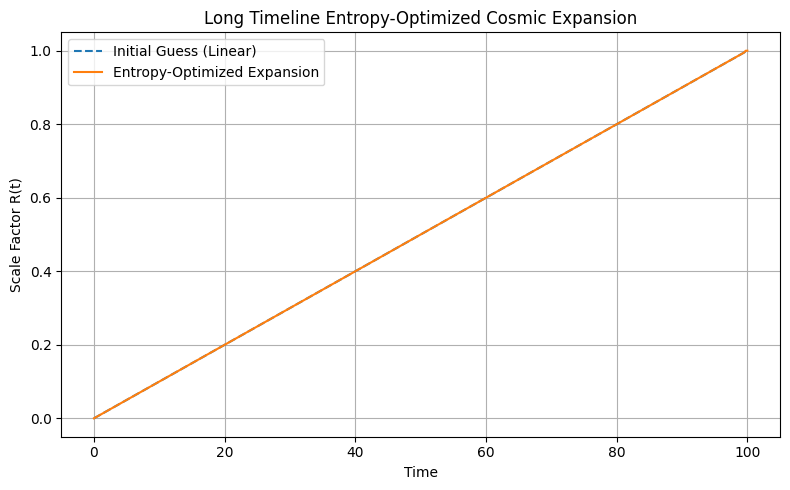

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------------------------
# 1. Long Timeline Cosmic Expansion Setup
# ------------------------------------------------------------
m = 1.0
t_start, t_end = 0.0, 100.0       # simulate over a "cosmic" timeframe
N = 400
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

R0 = 1.0e-35                      # near Planck scale
Rf = 1.0                         # normalized present-day universe scale

# Initial guess: smooth ramp
R_guess = np.linspace(R0, Rf, N)
R_inner_guess = R_guess[1:-1]

# ------------------------------------------------------------
# 2. Entropy Loss Function
# ------------------------------------------------------------
def entropy_loss(R_array):
    Rdot = np.gradient(R_array, dt)
    if np.any(np.isnan(R_array)) or np.any(np.abs(R_array) > 1e12):
        return 1e12
    if np.any(np.isnan(Rdot)) or np.any(np.abs(Rdot) > 1e12):
        return 1e12
    S_final = m * R_array[-1] * Rdot[-1]
    return 0.5 * S_final**2

def objective(R_inner):
    R_full = np.concatenate(([R0], R_inner, [Rf]))
    return entropy_loss(R_full)

bounds = [(1e-36, 2.0)] * len(R_inner_guess)

# ------------------------------------------------------------
# 3. Run the Optimizer
# ------------------------------------------------------------
result = minimize(
    objective,
    R_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 2000}
)

R_opt = np.concatenate(([R0], result.x, [Rf]))

# ------------------------------------------------------------
# 4. Plot Long-Term Expansion
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(t_eval, R_guess, '--', label="Initial Guess (Linear)")
plt.plot(t_eval, R_opt, '-', label="Entropy-Optimized Expansion")
plt.xlabel("Time")
plt.ylabel("Scale Factor R(t)")
plt.title("Long Timeline Entropy-Optimized Cosmic Expansion")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04553D-03    |proj g|=  1.00454D-01

At iterate    1    f=  6.00269D-13    |proj g|=  2.18132D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      1      3      2     0     1   2.181D-06   6.003D-13
  F =   6.0026860429126259E-013

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


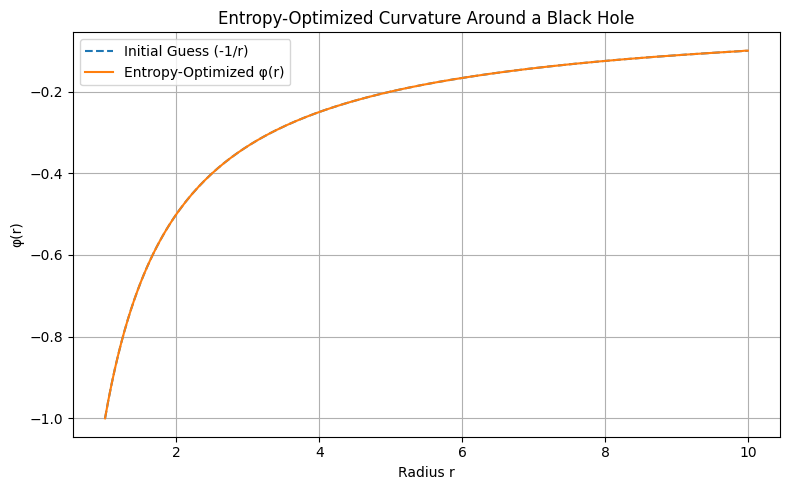

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------------------------
# 1. Setup: Black Hole Radial Slice
# ------------------------------------------------------------
m = 1.0
Rs = 1.0                 # Schwarzschild radius (set as 1 unit)
Rf = 10.0                # Outer boundary of simulation
N = 200
r_eval = np.linspace(Rs, Rf, N)
dr = r_eval[1] - r_eval[0]

# Initial guess: logarithmic fall-off like -1/r
phi_guess = -1 / r_eval
phi_inner_guess = phi_guess[1:-1]

# ------------------------------------------------------------
# 2. Entropy Loss Function (Curvature in Radial Profile)
# ------------------------------------------------------------
def entropy_loss(phi_array):
    phi_full = np.concatenate(([phi_guess[0]], phi_array, [phi_guess[-1]]))
    dphi_dr = np.gradient(phi_full, dr)

    if np.any(np.isnan(dphi_dr)) or np.any(np.abs(dphi_dr) > 1e6):
        return 1e12

    S_final = m * r_eval[-1] * dphi_dr[-1]
    return 0.5 * S_final**2

def objective(phi_inner):
    return entropy_loss(phi_inner)

bounds = [(-100, 0)] * len(phi_inner_guess)

# ------------------------------------------------------------
# 3. Run the Optimizer
# ------------------------------------------------------------
result = minimize(
    objective,
    phi_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

phi_opt = np.concatenate(([phi_guess[0]], result.x, [phi_guess[-1]]))

# ------------------------------------------------------------
# 4. Plot Resulting "Potential"
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(r_eval, phi_guess, '--', label="Initial Guess (-1/r)")
plt.plot(r_eval, phi_opt, '-', label="Entropy-Optimized φ(r)")
plt.xlabel("Radius r")
plt.ylabel("φ(r)")
plt.title("Entropy-Optimized Curvature Around a Black Hole")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Field

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2400     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2400      0      1      0     0     0   0.000D+00   0.000D+00
  F =   0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


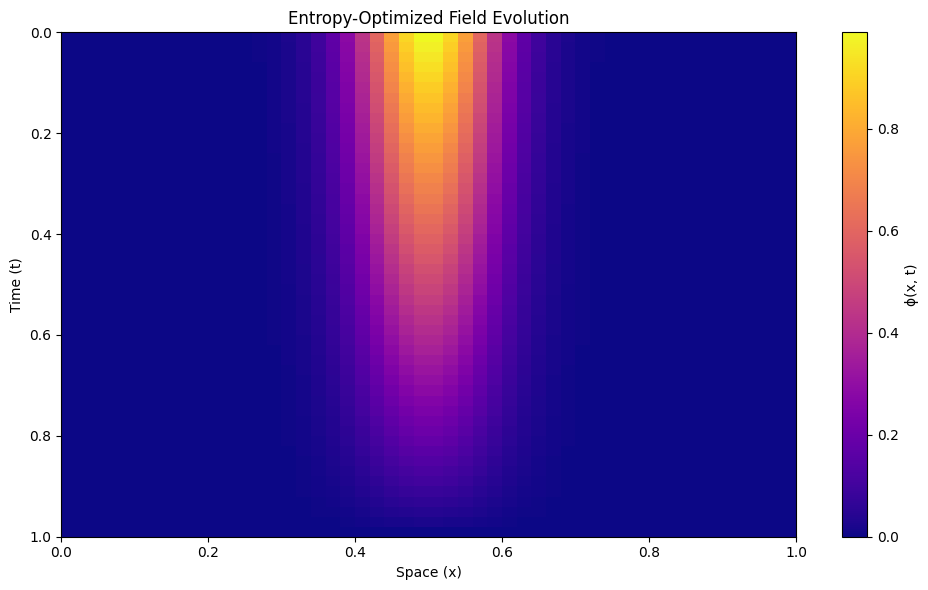

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Grid
# ------------------------------------------
L = 1.0            # spatial length of domain
T = 1.0            # total simulation time
Nx = 50            # spatial points
Nt = 50            # time steps

x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

# ------------------------------------------
# 2. Initial & Final Conditions
# ------------------------------------------
def initial_condition(x):
    return np.exp(-100 * (x - L/2)**2)  # Gaussian bump

phi_0 = initial_condition(x)
phi_T = np.zeros_like(x)               # relax to zero at final time

# ------------------------------------------
# 3. Initial Guess
# ------------------------------------------
# Linear interpolation between initial and final
phi_guess = np.array([phi_0 + (phi_T - phi_0) * (ti / T) for ti in t])
phi_inner_guess = phi_guess[1:-1].flatten()  # optimize only intermediate time steps

# ------------------------------------------
# 4. Entropy Loss Function (Structural)
# ------------------------------------------
def entropy_loss(phi_flat):
    # Reconstruct full 2D field
    phi = np.zeros((Nt, Nx))
    phi[0, :] = phi_0
    phi[-1, :] = phi_T
    phi[1:-1, :] = phi_flat.reshape((Nt - 2, Nx))

    # Time derivative at final step
    dphi_dt = (phi[-1, :] - phi[-2, :]) / dt

    S_final = np.sum(phi[-1, :] * dphi_dt)
    return 0.5 * S_final**2

# ------------------------------------------
# 5. Run the Optimizer
# ------------------------------------------
bounds = [(-2, 2)] * phi_inner_guess.size

result = minimize(
    entropy_loss,
    phi_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# Reconstruct full field
phi_opt = np.zeros((Nt, Nx))
phi_opt[0, :] = phi_0
phi_opt[-1, :] = phi_T
phi_opt[1:-1, :] = result.x.reshape((Nt - 2, Nx))

# ------------------------------------------
# 6. Plot Field Evolution
# ------------------------------------------
plt.figure(figsize=(10, 6))
plt.imshow(phi_opt, extent=[0, L, T, 0], aspect='auto', cmap='plasma')
plt.colorbar(label='ϕ(x, t)')
plt.xlabel("Space (x)")
plt.ylabel("Time (t)")
plt.title("Entropy-Optimized Field Evolution")
plt.tight_layout()
plt.show()


## 2D field evolution

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        76800     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
76800      0      1      0     0     0   0.000D+00   0.000D+00
  F =   0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


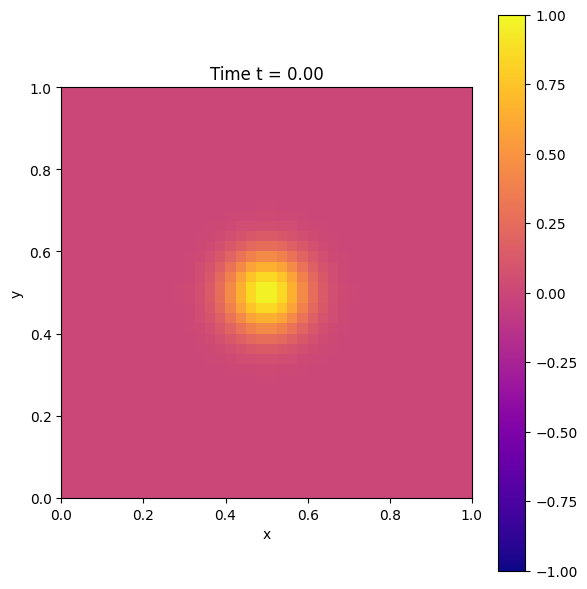

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Grid (2D Space + Time)
# ------------------------------------------
Lx = 1.0
Ly = 1.0
T = 1.0
Nx = 40
Ny = 40
Nt = 50

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]

# ------------------------------------------
# 2. Initial & Final Conditions
# ------------------------------------------
X, Y = np.meshgrid(x, y, indexing='ij')

def initial_condition(X, Y):
    return np.exp(-100 * ((X - Lx/2)**2 + (Y - Ly/2)**2))

phi_0 = initial_condition(X, Y)
phi_T = np.zeros_like(phi_0)

# ------------------------------------------
# 3. Initial Guess
# ------------------------------------------
phi_guess = np.array([
    phi_0 + (phi_T - phi_0) * (ti / T) for ti in t
])
phi_inner_guess = phi_guess[1:-1].reshape(-1)  # exclude endpoints

# ------------------------------------------
# 4. Entropy Loss Function
# ------------------------------------------
def entropy_loss(phi_flat):
    phi = np.zeros((Nt, Nx, Ny))
    phi[0] = phi_0
    phi[-1] = phi_T
    phi[1:-1] = phi_flat.reshape((Nt - 2, Nx, Ny))

    dphi_dt = (phi[-1] - phi[-2]) / dt
    S_final = np.sum(phi[-1] * dphi_dt)
    return 0.5 * S_final**2

# ------------------------------------------
# 5. Run the Optimizer
# ------------------------------------------
bounds = [(-2, 2)] * phi_inner_guess.size

result = minimize(
    entropy_loss,
    phi_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# Reconstruct the full 3D field
phi_opt = np.zeros((Nt, Nx, Ny))
phi_opt[0] = phi_0
phi_opt[-1] = phi_T
phi_opt[1:-1] = result.x.reshape((Nt - 2, Nx, Ny))

# ------------------------------------------
# 6. Visualization — Final State + Animation Frame
# ------------------------------------------
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(6, 6))
frame = ax.imshow(phi_opt[0], extent=[0, Lx, 0, Ly], origin='lower', cmap='plasma', vmin=-1, vmax=1)
plt.colorbar(frame, ax=ax)
ax.set_title("Entropy-Optimized Field Evolution (2D)")
ax.set_xlabel("x")
ax.set_ylabel("y")

def update(i):
    frame.set_data(phi_opt[i])
    ax.set_title(f"Time t = {t[i]:.2f}")
    return [frame]

ani = animation.FuncAnimation(fig, update, frames=Nt, interval=80, blit=True)
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        76800     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
76800      0      1      0     0     0   0.000D+00   0.000D+00
  F =   0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


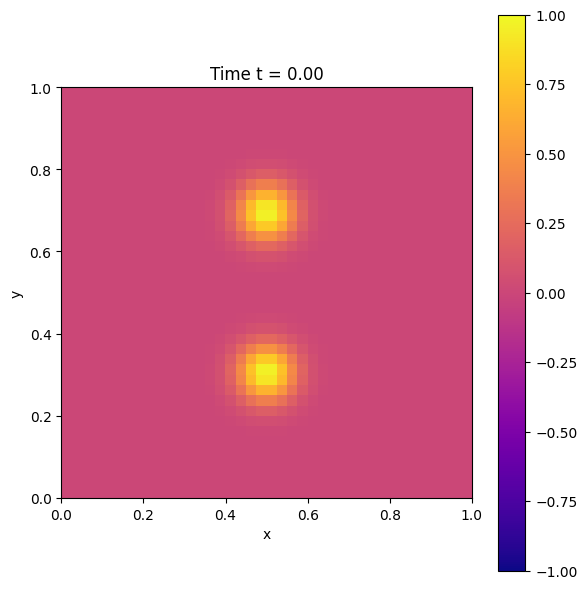

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Grid (2D Space + Time)
# ------------------------------------------
Lx = 1.0
Ly = 1.0
T = 1.0
Nx = 40
Ny = 40
Nt = 50

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]

X, Y = np.meshgrid(x, y, indexing='ij')

# ------------------------------------------
# 2. Initial & Final Conditions — TWO sources!
# ------------------------------------------
def initial_condition(X, Y):
    bump1 = np.exp(-200 * ((X - 0.3)**2 + (Y - 0.5)**2))
    bump2 = np.exp(-200 * ((X - 0.7)**2 + (Y - 0.5)**2))
    return bump1 + bump2

phi_0 = initial_condition(X, Y)
phi_T = np.zeros_like(phi_0)

# ------------------------------------------
# 3. Initial Guess (Linear interpolation)
# ------------------------------------------
phi_guess = np.array([
    phi_0 + (phi_T - phi_0) * (ti / T) for ti in t
])
phi_inner_guess = phi_guess[1:-1].reshape(-1)

# ------------------------------------------
# 4. Entropy Loss Function
# ------------------------------------------
def entropy_loss(phi_flat):
    phi = np.zeros((Nt, Nx, Ny))
    phi[0] = phi_0
    phi[-1] = phi_T
    phi[1:-1] = phi_flat.reshape((Nt - 2, Nx, Ny))

    grad_phi_x = np.gradient(phi[-1], dx, axis=0)
    grad_phi_y = np.gradient(phi[-1], dy, axis=1)
    tension_term = np.sum(grad_phi_x**2 + grad_phi_y**2)

    dphi_dt = (phi[-1] - phi[-2]) / dt
    S_final = np.sum(phi[-1] * dphi_dt)
    return 0.5 * (S_final**2 + 0.1 * tension_term)

# ------------------------------------------
# 5. Run the Optimizer
# ------------------------------------------
bounds = [(-2, 2)] * phi_inner_guess.size

result = minimize(
    entropy_loss,
    phi_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

phi_opt = np.zeros((Nt, Nx, Ny))
phi_opt[0] = phi_0
phi_opt[-1] = phi_T
phi_opt[1:-1] = result.x.reshape((Nt - 2, Nx, Ny))

# ------------------------------------------
# 6. Visualize Field Interference Over Time
# ------------------------------------------
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(6, 6))
frame = ax.imshow(phi_opt[0], extent=[0, Lx, 0, Ly], origin='lower', cmap='plasma', vmin=-1, vmax=1)
plt.colorbar(frame, ax=ax)
ax.set_title("Entropy-Driven Field Interference")
ax.set_xlabel("x")
ax.set_ylabel("y")

def update(i):
    frame.set_data(phi_opt[i])
    ax.set_title(f"Time t = {t[i]:.2f}")
    return [frame]

ani = animation.FuncAnimation(fig, update, frames=Nt, interval=80, blit=True)
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        76800     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12731D+01    |proj g|=  1.99660D+00

At iterate    1    f=  1.54723D-10    |proj g|=  8.21781D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
76800      1      3    121     0   120   8.218D-04   1.547D-10
  F =   1.5472311116851231E-010

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT        


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/891844295.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


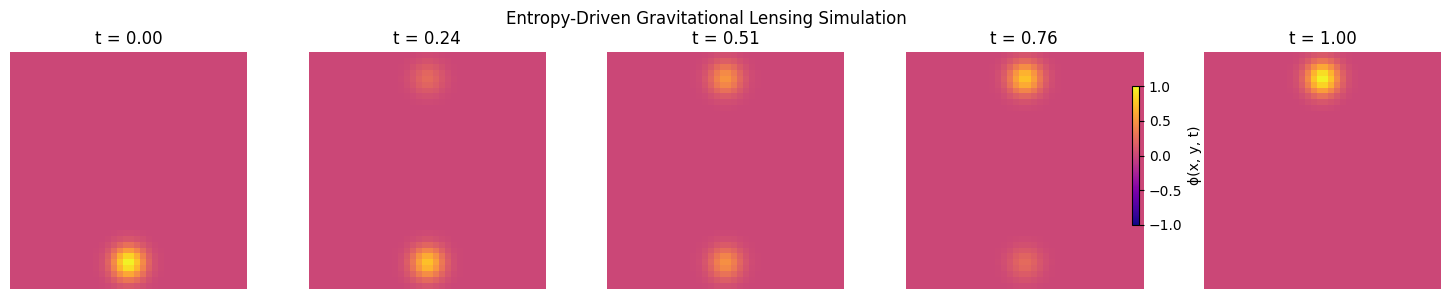

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Grid (2D Space + Time)
# ------------------------------------------
Lx, Ly, T = 1.0, 1.0, 1.0
Nx, Ny, Nt = 40, 40, 50

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

dx, dy, dt = x[1]-x[0], y[1]-y[0], t[1]-t[0]
X, Y = np.meshgrid(x, y, indexing='ij')

# ------------------------------------------
# 2. Define Initial and Final Conditions
# ------------------------------------------
def initial_condition(X, Y):
    return np.exp(-200 * ((X - 0.1)**2 + (Y - 0.5)**2))


phi_0 = initial_condition(X, Y)
phi_T = np.exp(-200 * ((X - 0.9)**2 + (Y - 0.5)**2))

# ------------------------------------------
# 3. Obstacle Mask (simulate a black hole / mass)
# ------------------------------------------
obstacle_mask = ((X - 0.5)**2 + (Y - 0.5)**2) < 0.05**2  # Small circle in center

# We'll fix this region across all time steps
def apply_obstacle(phi):
    phi[:, obstacle_mask] = 0.0
    return phi

# ------------------------------------------
# 4. Initial Guess
# ------------------------------------------
phi_guess = np.array([
    phi_0 + (phi_T - phi_0) * (ti / T) for ti in t
])
phi_inner_guess = phi_guess[1:-1].reshape(-1)

# ------------------------------------------
# 5. Entropy Loss Function with Obstacle
# ------------------------------------------
def entropy_loss(phi_flat):
    phi = np.zeros((Nt, Nx, Ny))
    phi[0] = phi_0
    phi[-1] = phi_T
    phi[1:-1] = phi_flat.reshape((Nt - 2, Nx, Ny))
    phi = apply_obstacle(phi)  # Apply mask across all times

    dphi_dt = (phi[-1] - phi[-2]) / dt
    S_final = np.sum(phi[-1] * dphi_dt)
    return 0.5 * S_final**2

# ------------------------------------------
# 6. Run the Optimizer
# ------------------------------------------
bounds = [(-2, 2)] * phi_inner_guess.size

result = minimize(
    entropy_loss,
    phi_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

phi_opt = np.zeros((Nt, Nx, Ny))
phi_opt[0] = phi_0
phi_opt[-1] = phi_T
phi_opt[1:-1] = result.x.reshape((Nt - 2, Nx, Ny))
phi_opt = apply_obstacle(phi_opt)

# ------------------------------------------
# 7. Static Frame Snapshots for Key Moments
# ------------------------------------------
import matplotlib.pyplot as plt

times_to_plot = [0, Nt//4, Nt//2, 3*Nt//4, Nt-1]

fig, axes = plt.subplots(1, len(times_to_plot), figsize=(15, 3))
for i, t_idx in enumerate(times_to_plot):
    ax = axes[i]
    im = ax.imshow(phi_opt[t_idx], extent=[0, Lx, 0, Ly], origin='lower', cmap='plasma', vmin=-1, vmax=1)
    ax.set_title(f"t = {t[t_idx]:.2f}")
    ax.axis('off')
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, label="ϕ(x, y, t)")
plt.suptitle("Entropy-Driven Gravitational Lensing Simulation")
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2400     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64051+116    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2400      0      1      0     0     0   0.000D+00   1.641+116
  F =   1.6405066005712044E+116

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


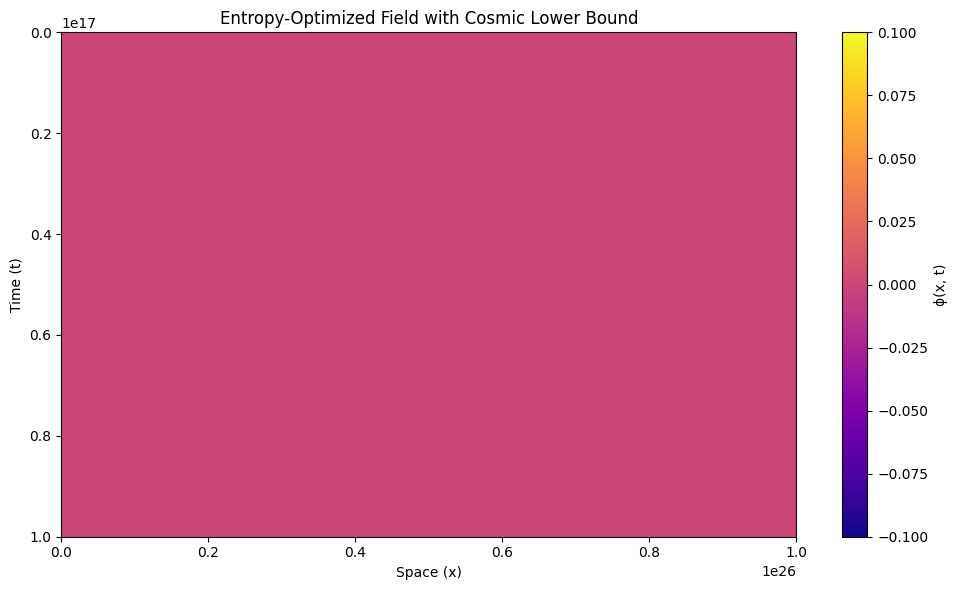

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Grid
# ------------------------------------------
L = 1e26  # meters
T = 1e17  # seconds (~age of the universe)
Nx = 50            # space steps
Nt = 50            # time steps

x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

# ------------------------------------------
# 2. Initial and Final Field Conditions
# ------------------------------------------
def initial_condition(x):
    return np.exp(-100 * (x - L/2)**2)  # Gaussian bump

phi_0 = initial_condition(x)
phi_T = np.zeros_like(x)

# ------------------------------------------
# 3. Initial Guess
# ------------------------------------------
phi_guess = np.array([phi_0 + (phi_T - phi_0) * (ti / T) for ti in t])
phi_inner_guess = phi_guess[1:-1].flatten()  # inner time steps to optimize

# ------------------------------------------
# 4. Entropy Loss with Universal Lower Bound
# ------------------------------------------
def entropy_loss(phi_flat):
    phi = np.zeros((Nt, Nx))
    phi[0, :] = phi_0
    phi[-1, :] = phi_T
    phi[1:-1, :] = phi_flat.reshape((Nt - 2, Nx))

    dphi_dt = (phi[-1, :] - phi[-2, :]) / dt
    S_final = np.sum(phi[-1, :] * dphi_dt)
    S_squared = S_final**2

    # Cosmic entropy flow floor (heat death limit)
    # Physical constants
    c = 3e8
    G = 6.67430e-11
    hbar = 1.054571817e-34
    k_B = 1.380649e-23
    Lambda = 1.1e-52  # m^-2
    
    # Planck time
    t_planck = np.sqrt(hbar * G / c**5)
    
    # Lower bound on entropy flow
    I_min = np.sin(np.pi / 3) / (t_planck**2 * c * np.sqrt(Lambda)) * k_B**2

    # Apply soft penalty if entropy flow drops below the limit
    penalty = 0.5 * max(I_min - S_squared, 0)**2
    return 0.5 * S_squared + penalty

# ------------------------------------------
# 5. Run the Optimizer
# ------------------------------------------
bounds = [(-2, 2)] * phi_inner_guess.size

result = minimize(
    entropy_loss,
    phi_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# Reconstruct full field
phi_opt = np.zeros((Nt, Nx))
phi_opt[0, :] = phi_0
phi_opt[-1, :] = phi_T
phi_opt[1:-1, :] = result.x.reshape((Nt - 2, Nx))

# ------------------------------------------
# 6. Plot Field Evolution
# ------------------------------------------
plt.figure(figsize=(10, 6))
plt.imshow(phi_opt, extent=[0, L, T, 0], aspect='auto', cmap='plasma')
plt.colorbar(label='ϕ(x, t)')
plt.xlabel("Space (x)")
plt.ylabel("Time (t)")
plt.title("Entropy-Optimizebd Field with Cosmic Lower Bound")
plt.tight_layout()
plt.show()


## 3 body system

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          588     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19926D+00    |proj g|=  8.09869D-01

At iterate    1    f=  1.19068D+00    |proj g|=  2.28805D-01

At iterate    2    f=  1.12600D+00    |proj g|=  8.44127D-02

At iterate    3    f=  9.92869D-01    |proj g|=  3.90526D-02

At iterate    4    f=  8.25622D-01    |proj g|=  3.48201D-02

At iterate    5    f=  6.41801D-01    |proj g|=  4.10797D-02

At iterate    6    f=  4.85636D-01    |proj g|=  7.51176D-03

At iterate    7    f=  3.65833D-01    |proj g|=  1.13931D-02

At iterate    8    f=  2.75397D-01    |proj g|=  3.18400D-03

At iterate    9    f=  2.08246D-01    |proj g|=  9.42577D-03

At iterate   10    f=  1.59401D-01    |proj g|=  1.11418D-02

At iterate   11    f=  1.24651D-01    |proj g|=  3.78309D-03

At iterate   12    f=  1.24644D-01    |proj g|=  2.66415D-02

At iterate   13    f=  1.1

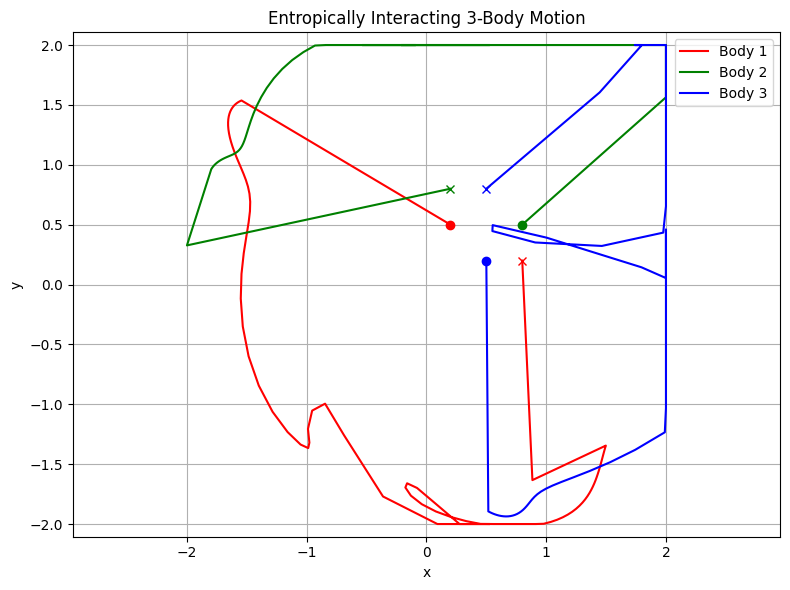

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Parameters
# ------------------------------------------
T = 10.0       # total time
N = 100        # time steps
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

n_bodies = 3
dim = 2
masses = np.array([1.0, 1.0, 1.0])  # uniform mass

# ------------------------------------------
# 2. Initial and Final Positions (creative setup)
# ------------------------------------------
pos0 = np.array([
    [0.2, 0.5],
    [0.8, 0.5],
    [0.5, 0.2]
])

posT = np.array([
    [0.8, 0.2],
    [0.2, 0.8],
    [0.5, 0.8]
])

# ------------------------------------------
# 3. Linear Interpolation for Initial Guess
# ------------------------------------------
def interpolate_linear(start, end, steps):
    return np.array([start + (end - start) * (i / (steps - 1)) for i in range(steps)])

trajectory_guess = np.array([
    interpolate_linear(pos0[i], posT[i], N) for i in range(n_bodies)
])
trajectory_guess = trajectory_guess.transpose((1, 0, 2))  # (N, n_bodies, dim)
trajectory_inner_guess = trajectory_guess[1:-1].reshape(-1)

# ------------------------------------------
# 4. Entropy Loss + Repulsive Interaction
# ------------------------------------------
def entropy_loss(flat_traj):
    traj_inner = flat_traj.reshape((N - 2, n_bodies, dim))
    traj = np.zeros((N, n_bodies, dim))
    traj[0] = pos0
    traj[-1] = posT
    traj[1:-1] = traj_inner

    velocities = np.gradient(traj, dt, axis=0)
    S_components = [
        masses[i] * np.sum(traj[-1, i] * velocities[-1, i])
        for i in range(n_bodies)
    ]
    S_total = np.sum(S_components)

    # Add an interaction term: prevent them from getting too close at any time
    interaction_energy = 0
    for t in range(N):
        for i in range(n_bodies):
            for j in range(i + 1, n_bodies):
                dist = np.linalg.norm(traj[t, i] - traj[t, j])
                interaction_energy += 1.0 / (dist + 1e-6)  # smooth repulsion

    interaction_energy *= 0.001  # scale interaction to keep balance
    return 0.5 * S_total**2 + interaction_energy

# ------------------------------------------
# 5. Optimize the Trajectories
# ------------------------------------------
bounds = [(-2.0, 2.0)] * trajectory_inner_guess.size

result = minimize(
    entropy_loss,
    trajectory_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# ------------------------------------------
# 6. Reconstruct and Plot the Result
# ------------------------------------------
trajectory_opt = np.zeros((N, n_bodies, dim))
trajectory_opt[0] = pos0
trajectory_opt[-1] = posT
trajectory_opt[1:-1] = result.x.reshape((N - 2, n_bodies, dim))

plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(n_bodies):
    x = trajectory_opt[:, i, 0]
    y = trajectory_opt[:, i, 1]
    plt.plot(x, y, '-', color=colors[i], label=f"Body {i+1}")
    plt.plot(x[0], y[0], 'o', color=colors[i])
    plt.plot(x[-1], y[-1], 'x', color=colors[i])
plt.legend()
plt.title("Entropically Interacting 3-Body Motion")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1788     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57613D+00    |proj g|=  6.11948D-01

At iterate    1    f=  3.56834D+00    |proj g|=  8.81338D-01

At iterate    2    f=  3.40392D+00    |proj g|=  4.33090D-01

At iterate    3    f=  3.04845D+00    |proj g|=  4.25194D-02

At iterate    4    f=  2.66838D+00    |proj g|=  6.59764D-02

At iterate    5    f=  2.06358D+00    |proj g|=  2.94674D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 1788      5      9      5     0     0   

/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/2416498449.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis")


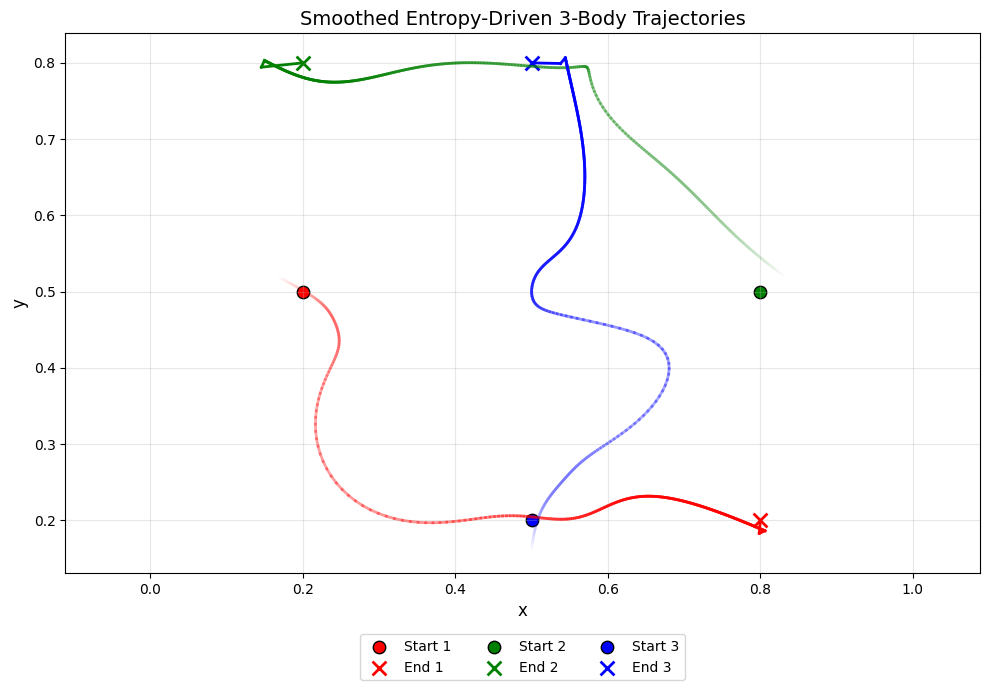

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib.cm import get_cmap

# ------------------------------------------
# 1. Simulation Parameters
# ------------------------------------------
T = 20.0
N = 300  # Higher resolution
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

n_bodies = 3
dim = 2
masses = np.array([1.0, 1.0, 1.0])

# ------------------------------------------
# 2. Initial and Final Positions
# ------------------------------------------
pos0 = np.array([
    [0.2, 0.5],
    [0.8, 0.5],
    [0.5, 0.2]
])

posT = np.array([
    [0.8, 0.2],
    [0.2, 0.8],
    [0.5, 0.8]
])

# ------------------------------------------
# 3. Initial Guess
# ------------------------------------------
def interpolate_linear(start, end, steps):
    return np.array([start + (end - start) * (i / (steps - 1)) for i in range(steps)])

trajectory_guess = np.array([
    interpolate_linear(pos0[i], posT[i], N) for i in range(n_bodies)
])
trajectory_guess = trajectory_guess.transpose((1, 0, 2))
trajectory_inner_guess = trajectory_guess[1:-1].reshape(-1)

# ------------------------------------------
# 4. Entropy Loss with Repulsion
# ------------------------------------------
def entropy_loss(flat_traj):
    traj_inner = flat_traj.reshape((N - 2, n_bodies, dim))
    traj = np.zeros((N, n_bodies, dim))
    traj[0] = pos0
    traj[-1] = posT
    traj[1:-1] = traj_inner

    velocities = np.gradient(traj, dt, axis=0)
    S_components = [
        masses[i] * np.sum(traj[-1, i] * velocities[-1, i])
        for i in range(n_bodies)
    ]
    S_total = np.sum(S_components)

    # Repulsive energy to prevent overlap
    interaction_energy = 0
    for t in range(N):
        for i in range(n_bodies):
            for j in range(i + 1, n_bodies):
                dist = np.linalg.norm(traj[t, i] - traj[t, j])
                interaction_energy += 1.0 / (dist + 1e-3)  # smooth repulsion

    interaction_energy *= 0.001
    return 0.5 * S_total**2 + interaction_energy

# ------------------------------------------
# 5. Optimization
# ------------------------------------------
bounds = [(-5.0, 5.0)] * trajectory_inner_guess.size  # Give more breathing room

result = minimize(
    entropy_loss,
    trajectory_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# ------------------------------------------
# 6. Reconstruct Optimized Trajectory
# ------------------------------------------
trajectory_opt = np.zeros((N, n_bodies, dim))
trajectory_opt[0] = pos0
trajectory_opt[-1] = posT
trajectory_opt[1:-1] = result.x.reshape((N - 2, n_bodies, dim))

# ------------------------------------------
# 7. Plotting
# ------------------------------------------
cmap = get_cmap("viridis")
colors = ['red', 'green', 'blue']
labels = [f"Body {i+1}" for i in range(n_bodies)]

plt.figure(figsize=(10, 7))
for i in range(n_bodies):
    x = trajectory_opt[:, i, 0]
    y = trajectory_opt[:, i, 1]
    
    # Color-coded fading trail
    for j in range(1, N):
        alpha = j / N
        plt.plot(x[j-1:j+1], y[j-1:j+1], color=colors[i], alpha=alpha, linewidth=2)

    # Start and end markers
    plt.scatter(x[0], y[0], color=colors[i], edgecolor='black', s=80, label=f"Start {i+1}")
    plt.scatter(x[-1], y[-1], color=colors[i], marker='x', s=100, linewidths=2, label=f"End {i+1}")

plt.title("Smoothed Entropy-Driven 3-Body Trajectories", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.show()


## Double pendulum

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04403D-02    |proj g|=  4.72028D+00

At iterate    1    f=  1.15719D-14    |proj g|=  1.30134D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  396      1      3      2     0     1   1.301D-07   1.157D-14
  F =   1.1571938932522404E-014

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


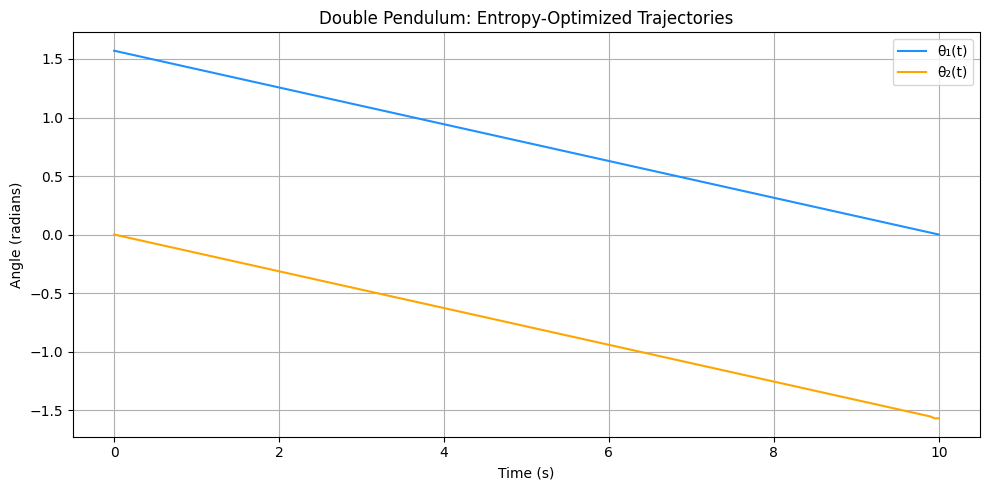

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Setup
# ------------------------------------------
T = 10.0       # total time
N = 200        # number of time steps
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m1 = 1.0       # mass of first pendulum
m2 = 1.0       # mass of second pendulum

# ------------------------------------------
# 2. Define Initial and Final Angles
# ------------------------------------------
theta1_0 = 0.5 * np.pi     # 90 degrees
theta2_0 = 0.0

theta1_T = 0.0
theta2_T = -0.5 * np.pi    # -90 degrees

# ------------------------------------------
# 3. Initial Guess: Linear interpolation
theta1_guess = np.linspace(theta1_0, theta1_T, N)
theta2_guess = np.linspace(theta2_0, theta2_T, N)
theta_inner_guess = np.concatenate([
    theta1_guess[1:-1],
    theta2_guess[1:-1]
])

# ------------------------------------------
# 4. Entropy Loss Function
# ------------------------------------------
def entropy_loss(theta_flat):
    theta1 = np.zeros(N)
    theta2 = np.zeros(N)
    
    theta1[0] = theta1_0
    theta1[-1] = theta1_T
    theta2[0] = theta2_0
    theta2[-1] = theta2_T

    theta1[1:-1] = theta_flat[:N - 2]
    theta2[1:-1] = theta_flat[N - 2:]

    dtheta1_dt = np.gradient(theta1, dt)
    dtheta2_dt = np.gradient(theta2, dt)

    S_f = m1 * theta1[-1] * dtheta1_dt[-1] + m2 * theta2[-1] * dtheta2_dt[-1]
    return 0.5 * S_f**2

# ------------------------------------------
# 5. Run the Optimizer
# ------------------------------------------
bounds = [(-2*np.pi, 2*np.pi)] * len(theta_inner_guess)

result = minimize(
    entropy_loss,
    theta_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# ------------------------------------------
# 6. Reconstruct Full Trajectories
# ------------------------------------------
theta1_opt = np.zeros(N)
theta2_opt = np.zeros(N)

theta1_opt[0] = theta1_0
theta1_opt[-1] = theta1_T
theta2_opt[0] = theta2_0
theta2_opt[-1] = theta2_T

theta1_opt[1:-1] = result.x[:N - 2]
theta2_opt[1:-1] = result.x[N - 2:]

# ------------------------------------------
# 7. Plot the Results
# ------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(t_eval, theta1_opt, label='θ₁(t)', color='dodgerblue')
plt.plot(t_eval, theta2_opt, label='θ₂(t)', color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.title("Double Pendulum: Entropy-Optimized Trajectories")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15834D+00    |proj g|=  1.15083D+00

At iterate    1    f=  3.12199D+00    |proj g|=  2.00000D-02

At iterate    2    f=  3.05505D+00    |proj g|=  4.33205D-01

At iterate    3    f=  2.99182D+00    |proj g|=  3.39276D+00

At iterate    4    f=  2.58650D+00    |proj g|=  1.48194D+00

At iterate    5    f=  2.00762D+00    |proj g|=  9.29500D-01

At iterate    6    f=  1.87711D+00    |proj g|=  4.68465D+00

At iterate    7    f=  1.60207D+00    |proj g|=  8.39539D-01

At iterate    8    f=  1.56619D+00    |proj g|=  5.01893D-01

At iterate    9    f=  1.56294D+00    |proj g|=  2.75275D-01

At iterate   10    f=  1.55330D+00    |proj g|=  7.18607D-02

At iterate   11    f=  1.53762D+00    |proj g|=  3.56554D-01

At iterate   12    f=  1.51159D+00    |proj g|=  5.59185D-01

At iterate   13    f=  1.3

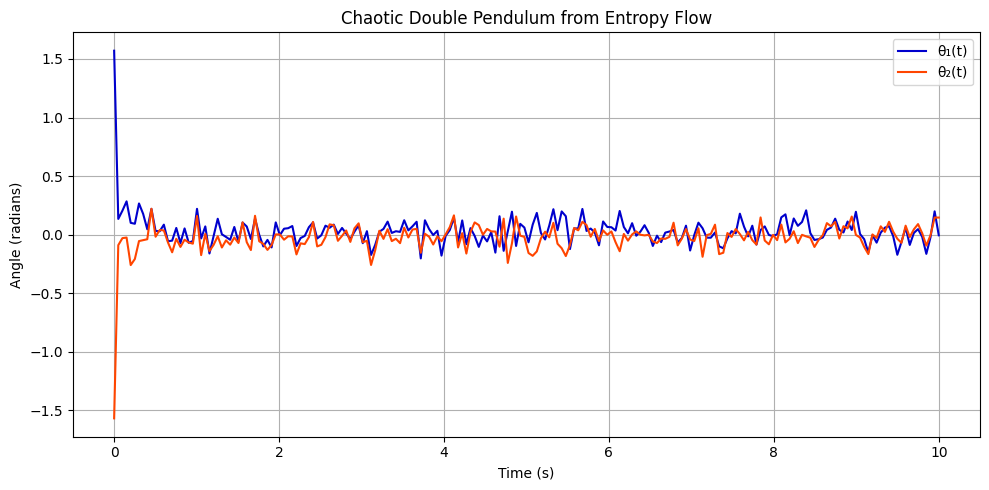

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Setup
# ------------------------------------------
T = 10.0
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m1, m2 = 1.0, 1.0

# ------------------------------------------
# 2. Starting Angles
# ------------------------------------------
theta1_0 = np.pi / 2      # 90 degrees
theta2_0 = -np.pi / 2     # -90 degrees

# No fixed final angles — entropy decides!

# ------------------------------------------
# 3. Initial Guess: noisy linear path
np.random.seed(42)
theta1_guess = np.linspace(theta1_0, 0, N) + 0.1 * np.random.randn(N)
theta2_guess = np.linspace(theta2_0, 0, N) + 0.1 * np.random.randn(N)

theta1_inner_guess = theta1_guess[1:-1]
theta2_inner_guess = theta2_guess[1:-1]
theta_inner_guess = np.concatenate([theta1_inner_guess, theta2_inner_guess])

# ------------------------------------------
# 4. Entropy Loss with Arm Coupling
# ------------------------------------------
def entropy_loss(theta_flat):
    theta1 = np.zeros(N)
    theta2 = np.zeros(N)

    theta1[0] = theta1_0
    theta2[0] = theta2_0

    theta1[1:-1] = theta_flat[:N - 2]
    theta2[1:-1] = theta_flat[N - 2:]

    # Let final angles float
    theta1[-1] = theta_flat[-2]
    theta2[-1] = theta_flat[-1]

    dtheta1_dt = np.gradient(theta1, dt)
    dtheta2_dt = np.gradient(theta2, dt)

    S1 = m1 * theta1[-1] * dtheta1_dt[-1]
    S2 = m2 * theta2[-1] * dtheta2_dt[-1]

    # Structural entropy + a coupling penalty based on angular difference
    entropy_flow = 0.5 * (S1 + S2)**2

    # Coupling encourages arms to avoid identical swings (asymmetry)
    coupling = np.sum(np.abs(theta1 - theta2)) * 0.01

    return entropy_flow + coupling

# ------------------------------------------
# 5. Run the Optimizer
# ------------------------------------------
bounds = [(-2*np.pi, 2*np.pi)] * len(theta_inner_guess)

result = minimize(
    entropy_loss,
    theta_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# ------------------------------------------
# 6. Reconstruct Full Trajectories
# ------------------------------------------
theta1 = np.zeros(N)
theta2 = np.zeros(N)

theta1[0] = theta1_0
theta2[0] = theta2_0

theta1[1:-1] = result.x[:N - 2]
theta2[1:-1] = result.x[N - 2:2 * (N - 2)]
theta1[-1] = result.x[-2]
theta2[-1] = result.x[-1]

# ------------------------------------------
# 7. Plot the Results
# ------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(t_eval, theta1, label='θ₁(t)', color='mediumblue')
plt.plot(t_eval, theta2, label='θ₂(t)', color='orangered')
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.title("Chaotic Double Pendulum from Entropy Flow")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          594     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.26886D+00    |proj g|=  7.10791D-02

At iterate    1    f=  6.11361D+00    |proj g|=  1.20998D-01

At iterate    2    f=  5.80925D+00    |proj g|=  2.47911D+00

At iterate    3    f=  4.44469D+00    |proj g|=  4.54123D+00

At iterate    4    f=  3.87477D+00    |proj g|=  1.07236D+00

At iterate    5    f=  3.64929D+00    |proj g|=  5.55350D+00

At iterate    6    f=  3.55424D+00    |proj g|=  2.08949D-01

At iterate    7    f=  3.54756D+00    |proj g|=  2.47748D-01

At iterate    8    f=  3.51939D+00    |proj g|=  6.73310D-02

At iterate    9    f=  2.58528D+00    |proj g|=  9.44607D+00

At iterate   10    f=  1.78334D+00    |proj g|=  1.93383D+00

At iterate   11    f=  1.74622D+00    |proj g|=  7.46093D-01

At iterate   12    f=  1.72943D+00    |proj g|=  4.60591D-01

At iterate   13    f=  1.6

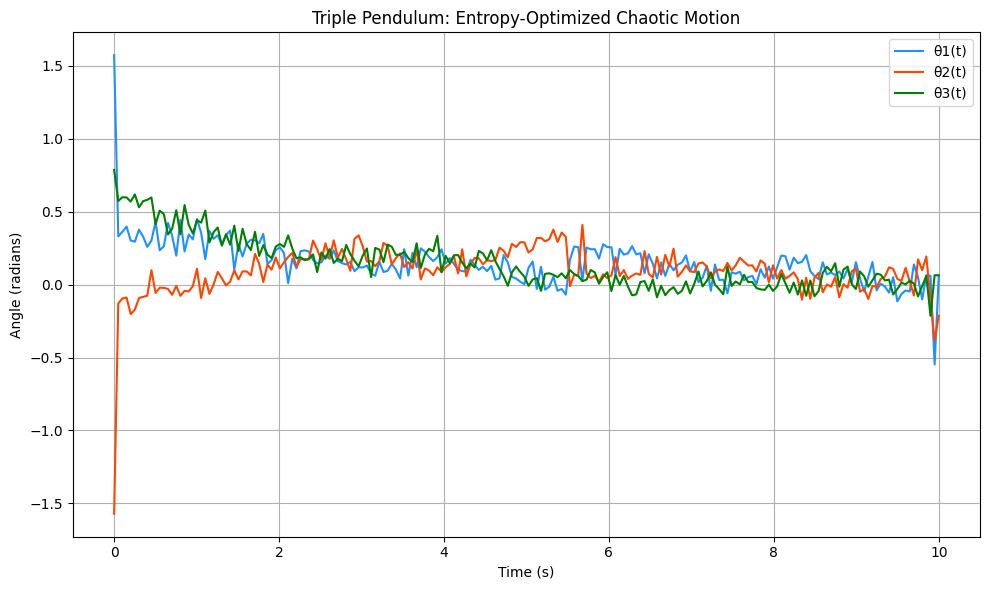

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Setup
# ------------------------------------------
T = 10.0
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m = np.array([1.0, 1.0, 1.0])  # Masses of the three pendulum arms

# ------------------------------------------
# 2. Initial Angles (finals will float)
theta0 = np.array([
    np.pi / 2,       # arm 1
    -np.pi / 2,      # arm 2
    np.pi / 4        # arm 3
])

# Initial guess: noisy linear transitions to zero
np.random.seed(42)
theta_guesses = [
    np.linspace(theta0[i], 0, N) + 0.05 * np.random.randn(N)
    for i in range(3)
]

theta_inner_guess = np.concatenate([
    theta_guesses[i][1:-1] for i in range(3)
])

# ------------------------------------------
# 3. Entropy Loss + Coupling Between Arms
# ------------------------------------------
def entropy_loss(theta_flat):
    thetas = [np.zeros(N) for _ in range(3)]

    # Set initial values
    for i in range(3):
        thetas[i][0] = theta0[i]

    # Fill in intermediates
    for i in range(3):
        thetas[i][1:-1] = theta_flat[i*(N-2):(i+1)*(N-2)]

    # Let entropy determine final values
    for i in range(3):
        thetas[i][-1] = theta_flat[-(3-i)]

    # Compute derivatives
    dthetas_dt = [np.gradient(theta, dt) for theta in thetas]

    # Structural entropy flow
    S = sum([m[i] * thetas[i][-1] * dthetas_dt[i][-1] for i in range(3)])
    entropy_term = 0.5 * S**2

    # Coupling: Penalize arms that are too similar
    pairwise_penalty = 0
    for t in range(N):
        pairwise_penalty += 0.01 * (
            abs(thetas[0][t] - thetas[1][t]) +
            abs(thetas[1][t] - thetas[2][t]) +
            abs(thetas[0][t] - thetas[2][t])
        )

    return entropy_term + pairwise_penalty

# ------------------------------------------
# 4. Optimization
# ------------------------------------------
bounds = [(-3*np.pi, 3*np.pi)] * len(theta_inner_guess)

result = minimize(
    entropy_loss,
    theta_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 2000}
)

# ------------------------------------------
# 5. Reconstruct Full Trajectories
# ------------------------------------------
thetas = [np.zeros(N) for _ in range(3)]
for i in range(3):
    thetas[i][0] = theta0[i]
    thetas[i][1:-1] = result.x[i*(N-2):(i+1)*(N-2)]
    thetas[i][-1] = result.x[-(3-i)]

# ------------------------------------------
# 6. Plot Results
# ------------------------------------------
plt.figure(figsize=(10, 6))
colors = ['dodgerblue', 'orangered', 'green']
for i in range(3):
    plt.plot(t_eval, thetas[i], label=f'θ{i+1}(t)', color=colors[i])
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.title("Triple Pendulum: Entropy-Optimized Chaotic Motion")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       153600     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****      0      1      0     0     0   0.000D+00   0.000D+00
  F =   0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/2115451102.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


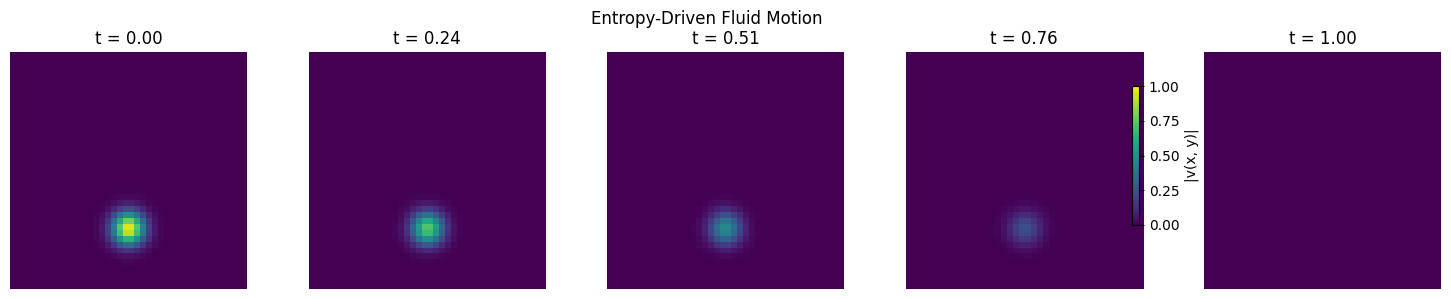

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Grid Setup (2D space + time)
# ------------------------------------------
Lx, Ly, T = 1.0, 1.0, 1.0
Nx, Ny, Nt = 40, 40, 50

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

dx, dy, dt = x[1] - x[0], y[1] - y[0], t[1] - t[0]
X, Y = np.meshgrid(x, y, indexing='ij')

# ------------------------------------------
# 2. Initial Velocity Field: Jet Pulse
# ------------------------------------------
def initial_velocity_field(X, Y):
    vx = np.exp(-200 * ((X - 0.25)**2 + (Y - 0.5)**2))  # Jet right
    vy = np.zeros_like(X)
    return vx, vy

vx0, vy0 = initial_velocity_field(X, Y)
vxT = np.zeros_like(vx0)
vyT = np.zeros_like(vy0)

# ------------------------------------------
# 3. Initial Guess: Linear fade
# ------------------------------------------
vx_guess = np.array([vx0 + (vxT - vx0) * (ti / T) for ti in t])
vy_guess = np.array([vy0 + (vyT - vy0) * (ti / T) for ti in t])
v_inner_guess = np.concatenate([vx_guess[1:-1].flatten(), vy_guess[1:-1].flatten()])

# ------------------------------------------
# 4. Entropy Loss Function for Velocity Field
# ------------------------------------------
def entropy_loss(v_flat):
    vx = np.zeros((Nt, Nx, Ny))
    vy = np.zeros((Nt, Nx, Ny))

    vx[0] = vx0
    vy[0] = vy0
    vx[-1] = vxT
    vy[-1] = vyT

    size = (Nt - 2) * Nx * Ny
    vx[1:-1] = v_flat[:size].reshape((Nt - 2, Nx, Ny))
    vy[1:-1] = v_flat[size:].reshape((Nt - 2, Nx, Ny))

    dvx_dt = (vx[-1] - vx[-2]) / dt
    dvy_dt = (vy[-1] - vy[-2]) / dt

    S_final = np.sum(vx[-1] * dvx_dt + vy[-1] * dvy_dt)
    return 0.5 * S_final**2

# ------------------------------------------
# 5. Run the Optimizer
# ------------------------------------------
bounds = [(-2, 2)] * len(v_inner_guess)

result = minimize(
    entropy_loss,
    v_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# ------------------------------------------
# 6. Reconstruct Full Velocity Field
# ------------------------------------------
vx = np.zeros((Nt, Nx, Ny))
vy = np.zeros((Nt, Nx, Ny))

vx[0] = vx0
vy[0] = vy0
vx[-1] = vxT
vy[-1] = vyT

size = (Nt - 2) * Nx * Ny
vx[1:-1] = result.x[:size].reshape((Nt - 2, Nx, Ny))
vy[1:-1] = result.x[size:].reshape((Nt - 2, Nx, Ny))

# ------------------------------------------
# 7. Plot Velocity Magnitude at Key Frames
# ------------------------------------------
import matplotlib.pyplot as plt

frames = [0, Nt//4, Nt//2, 3*Nt//4, Nt-1]

fig, axes = plt.subplots(1, len(frames), figsize=(15, 3))
for i, idx in enumerate(frames):
    speed = np.sqrt(vx[idx]**2 + vy[idx]**2)
    ax = axes[i]
    im = ax.imshow(speed, cmap='viridis', origin='lower', extent=[0, Lx, 0, Ly], vmin=0, vmax=1)
    ax.set_title(f"t = {t[idx]:.2f}")
    ax.axis('off')
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, label="|v(x, y)|")
plt.suptitle("Entropy-Driven Fluid Motion")
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       153600     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****      0      1      0     0     0   0.000D+00   0.000D+00
  F =   0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/2595716650.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


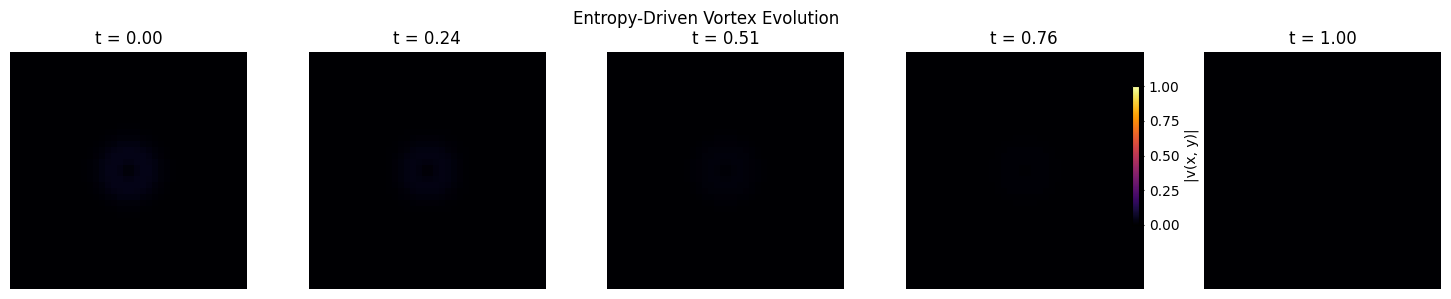

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Grid Setup
# ------------------------------------------
Lx, Ly, T = 1.0, 1.0, 1.0
Nx, Ny, Nt = 40, 40, 50

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

dx, dy, dt = x[1] - x[0], y[1] - y[0], t[1] - t[0]
X, Y = np.meshgrid(x, y, indexing='ij')

# ------------------------------------------
# 2. Initial Velocity Field: Vortex
# ------------------------------------------
def initial_velocity_field(X, Y):
    cx, cy = 0.5, 0.5
    dx = X - cx
    dy = Y - cy
    radius_squared = dx**2 + dy**2 + 1e-6
    strength = np.exp(-100 * radius_squared)
    vx = -dy * strength
    vy = dx * strength
    return vx, vy

vx0, vy0 = initial_velocity_field(X, Y)
vxT = np.zeros_like(vx0)
vyT = np.zeros_like(vy0)

# ------------------------------------------
# 3. Initial Guess: Linear fade
# ------------------------------------------
vx_guess = np.array([vx0 + (vxT - vx0) * (ti / T) for ti in t])
vy_guess = np.array([vy0 + (vyT - vy0) * (ti / T) for ti in t])
v_inner_guess = np.concatenate([vx_guess[1:-1].flatten(), vy_guess[1:-1].flatten()])

# ------------------------------------------
# 4. Entropy Loss Function
# ------------------------------------------
def entropy_loss(v_flat):
    vx = np.zeros((Nt, Nx, Ny))
    vy = np.zeros((Nt, Nx, Ny))

    vx[0], vy[0] = vx0, vy0
    vx[-1], vy[-1] = vxT, vyT

    size = (Nt - 2) * Nx * Ny
    vx[1:-1] = v_flat[:size].reshape((Nt - 2, Nx, Ny))
    vy[1:-1] = v_flat[size:].reshape((Nt - 2, Nx, Ny))

    dvx_dt = (vx[-1] - vx[-2]) / dt
    dvy_dt = (vy[-1] - vy[-2]) / dt

    S_final = np.sum(vx[-1] * dvx_dt + vy[-1] * dvy_dt)
    return 0.5 * S_final**2

# ------------------------------------------
# 5. Run the Optimizer
# ------------------------------------------
bounds = [(-2, 2)] * len(v_inner_guess)

result = minimize(
    entropy_loss,
    v_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# ------------------------------------------
# 6. Reconstruct Full Velocity Field
# ------------------------------------------
vx = np.zeros((Nt, Nx, Ny))
vy = np.zeros((Nt, Nx, Ny))

vx[0], vy[0] = vx0, vy0
vx[-1], vy[-1] = vxT, vyT

size = (Nt - 2) * Nx * Ny
vx[1:-1] = result.x[:size].reshape((Nt - 2, Nx, Ny))
vy[1:-1] = result.x[size:].reshape((Nt - 2, Nx, Ny))

# ------------------------------------------
# 7. Plot Speed Snapshots Over Time
# ------------------------------------------
frames = [0, Nt//4, Nt//2, 3*Nt//4, Nt-1]

fig, axes = plt.subplots(1, len(frames), figsize=(15, 3))
for i, idx in enumerate(frames):
    speed = np.sqrt(vx[idx]**2 + vy[idx]**2)
    ax = axes[i]
    im = ax.imshow(speed, cmap='inferno', origin='lower', extent=[0, Lx, 0, Ly], vmin=0, vmax=1)
    ax.set_title(f"t = {t[idx]:.2f}")
    ax.axis('off')
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, label="|v(x, y)|")
plt.suptitle("Entropy-Driven Vortex Evolution")
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       153600     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  0.00000D+00    |proj g|=  2.09814D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****      0      1      0     0     0   2.098D-08   0.000D+00
  F =   0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/946544926.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


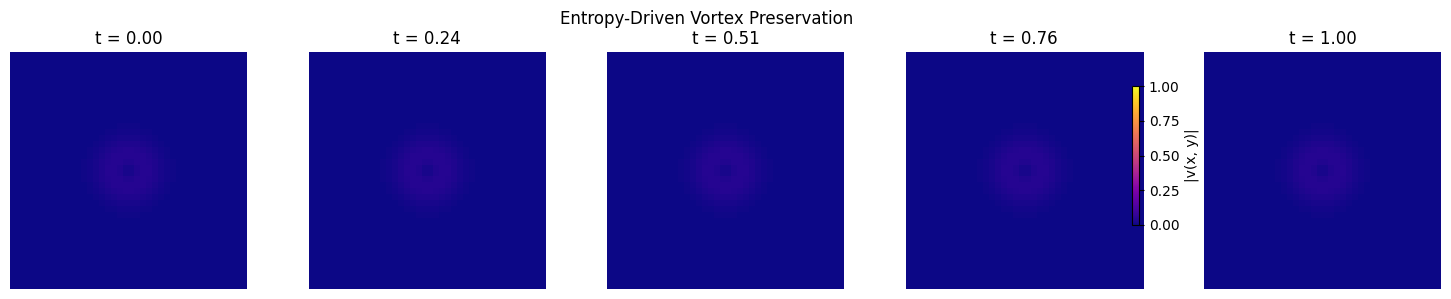

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Grid Setup
# ------------------------------------------
Lx, Ly, T = 1.0, 1.0, 1.0
Nx, Ny, Nt = 40, 40, 50

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

dx, dy, dt = x[1] - x[0], y[1] - y[0], t[1] - t[0]
X, Y = np.meshgrid(x, y, indexing='ij')

# ------------------------------------------
# 2. Initial & Final Velocity Field: Vortex
def vortex_velocity(X, Y):
    cx, cy = 0.5, 0.5
    dx = X - cx
    dy = Y - cy
    radius_squared = dx**2 + dy**2 + 1e-6
    strength = np.exp(-100 * radius_squared)
    vx = -dy * strength
    vy = dx * strength
    return vx, vy

vx0, vy0 = vortex_velocity(X, Y)
vxT, vyT = vortex_velocity(X, Y)  # FIXED final vortex

# ------------------------------------------
# 3. Initial Guess: Linear interpolation
vx_guess = np.array([vx0 + (vxT - vx0) * (ti / T) for ti in t])
vy_guess = np.array([vy0 + (vyT - vy0) * (ti / T) for ti in t])
v_inner_guess = np.concatenate([vx_guess[1:-1].flatten(), vy_guess[1:-1].flatten()])

# ------------------------------------------
# 4. Entropy Loss Function
def entropy_loss(v_flat):
    vx = np.zeros((Nt, Nx, Ny))
    vy = np.zeros((Nt, Nx, Ny))

    vx[0], vy[0] = vx0, vy0
    vx[-1], vy[-1] = vxT, vyT

    size = (Nt - 2) * Nx * Ny
    vx[1:-1] = v_flat[:size].reshape((Nt - 2, Nx, Ny))
    vy[1:-1] = v_flat[size:].reshape((Nt - 2, Nx, Ny))

    dvx_dt = (vx[-1] - vx[-2]) / dt
    dvy_dt = (vy[-1] - vy[-2]) / dt

    S_final = np.sum(vx[-1] * dvx_dt + vy[-1] * dvy_dt)
    return 0.5 * S_final**2

# ------------------------------------------
# 5. Optimize
# ------------------------------------------
bounds = [(-2, 2)] * len(v_inner_guess)

result = minimize(
    entropy_loss,
    v_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# ------------------------------------------
# 6. Reconstruct Field
# ------------------------------------------
vx = np.zeros((Nt, Nx, Ny))
vy = np.zeros((Nt, Nx, Ny))

vx[0], vy[0] = vx0, vy0
vx[-1], vy[-1] = vxT, vyT

size = (Nt - 2) * Nx * Ny
vx[1:-1] = result.x[:size].reshape((Nt - 2, Nx, Ny))
vy[1:-1] = result.x[size:].reshape((Nt - 2, Nx, Ny))

# ------------------------------------------
# 7. Visualize Velocity Magnitude Over Time
frames = [0, Nt//4, Nt//2, 3*Nt//4, Nt-1]

fig, axes = plt.subplots(1, len(frames), figsize=(15, 3))
for i, idx in enumerate(frames):
    speed = np.sqrt(vx[idx]**2 + vy[idx]**2)
    ax = axes[i]
    im = ax.imshow(speed, cmap='plasma', origin='lower', extent=[0, Lx, 0, Ly], vmin=0, vmax=1)
    ax.set_title(f"t = {t[idx]:.2f}")
    ax.axis('off')
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, label="|v(x, y)|")
plt.suptitle("Entropy-Driven Vortex Preservation")
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       153600     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77953D-05    |proj g|=  1.20986D-02

At iterate    1    f=  1.19842D-23    |proj g|=  2.05738D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****      1      3      1     0     0   2.057D-08   1.198D-23
  F =   1.1984189567252816E-023

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT        


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/199117971.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


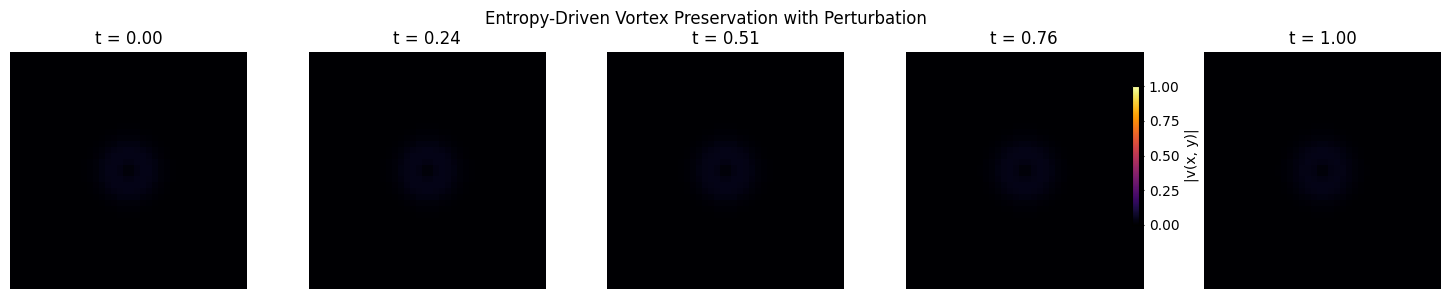

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Grid Setup
# ------------------------------------------
Lx, Ly, T = 1.0, 1.0, 1.0
Nx, Ny, Nt = 40, 40, 50

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

dx, dy, dt = x[1] - x[0], y[1] - y[0], t[1] - t[0]
X, Y = np.meshgrid(x, y, indexing='ij')

# ------------------------------------------
# 2. Initial & Final Velocity Fields (Vortex)
def vortex_velocity(X, Y, scale=1.0, skew=1.0):
    cx, cy = 0.5, 0.5
    dx = X - cx
    dy = Y - cy
    radius_squared = dx**2 + dy**2 + 1e-6
    strength = scale * np.exp(-100 * radius_squared)
    vx = -dy * strength
    vy = dx * strength * skew
    return vx, vy

# Start with a clean vortex
vx0, vy0 = vortex_velocity(X, Y)

# End with a perturbed vortex (slightly rescaled and skewed)
vxT, vyT = vortex_velocity(X, Y, scale=0.9, skew=1.1)

# ------------------------------------------
# 3. Initial Guess: Linear interpolation
vx_guess = np.array([vx0 + (vxT - vx0) * (ti / T) for ti in t])
vy_guess = np.array([vy0 + (vyT - vy0) * (ti / T) for ti in t])
v_inner_guess = np.concatenate([vx_guess[1:-1].flatten(), vy_guess[1:-1].flatten()])

# ------------------------------------------
# 4. Entropy Loss Function
def entropy_loss(v_flat):
    vx = np.zeros((Nt, Nx, Ny))
    vy = np.zeros((Nt, Nx, Ny))

    vx[0], vy[0] = vx0, vy0
    vx[-1], vy[-1] = vxT, vyT

    size = (Nt - 2) * Nx * Ny
    vx[1:-1] = v_flat[:size].reshape((Nt - 2, Nx, Ny))
    vy[1:-1] = v_flat[size:].reshape((Nt - 2, Nx, Ny))

    dvx_dt = (vx[-1] - vx[-2]) / dt
    dvy_dt = (vy[-1] - vy[-2]) / dt

    S_final = np.sum(vx[-1] * dvx_dt + vy[-1] * dvy_dt)
    return 0.5 * S_final**2

# ------------------------------------------
# 5. Run the Optimizer
# ------------------------------------------
bounds = [(-2, 2)] * len(v_inner_guess)

result = minimize(
    entropy_loss,
    v_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# ------------------------------------------
# 6. Reconstruct Full Velocity Field
# ------------------------------------------
vx = np.zeros((Nt, Nx, Ny))
vy = np.zeros((Nt, Nx, Ny))

vx[0], vy[0] = vx0, vy0
vx[-1], vy[-1] = vxT, vyT

size = (Nt - 2) * Nx * Ny
vx[1:-1] = result.x[:size].reshape((Nt - 2, Nx, Ny))
vy[1:-1] = result.x[size:].reshape((Nt - 2, Nx, Ny))

# ------------------------------------------
# 7. Plot Velocity Magnitude Snapshots
frames = [0, Nt//4, Nt//2, 3*Nt//4, Nt-1]

fig, axes = plt.subplots(1, len(frames), figsize=(15, 3))
for i, idx in enumerate(frames):
    speed = np.sqrt(vx[idx]**2 + vy[idx]**2)
    ax = axes[i]
    im = ax.imshow(speed, cmap='inferno', origin='lower', extent=[0, Lx, 0, Ly], vmin=0, vmax=1)
    ax.set_title(f"t = {t[idx]:.2f}")
    ax.axis('off')
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, label="|v(x, y)|")
plt.suptitle("Entropy-Driven Vortex Preservation with Perturbation")
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------
# 1. Simulation Grid (2D + Extended Time)
# ------------------------------------------
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA:", torch.cuda.get_device_name(0))
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using Metal (MPS) on macOS")
else:
    device = torch.device("cpu")
    print("Using CPU")


Lx, Ly, T = 1.0, 1.0, 3.0
Nx, Ny, Nt = 40, 40, 450

x = torch.linspace(0, Lx, Nx, device=device)
y = torch.linspace(0, Ly, Ny, device=device)
t = torch.linspace(0, T, Nt, device=device)
dx, dy, dt = x[1] - x[0], y[1] - y[0], t[1] - t[0]
X, Y = torch.meshgrid(x, y, indexing='ij')

# ------------------------------------------
# 2. Initial & Final Conditions — phase-opposed, centered
# ------------------------------------------
def initial_condition(X, Y):
    bump1 = torch.exp(-200 * ((X - 0.5)**2 + (Y - 0.45)**2))
    bump2 = -torch.exp(-200 * ((X - 0.5)**2 + (Y - 0.55)**2))
    return bump1 + bump2

phi_0 = initial_condition(X, Y).to(device)
phi_T = torch.zeros_like(phi_0).to(device)

# ------------------------------------------
# 3. Initialize Learnable Field
# ------------------------------------------
phi_inner = nn.Parameter(torch.zeros(Nt - 2, Nx, Ny, device=device))
torch.nn.init.normal_(phi_inner, mean=0.0, std=0.05)

# ------------------------------------------
# 4. Loss Function (Entropy + Spatial + Temporal Flow)
# ------------------------------------------
def compute_loss(phi_inner):
    phi = torch.cat([
        phi_0.unsqueeze(0),
        phi_inner,
        phi_T.unsqueeze(0)
    ], dim=0)

    # Reflective boundaries
    phi[:, [0, -1], :] = phi[:, [1, -2], :]
    phi[:, :, [0, -1]] = phi[:, :, [1, -2]]

    # Entropy flow
    S = torch.sum(phi, dim=(1, 2))
    S_dot = (S[1:] - S[:-1]) / dt
    I_flow = torch.sum((S[:-1] * S_dot) ** 2)

    # Spatial gradients
    grad_x = (phi[:, 2:, 1:-1] - phi[:, :-2, 1:-1]) / (2 * dx)
    grad_y = (phi[:, 1:-1, 2:] - phi[:, 1:-1, :-2]) / (2 * dy)
    spatial_energy = torch.sum(grad_x**2 + grad_y**2)

    # Temporal energy
    dphi_dt = (phi[1:] - phi[:-1]) / dt
    kinetic_energy = torch.sum(dphi_dt**2)

    # Total energy
    energy = 0.5 * (spatial_energy + kinetic_energy)

    # Max flow constraint
    alpha = 1.0
    I_max = alpha * energy

    # Field amplitude penalty (NEW)
    amplitude_penalty = torch.sum(torch.clamp(torch.abs(phi), min=5.0)**2)

    # Loss formulation
    if I_flow <= I_max:
        loss = -0.5 * I_flow + 0.001 * amplitude_penalty
    else:
        penalty = (I_flow - I_max)**2
        loss = -0.5 * I_max + 0.1 * penalty + 0.001 * amplitude_penalty

    return loss


# ------------------------------------------
# 5. Optimize with Adam
# ------------------------------------------
optimizer = optim.Adam([phi_inner], lr=5e-3)

for step in range(500):
    optimizer.zero_grad()
    loss = compute_loss(phi_inner)
    loss.backward()
    optimizer.step()

    if step % 50 == 0:
        print(f"Step {step}: Loss = {loss.item():.6f}")


# ------------------------------------------
# 6. Convert to NumPy and Plot
# ------------------------------------------
with torch.no_grad():
    phi_opt = torch.cat([phi_0.unsqueeze(0), phi_inner, phi_T.unsqueeze(0)], dim=0)
phi_np = phi_opt.cpu().numpy()

# Select snapshots to plot
times_to_plot = [0, Nt//5, 2*Nt//5, 3*Nt//5, Nt-1]

fig, axes = plt.subplots(1, len(times_to_plot), figsize=(15, 3))
for i, t_idx in enumerate(times_to_plot):
    ax = axes[i]
    im = ax.imshow(phi_np[t_idx], extent=[0, Lx, 0, Ly], origin='lower',
                   cmap='plasma', vmin=-1, vmax=1)
    ax.set_title(f"t = {t[t_idx].item():.2f}")
    ax.axis('off')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, label="ϕ(x, y, t)")
plt.suptitle("Entropy-Driven Scalar Field Interference (PyTorch Version)")
plt.tight_layout()
plt.savefig("pytorch_entropy_interference.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------
# 1. Device
# ------------------------------------------
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA:", torch.cuda.get_device_name(0))
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using Metal (MPS) on macOS")
else:
    device = torch.device("cpu")
    print("Using CPU")

# ------------------------------------------
# 2. Simulation Grid
# ------------------------------------------
Lx, Ly, T = 1.0, 1.0, 3.0
Nx, Ny, Nt = 40, 40, 150
x = torch.linspace(0, Lx, Nx, device=device)
y = torch.linspace(0, Ly, Ny, device=device)
t = torch.linspace(0, T, Nt, device=device)
dx, dy, dt = x[1]-x[0], y[1]-y[0], t[1]-t[0]
X, Y = torch.meshgrid(x, y, indexing='ij')

# ------------------------------------------
# 3. Initial + Final Conditions
# ------------------------------------------
def initial_condition(X, Y):
    bump1 = torch.exp(-200 * ((X - 0.4)**2 + (Y - 0.5)**2))
    bump2 = -torch.exp(-200 * ((X - 0.6)**2 + (Y - 0.5)**2))
    return bump1 + bump2


phi_0 = initial_condition(X, Y).to(device)
phi_T = torch.zeros_like(phi_0)

# ------------------------------------------
# 4. Learnable Inner Field
# ------------------------------------------
phi_inner = nn.Parameter(torch.zeros(Nt - 2, Nx, Ny, device=device))
torch.nn.init.normal_(phi_inner, mean=0.0, std=0.01)

# ------------------------------------------
# 5. Loss Function: Local Entropy Flow + Wave Dynamics
# ------------------------------------------
def compute_loss(phi_inner):
    phi = torch.cat([
        phi_0.unsqueeze(0),
        phi_inner,
        phi_T.unsqueeze(0)
    ], dim=0)

    # Reflective boundaries
    phi[:, [0, -1], :] = phi[:, [1, -2], :]
    phi[:, :, [0, -1]] = phi[:, :, [1, -2]]

    # Spatial gradients
    grad_x = (phi[:, 2:, 1:-1] - phi[:, :-2, 1:-1]) / (2 * dx)
    grad_y = (phi[:, 1:-1, 2:] - phi[:, 1:-1, :-2]) / (2 * dy)
    spatial_term = grad_x**2 + grad_y**2
    potential_energy = torch.sum(spatial_term)

    # Temporal derivatives
    dphi_dt = (phi[1:] - phi[:-1]) / dt
    kinetic_energy = torch.sum(dphi_dt**2)

    # Local structural entropy flow
    S_field = phi[1:-1]
    S_dot_field = (phi[2:] - phi[1:-1]) / dt
    entropy_flow_field = S_field * S_dot_field
    entropy_gain = torch.sum(entropy_flow_field**2)

    # Final loss: wave structure + generative flow
    loss = -0.5 * entropy_gain + 0.1 * (kinetic_energy + potential_energy)
    return loss


optimizer = optim.Adam([phi_inner, phi_T], lr=5e-3)


for step in range(500):
    optimizer.zero_grad()
    loss = compute_loss(phi_inner)
    loss.backward()
    optimizer.step()
    if step % 50 == 0:
        print(f"Step {step}: Loss = {loss.item():.6f}")


with torch.no_grad():
    phi_opt = torch.cat([phi_0.unsqueeze(0), phi_inner, phi_T.unsqueeze(0)], dim=0)
phi_np = phi_opt.cpu().numpy()

times_to_plot = [0, Nt//5, 2*Nt//5, 3*Nt//5, Nt-1]

fig, axes = plt.subplots(1, len(times_to_plot), figsize=(15, 3))
for i, t_idx in enumerate(times_to_plot):
    ax = axes[i]
    im = ax.imshow(phi_np[t_idx], extent=[0, Lx, 0, Ly], origin='lower',
                   cmap='plasma', vmin=-1, vmax=1)
    ax.set_title(f"t = {t[t_idx].item():.2f}")
    ax.axis('off')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, label="ϕ(x, y, t)")
plt.suptitle("Structured Generative Field: Entropy Flow + Lagrangian Dynamics")
plt.tight_layout()
plt.savefig("structured_entropy_field.png", dpi=300, bbox_inches='tight')
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       153600     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77953D-05    |proj g|=  1.20986D-02

At iterate    1    f=  1.19842D-23    |proj g|=  2.05738D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****      1      3      1     0     0   2.057D-08   1.198D-23
  F =   1.1984189567252816E-023

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT        


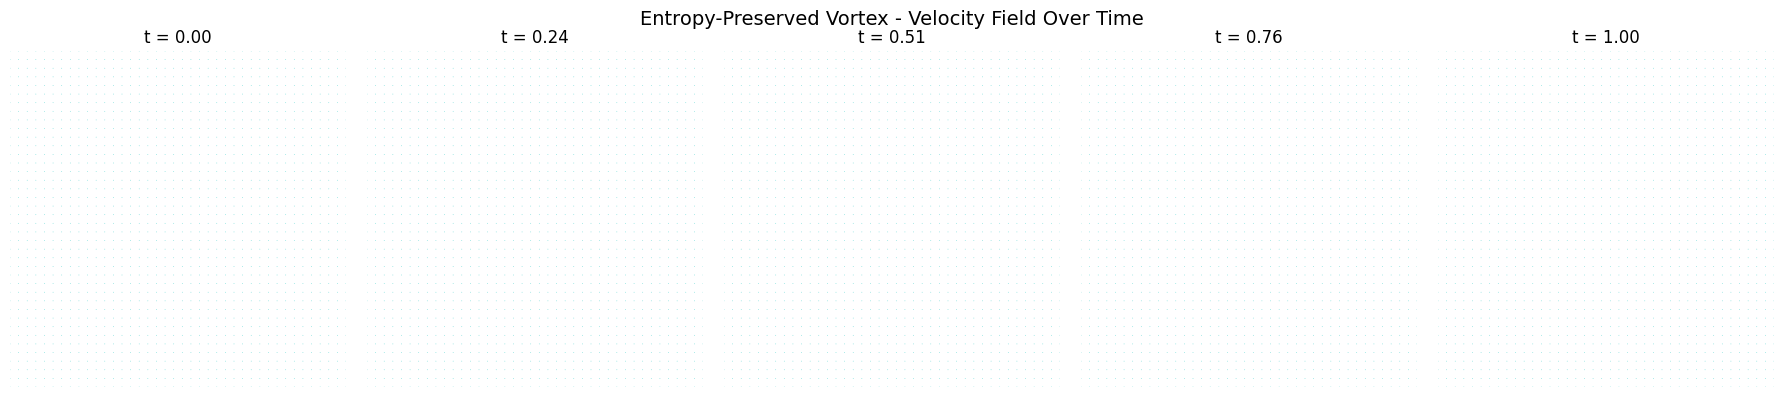

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Grid Setup
# ------------------------------------------
Lx, Ly, T = 1.0, 1.0, 1.0
Nx, Ny, Nt = 40, 40, 50

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

dx, dy, dt = x[1] - x[0], y[1] - y[0], t[1] - t[0]
X, Y = np.meshgrid(x, y, indexing='ij')

# ------------------------------------------
# 2. Vortex Velocity Function
def vortex_velocity(X, Y, scale=1.0, skew=1.0):
    cx, cy = 0.5, 0.5
    dx = X - cx
    dy = Y - cy
    radius_squared = dx**2 + dy**2 + 1e-6
    strength = scale * np.exp(-100 * radius_squared)
    vx = -dy * strength
    vy = dx * strength * skew
    return vx, vy

vx0, vy0 = vortex_velocity(X, Y)
vxT, vyT = vortex_velocity(X, Y, scale=0.9, skew=1.1)

# ------------------------------------------
# 3. Initial Guess
vx_guess = np.array([vx0 + (vxT - vx0) * (ti / T) for ti in t])
vy_guess = np.array([vy0 + (vyT - vy0) * (ti / T) for ti in t])
v_inner_guess = np.concatenate([vx_guess[1:-1].flatten(), vy_guess[1:-1].flatten()])

# ------------------------------------------
# 4. Entropy Loss Function
def entropy_loss(v_flat):
    vx = np.zeros((Nt, Nx, Ny))
    vy = np.zeros((Nt, Nx, Ny))

    vx[0], vy[0] = vx0, vy0
    vx[-1], vy[-1] = vxT, vyT

    size = (Nt - 2) * Nx * Ny
    vx[1:-1] = v_flat[:size].reshape((Nt - 2, Nx, Ny))
    vy[1:-1] = v_flat[size:].reshape((Nt - 2, Nx, Ny))

    dvx_dt = (vx[-1] - vx[-2]) / dt
    dvy_dt = (vy[-1] - vy[-2]) / dt

    S_final = np.sum(vx[-1] * dvx_dt + vy[-1] * dvy_dt)
    return 0.5 * S_final**2

# ------------------------------------------
# 5. Optimization
bounds = [(-2, 2)] * len(v_inner_guess)

result = minimize(
    entropy_loss,
    v_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# ------------------------------------------
# 6. Reconstruct Full Velocity Field
vx = np.zeros((Nt, Nx, Ny))
vy = np.zeros((Nt, Nx, Ny))

vx[0], vy[0] = vx0, vy0
vx[-1], vy[-1] = vxT, vyT

size = (Nt - 2) * Nx * Ny
vx[1:-1] = result.x[:size].reshape((Nt - 2, Nx, Ny))
vy[1:-1] = result.x[size:].reshape((Nt - 2, Nx, Ny))

# ------------------------------------------
# 7. Quiver Plots (Frame-by-Frame)
frames = [0, Nt//4, Nt//2, 3*Nt//4, Nt-1]

fig, axes = plt.subplots(1, len(frames), figsize=(18, 4))
for i, idx in enumerate(frames):
    ax = axes[i]
    ax.quiver(X, Y, vx[idx], vy[idx], scale=20, color='mediumturquoise')
    ax.set_title(f"t = {t[idx]:.2f}")
    ax.set_xlim(0, Lx)
    ax.set_ylim(0, Ly)
    ax.set_aspect('equal')
    ax.axis('off')
plt.suptitle("Entropy-Preserved Vortex - Velocity Field Over Time", fontsize=14)
plt.tight_layout()
plt.show()


## incline plane

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.81250D+01    |proj g|=  2.51256D-02

At iterate    1    f=  0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      1      2      2     0     1   0.000D+00   0.000D+00
  F =   0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


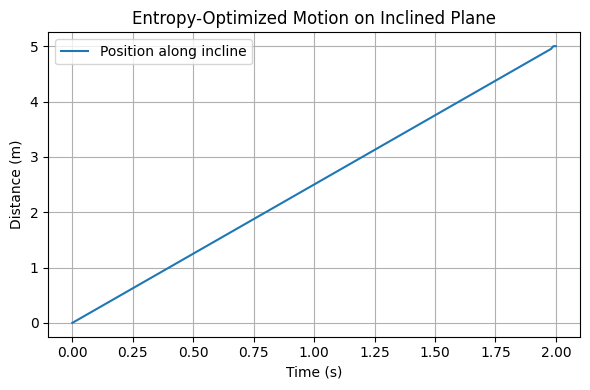

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Inclined plane parameters
T = 2.0       # total time
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m = 1.0       # mass
angle = np.pi / 6  # 30 degrees
length = 5.0       # total slide distance

# Projected horizontal position along the incline
x0 = 0.0
xT = length

# Linear guess
x_guess = np.linspace(x0, xT, N)
x_inner_guess = x_guess[1:-1]

# Entropy loss: S = m x dot{x}
def entropy_loss(x_array):
    x_full = np.concatenate(([x0], x_array, [xT]))
    xdot = np.gradient(x_full, dt)
    S_f = m * x_full[-1] * xdot[-1]
    return 0.5 * S_f**2

# Optimization
result = minimize(
    entropy_loss,
    x_inner_guess,
    method='L-BFGS-B',
    bounds=[(0.0, length)] * len(x_inner_guess),
    options={'disp': True, 'maxiter': 1000}
)

x_opt = np.concatenate(([x0], result.x, [xT]))
y_opt = x_opt * np.sin(angle)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(t_eval, x_opt, label='Position along incline')
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Entropy-Optimized Motion on Inclined Plane")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## circular motion

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97392D+01    |proj g|=  3.15738D-02

At iterate    1    f=  0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      1      2      2     0     1   0.000D+00   0.000D+00
  F =   0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


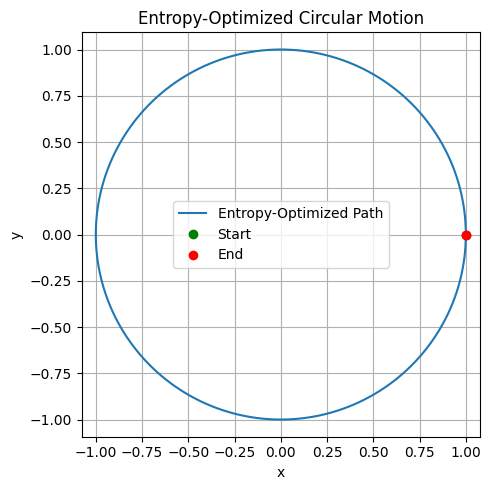

In [187]:
# Circular motion setup
T = 2 * np.pi   # one full rotation
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m = 1.0
radius = 1.0
theta0 = 0.0
thetaT = 2 * np.pi

theta_guess = np.linspace(theta0, thetaT, N)
theta_inner = theta_guess[1:-1]

def entropy_loss(theta_array):
    theta_full = np.concatenate(([theta0], theta_array, [thetaT]))
    dtheta = np.gradient(theta_full, dt)
    S = m * radius**2 * theta_full[-1] * dtheta[-1]
    return 0.5 * S**2

result = minimize(
    entropy_loss,
    theta_inner,
    method='L-BFGS-B',
    bounds=[(0.0, 2*np.pi)] * len(theta_inner),
    options={'disp': True, 'maxiter': 1000}
)

theta_opt = np.concatenate(([theta0], result.x, [thetaT]))
x = radius * np.cos(theta_opt)
y = radius * np.sin(theta_opt)

plt.figure(figsize=(5, 5))
plt.plot(x, y, label='Entropy-Optimized Path')
plt.plot(x[0], y[0], 'go', label='Start')
plt.plot(x[-1], y[-1], 'ro', label='End')
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Entropy-Optimized Circular Motion")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 2D projectile

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12500D+00    |proj g|=  2.00503D+00

At iterate    1    f=  2.74474D-13    |proj g|=  5.05639D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  396      2     43      5     0     0   5.056D-05   2.745D-13
  F =   2.7447385527499770E-013

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


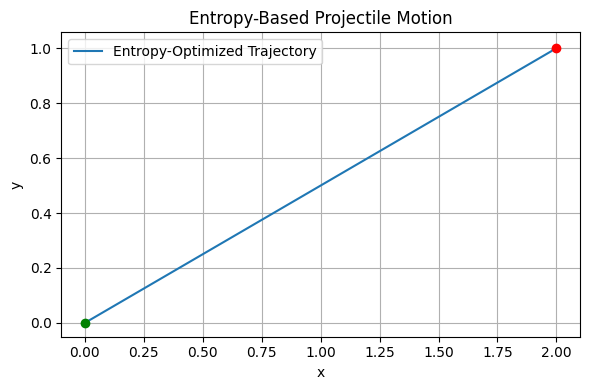

In [188]:
# 2D projectile motion setup
T = 2.0
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m = 1.0
x0, y0 = 0.0, 0.0
xT, yT = 2.0, 1.0

x_guess = np.linspace(x0, xT, N)
y_guess = np.linspace(y0, yT, N)

x_inner = x_guess[1:-1]
y_inner = y_guess[1:-1]
xy_inner = np.concatenate([x_inner, y_inner])

def entropy_loss(xy_array):
    x_full = np.concatenate(([x0], xy_array[:N-2], [xT]))
    y_full = np.concatenate(([y0], xy_array[N-2:], [yT]))
    dx = np.gradient(x_full, dt)
    dy = np.gradient(y_full, dt)
    S = m * (x_full[-1] * dx[-1] + y_full[-1] * dy[-1])
    return 0.5 * S**2

bounds = [(-1, 3)] * len(xy_inner)
result = minimize(
    entropy_loss,
    xy_inner,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

x_opt = np.concatenate(([x0], result.x[:N-2], [xT]))
y_opt = np.concatenate(([y0], result.x[N-2:], [yT]))

plt.figure(figsize=(6, 4))
plt.plot(x_opt, y_opt, label='Entropy-Optimized Trajectory')
plt.plot(x_opt[0], y_opt[0], 'go')
plt.plot(x_opt[-1], y_opt[-1], 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Entropy-Based Projectile Motion")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24766D+01    |proj g|=  2.95126D-01

At iterate    1    f=  5.12086D+01    |proj g|=  4.82496D+00

At iterate    2    f=  5.10702D+01    |proj g|=  4.86292D+00

At iterate    3    f=  5.09867D+01    |proj g|=  4.99477D+00

At iterate    4    f=  5.09368D+01    |proj g|=  4.99370D+00

At iterate    5    f=  5.08195D+01    |proj g|=  4.63805D+00

At iterate    6    f=  5.07430D+01    |proj g|=  4.96901D+00

At iterate    7    f=  5.05152D+01    |proj g|=  4.97342D+00

At iterate    8    f=  5.04333D+01    |proj g|=  4.94607D+00

At iterate    9    f=  5.01605D+01    |proj g|=  4.92229D+00

At iterate   10    f=  5.00502D+01    |proj g|=  2.53915D+00

At iterate   11    f=  4.99562D+01    |proj g|=  2.86075D+00

At iterate   12    f=  4.98049D+01    |proj g|=  4.10674D+00

At iterate   13    f=  4.9

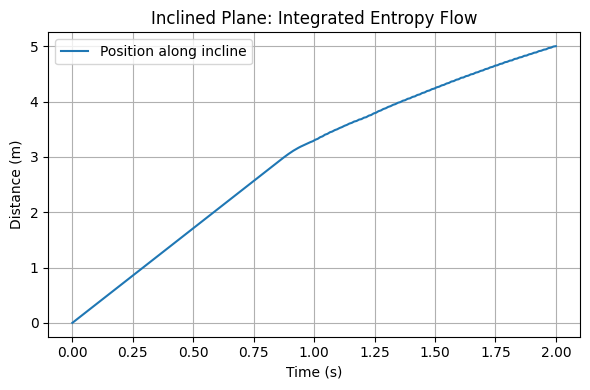

In [189]:
# 🔹 Inclined Plane (with integrated entropy over time)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters
T = 2.0
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m = 1.0
angle = np.pi / 6  # 30 degrees
length = 5.0
x0 = 0.0
xT = length

# Initial guess
x_guess = np.linspace(x0, xT, N)
x_inner_guess = x_guess[1:-1]

# Loss: integrated structural entropy flow
def entropy_loss(x_array):
    x_full = np.concatenate(([x0], x_array, [xT]))
    xdot = np.gradient(x_full, dt)
    S = m * x_full * xdot
    return 0.5 * np.sum(S**2) * dt

# Optimization
result = minimize(
    entropy_loss,
    x_inner_guess,
    method='L-BFGS-B',
    bounds=[(0.0, length)] * len(x_inner_guess),
    options={'disp': True, 'maxiter': 1000}
)

x_opt = np.concatenate(([x0], result.x, [xT]))
y_opt = x_opt * np.sin(angle)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(t_eval, x_opt, label='Position along incline')
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Inclined Plane: Integrated Entropy Flow")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37360D+00    |proj g|=  1.01005D+00

At iterate    1    f=  5.35602D+00    |proj g|=  8.31608D-01

At iterate    2    f=  5.35465D+00    |proj g|=  5.56308D-01

At iterate    3    f=  5.35149D+00    |proj g|=  2.64080D-01

At iterate    4    f=  5.34950D+00    |proj g|=  3.71513D-01

At iterate    5    f=  5.34484D+00    |proj g|=  5.96387D-01

At iterate    6    f=  5.33966D+00    |proj g|=  6.77132D-01

At iterate    7    f=  5.33322D+00    |proj g|=  6.64807D-01

At iterate    8    f=  5.31946D+00    |proj g|=  6.10336D-01

At iterate    9    f=  5.31000D+00    |proj g|=  7.21858D-01

At iterate   10    f=  5.29882D+00    |proj g|=  7.61905D-01

At iterate   11    f=  5.27741D+00    |proj g|=  1.15996D+00

At iterate   12    f=  5.26283D+00    |proj g|=  9.56371D-01

At iterate   13    f=  5.2

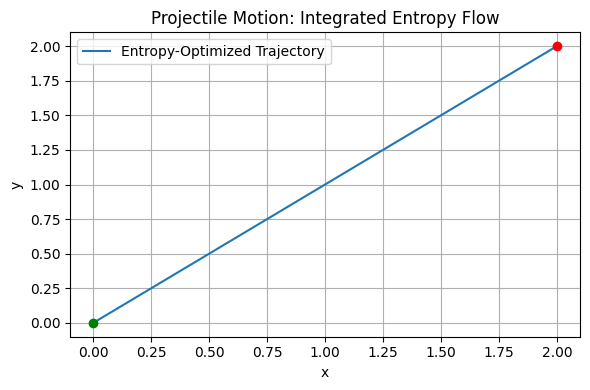

In [190]:
# 🔸 Projectile Motion (2D) with integrated entropy flow
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

T = 2.0
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m = 1.0
x0, y0 = 0.0, 0.0
xT, yT = 2.0, 2.0  # Higher target for curve

# Initial guess
x_guess = np.linspace(x0, xT, N)
y_guess = np.linspace(y0, yT, N)
xy_inner = np.concatenate([x_guess[1:-1], y_guess[1:-1]])

# Loss: integrated entropy flow
def entropy_loss(xy_array):
    x = np.concatenate(([x0], xy_array[:N-2], [xT]))
    y = np.concatenate(([y0], xy_array[N-2:], [yT]))
    dx = np.gradient(x, dt)
    dy = np.gradient(y, dt)
    S = m * (x * dx + y * dy)
    return 0.5 * np.sum(S**2) * dt

# Optimization
bounds = [(-1, 3)] * len(xy_inner)
result = minimize(
    entropy_loss,
    xy_inner,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

x_opt = np.concatenate(([x0], result.x[:N-2], [xT]))
y_opt = np.concatenate(([y0], result.x[N-2:], [yT]))

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x_opt, y_opt, label='Entropy-Optimized Trajectory')
plt.plot(x_opt[0], y_opt[0], 'go')
plt.plot(x_opt[-1], y_opt[-1], 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Projectile Motion: Integrated Entropy Flow")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09906D+00    |proj g|=  1.26250D+00

At iterate    1    f=  2.09242D+00    |proj g|=  5.20638D-01

At iterate    2    f=  2.09190D+00    |proj g|=  3.49155D-01

At iterate    3    f=  2.09071D+00    |proj g|=  1.63363D-01

At iterate    4    f=  2.08998D+00    |proj g|=  2.19146D-01

At iterate    5    f=  2.08829D+00    |proj g|=  3.51213D-01

At iterate    6    f=  2.08642D+00    |proj g|=  3.94707D-01

At iterate    7    f=  2.08412D+00    |proj g|=  3.97284D-01

At iterate    8    f=  2.07910D+00    |proj g|=  3.70324D-01

At iterate    9    f=  2.07557D+00    |proj g|=  4.46265D-01

At iterate   10    f=  2.07148D+00    |proj g|=  4.57516D-01

At iterate   11    f=  2.06318D+00    |proj g|=  7.08703D-01

At iterate   12    f=  2.05788D+00    |proj g|=  6.57287D-01

At iterate   13    f=  2.0

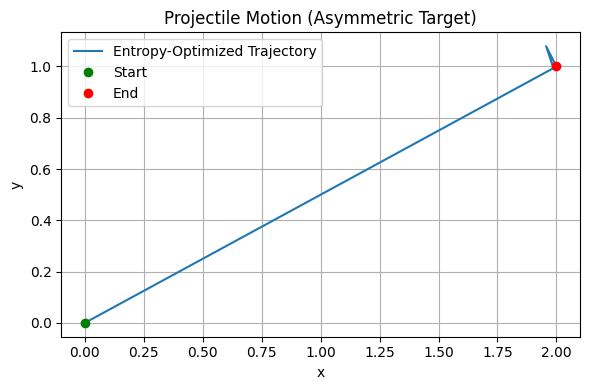

In [191]:
# 🔸 Projectile Motion: Non-symmetric target
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

T = 2.0
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m = 1.0
x0, y0 = 0.0, 0.0
xT, yT = 2.0, 1.0  # Lower target to break symmetry

x_guess = np.linspace(x0, xT, N)
y_guess = np.linspace(y0, yT, N)
xy_inner = np.concatenate([x_guess[1:-1], y_guess[1:-1]])

def entropy_loss(xy_array):
    x = np.concatenate(([x0], xy_array[:N-2], [xT]))
    y = np.concatenate(([y0], xy_array[N-2:], [yT]))
    dx = np.gradient(x, dt)
    dy = np.gradient(y, dt)
    S = m * (x * dx + y * dy)
    return 0.5 * np.sum(S**2) * dt

bounds = [(-1, 3)] * len(xy_inner)
result = minimize(
    entropy_loss,
    xy_inner,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

x_opt = np.concatenate(([x0], result.x[:N-2], [xT]))
y_opt = np.concatenate(([y0], result.x[N-2:], [yT]))

plt.figure(figsize=(6, 4))
plt.plot(x_opt, y_opt, label='Entropy-Optimized Trajectory')
plt.plot(x_opt[0], y_opt[0], 'go', label='Start')
plt.plot(x_opt[-1], y_opt[-1], 'ro', label='End')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Projectile Motion (Asymmetric Target)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13434D+01    |proj g|=  3.00000D+00

At iterate    1    f=  8.51870D+00    |proj g|=  3.08176D+00

At iterate    2    f=  4.02211D+00    |proj g|=  3.05229D+00

At iterate    3    f=  1.42800D+00    |proj g|=  2.98837D+00

At iterate    4    f=  1.40287D+00    |proj g|=  2.99138D+00

At iterate    5    f=  1.33551D+00    |proj g|=  4.96266D-01

At iterate    6    f=  1.33373D+00    |proj g|=  3.53388D-01

At iterate    7    f=  1.33049D+00    |proj g|=  1.96669D-01

At iterate    8    f=  1.33012D+00    |proj g|=  2.71138D-01

At iterate    9    f=  1.32960D+00    |proj g|=  1.01234D-01

At iterate   10    f=  1.32914D+00    |proj g|=  9.88720D-02

At iterate   11    f=  1.32870D+00    |proj g|=  1.72048D-01

At iterate   12    f=  1.32764D+00    |proj g|=  1.99017D-01

At iterate   13    f=  1.3

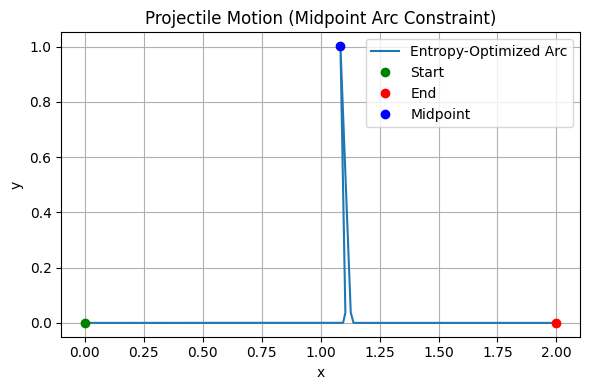

In [192]:
# 🔹 Projectile Motion: Midpoint Constraint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

T = 2.0
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m = 1.0
x0, y0 = 0.0, 0.0
xT, yT = 2.0, 0.0  # End back on the ground

x_guess = np.linspace(x0, xT, N)
y_guess = np.linspace(y0, yT, N)
xy_inner = np.concatenate([x_guess[1:-1], y_guess[1:-1]])

desired_mid_y = 1.0  # target height at midpoint

def entropy_loss(xy_array):
    x = np.concatenate(([x0], xy_array[:N-2], [xT]))
    y = np.concatenate(([y0], xy_array[N-2:], [yT]))
    dx = np.gradient(x, dt)
    dy = np.gradient(y, dt)
    S = m * (x * dx + y * dy)
    entropy_term = 0.5 * np.sum(S**2) * dt
    bump_penalty = 10.0 * (y[N//2] - desired_mid_y)**2
    return entropy_term + bump_penalty

bounds = [(-1, 3)] * len(xy_inner)
result = minimize(
    entropy_loss,
    xy_inner,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

x_opt = np.concatenate(([x0], result.x[:N-2], [xT]))
y_opt = np.concatenate(([y0], result.x[N-2:], [yT]))

plt.figure(figsize=(6, 4))
plt.plot(x_opt, y_opt, label='Entropy-Optimized Arc')
plt.plot(x_opt[0], y_opt[0], 'go', label='Start')
plt.plot(x_opt[-1], y_opt[-1], 'ro', label='End')
plt.plot(x_opt[N//2], y_opt[N//2], 'bo', label='Midpoint')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Projectile Motion (Midpoint Arc Constraint)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


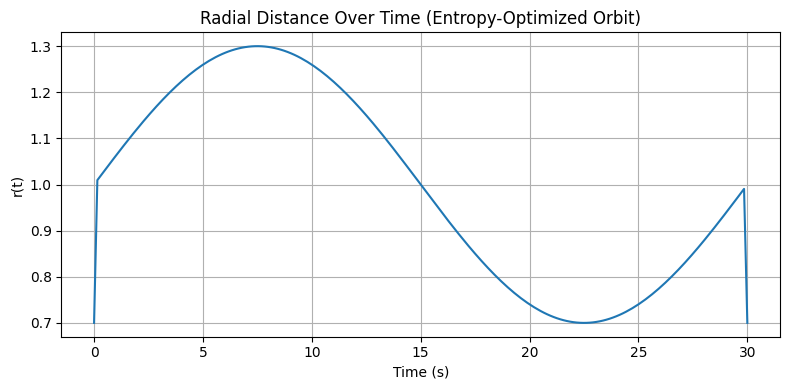

In [147]:
import matplotlib.pyplot as plt

r = r_opt  # from your optimization
plt.figure(figsize=(8, 4))
plt.plot(t_eval, r)
plt.xlabel("Time (s)")
plt.ylabel("r(t)")
plt.title("Radial Distance Over Time (Entropy-Optimized Orbit)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Harmonic Oscillator

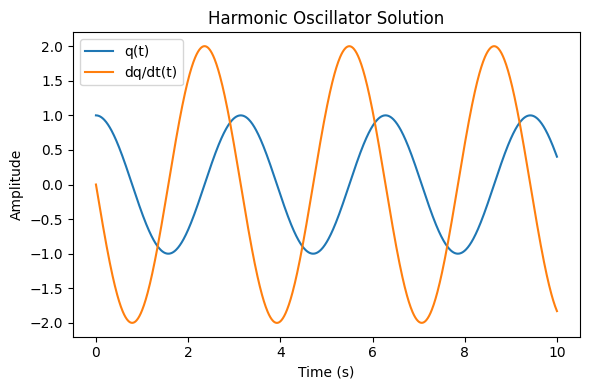

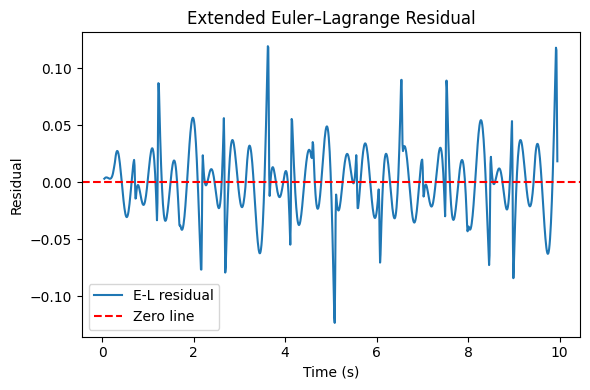

RMS of Euler–Lagrange residual: 2.989e-02
Entropy-flow MRP Action: -0.271523


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/185544956.py:152: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_integral = np.trapz(E_vals, t_eval)


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ----------------------------------------------------
# 1) Define parameters for the harmonic oscillator
# ----------------------------------------------------
m = 1.0   # mass (kg)
k = 4.0   # spring constant (N/m) --> so w = sqrt(k/m) = 2 rad/s
A = 0   # placeholder for A = (k_B^2 / hbar), etc. A=0 reduces the residual here. abs(A) > 0 increases amplitude and results in sine wave shape

omega = np.sqrt(k/m)  # natural frequency

# Time domain
t_start, t_end = 0, 10
N_points = 1000
t_eval = np.linspace(t_start, t_end, N_points)

# Initial conditions: q(0)=1, q'(0)=0, for example
q0 = 1.0
qdot0 = 0.0
y0 = [q0, qdot0]

# ----------------------------------------------------
# 2) Solve the standard HO ODE: ddot{q} + w^2 q = 0
# ----------------------------------------------------
def harmonic_oscillator_ode(t, y):
    q, qdot = y
    qddot = -omega**2 * q
    return [qdot, qddot]

sol = solve_ivp(harmonic_oscillator_ode, [t_start, t_end], y0, t_eval=t_eval)
q_sol = sol.y[0]
qdot_sol = sol.y[1]

# Approximate ddot{q} with finite difference
dt = t_eval[1] - t_eval[0]
qddot_sol = np.gradient(qdot_sol, dt)

# ----------------------------------------------------
# 3) Define the MRP Lagrangian pieces:
#
#    E = 0.5 m qdot^2 + 0.5 k q^2
#    S = m q qdot
#    dot{S} = m(qdot^2 + q qddot)
# ----------------------------------------------------
def energy(q, qdot):
    return 0.5*m*qdot**2 + 0.5*k*q**2

def Sfunc(q, qdot):
    return m * q * qdot

def Sdot(q, qdot, qddot):
    return m * (qdot**2 + q * qddot)

def Lagrangian(q, qdot, qddot):
    return A*energy(q, qdot) - Sfunc(q, qdot)*Sdot(q, qdot, qddot)


# ----------------------------------------------------
# 4) Compute partial derivatives for E-L:
#
#    dL/dq,    dL/d(qdot),    dL/d(qddot)
#
# Then form E = dL/dq - d/dt(dL/dqdot) + d^2/dt^2(dL/dqddot).
# ----------------------------------------------------

def dL_dq(q, qdot, qddot):
    # L = A E - S Sdot
    # d/dq( A E ) = A * dE/dq = A * (k q)
    # d/dq( -S Sdot ) = - d/dq( m^2 q qdot (qdot^2 + q qddot) )
    # => -m^2 [ qdot (qdot^2 + q qddot) + q qdot (qddot) ]
    # => -m^2 [ qdot^3 + 2 q qdot qddot ]
    return A*k*q - m**2*(qdot**3 + 2*q*qdot*qddot)

def dL_dqdot(q, qdot, qddot):
    # A E -> A * d/dqdot( 0.5 m qdot^2 + 0.5 k q^2 ) = A * (m qdot)
    # - S Sdot -> - d/dqdot( m^2 q qdot (qdot^2 + q qddot) )
    # => -m^2 [ q (3 qdot^2 + q qddot) ]
    return A*m*qdot - m**2*(3*q*qdot**2 + q**2*qddot)

def dL_dqddot(q, qdot):
    # only from - S Sdot = - m^2 q qdot (qdot^2 + q qddot)
    # derivative wrt qddot => - m^2 q^2 qdot
    return -m**2*(q**2 * qdot)

# We'll do numeric time derivatives for these partial derivatives
def numeric_derivative(arr, dt):
    return np.gradient(arr, dt)

# Evaluate partials
pL_pq_vals      = dL_dq(q_sol, qdot_sol, qddot_sol)
pL_pqdot_vals   = dL_dqdot(q_sol, qdot_sol, qddot_sol)
pL_pqddot_vals  = dL_dqddot(q_sol, qdot_sol)

# 1st time derivative
ddt_pL_pqdot_vals = numeric_derivative(pL_pqdot_vals, dt)
# 2nd time derivative
d2dt2_pL_pqddot_vals = numeric_derivative(numeric_derivative(pL_pqddot_vals, dt), dt)

# The Euler–Lagrange "residual":
EL_resid = pL_pq_vals - ddt_pL_pqdot_vals + d2dt2_pL_pqddot_vals

# ----------------------------------------------------
# 5) Plot the results
# ----------------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(t_eval, q_sol, label="q(t)")
plt.plot(t_eval, qdot_sol, label="dq/dt(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Harmonic Oscillator Solution")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(t_eval[5:-5], EL_resid[5:-5], label="E-L residual")
plt.axhline(y=0, color='r', linestyle='--', label="Zero line")
plt.xlabel("Time (s)")
plt.ylabel("Residual")
plt.title("Extended Euler–Lagrange Residual")
plt.legend()
plt.tight_layout()
plt.show()


# Let's print a measure of the residual's magnitude
EL_resid = EL_resid[5:-5] # Normalize
rms_resid = np.sqrt(np.mean(EL_resid**2))
print(f"RMS of Euler–Lagrange residual: {rms_resid:.3e}")


# ----------------------------------------------------
# Compute the entropy-flow MRP action directly
# ----------------------------------------------------

# Reuse your existing definitions
def energy(q, qdot):
    return 0.5 * m * qdot**2 + 0.5 * k * q**2

def Sfunc(q, qdot):
    return m * q * qdot

# Evaluate E(t) and S(t)
E_vals = energy(q_sol, qdot_sol)
S_vals = Sfunc(q_sol, qdot_sol)

# Time step size
dt = t_eval[1] - t_eval[0]

# Compute integral of energy
E_integral = np.trapz(E_vals, t_eval)

# Compute boundary term
S_i = S_vals[0]
S_f = S_vals[-1]
S_boundary = 0.5 * (S_f**2 - S_i**2)

# Final entropy-structured action
S_mrp_action = A * E_integral - S_boundary

print(f"Entropy-flow MRP Action: {S_mrp_action:.6f}")



In [89]:
# 1. Define perturbation
epsilon = 0.01  # small perturbation scale
delta_q = np.sin(2 * np.pi * t_eval / (t_end - t_start))  # one cycle sine perturbation

# Apply perturbation
q_perturbed = q_sol + epsilon * delta_q

# Estimate new qdot and qddot
qdot_perturbed = np.gradient(q_perturbed, dt)
qddot_perturbed = np.gradient(qdot_perturbed, dt)

# 2. Recompute E and S for perturbed path
E_perturbed = energy(q_perturbed, qdot_perturbed)
S_perturbed = Sfunc(q_perturbed, qdot_perturbed)

# 3. Compute new action
E_integral_perturbed = np.trapz(E_perturbed, t_eval)
S_boundary_perturbed = 0.5 * (S_perturbed[-1]**2 - S_perturbed[0]**2)

S_mrp_perturbed = A * E_integral_perturbed - S_boundary_perturbed

# 4. Print comparison
print(f"Original Entropy-flow MRP Action:  {S_mrp_action:.6f}")
print(f"Perturbed Entropy-flow MRP Action: {S_mrp_perturbed:.6f}")
print(f"ΔAction = {S_mrp_perturbed - S_mrp_action:.6e}")


Original Entropy-flow MRP Action:  -0.271523
Perturbed Entropy-flow MRP Action: -0.267154
ΔAction = 4.369413e-03


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/2751964602.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_integral_perturbed = np.trapz(E_perturbed, t_eval)


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/3418165577.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  S_mrp_classical = A * np.trapz(E_original, t_eval) - 0.5 * (S_original[-1]**2 - S_original[0]**2)
/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/3418165577.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  action_pert = A * np.trapz(E_pert, t_eval) - 0.5 * (S_pert[-1]**2 - S_pert[0]**2)


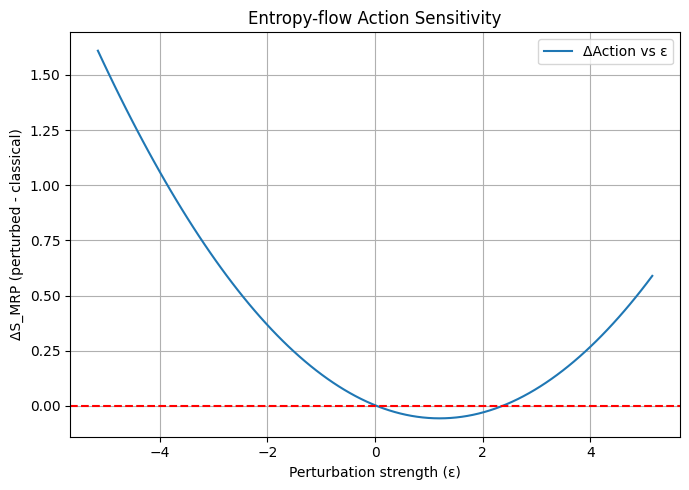

In [98]:
# -----------------------------------------------
# 1. Generate epsilon values and store ΔAction
# -----------------------------------------------
epsilons = np.linspace(-5.15, 5.15, 100)
delta_actions = []

# Precompute original energy and Sfunc
E_original = energy(q_sol, qdot_sol)
S_original = Sfunc(q_sol, qdot_sol)
S_mrp_classical = A * np.trapz(E_original, t_eval) - 0.5 * (S_original[-1]**2 - S_original[0]**2)

# Define the perturbation shape
# delta_q = np.sin(2 * np.pi * t_eval / (t_end - t_start))  # single sine bump
# Perturbation that vanishes at endpoints
delta_q = np.sin(np.pi * (t_eval - t_start) / (t_end - t_start))  # half sine wave (zero at ends)

for eps in epsilons:
    q_pert = q_sol + eps * delta_q
    qdot_pert = np.gradient(q_pert, dt)
    qddot_pert = np.gradient(qdot_pert, dt)

    E_pert = energy(q_pert, qdot_pert)
    S_pert = Sfunc(q_pert, qdot_pert)

    action_pert = A * np.trapz(E_pert, t_eval) - 0.5 * (S_pert[-1]**2 - S_pert[0]**2)
    delta_S = action_pert - S_mrp_classical
    delta_actions.append(delta_S)

# -----------------------------------------------
# 2. Plot the results
# -----------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(epsilons, delta_actions, label='ΔAction vs ε')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Perturbation strength (ε)")
plt.ylabel("ΔS_MRP (perturbed - classical)")
plt.title("Entropy-flow Action Sensitivity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Fitted curve: ΔS ≈ 2.6228e-03 + -9.9084e-02*ε + 4.1348e-02*ε²


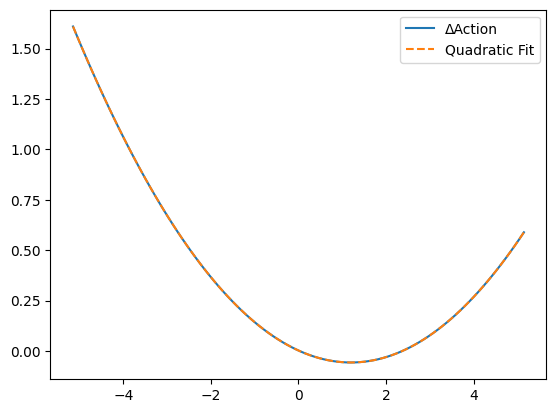

In [99]:
from numpy.polynomial.polynomial import Polynomial

fit = Polynomial.fit(epsilons, delta_actions, deg=2)
coefs = fit.convert().coef
print(f"Fitted curve: ΔS ≈ {coefs[0]:.4e} + {coefs[1]:.4e}*ε + {coefs[2]:.4e}*ε²")

fit_curve = coefs[0] + coefs[1]*epsilons + coefs[2]*epsilons**2
plt.plot(epsilons, delta_actions, label='ΔAction')
plt.plot(epsilons, fit_curve, '--', label='Quadratic Fit')
plt.legend()


In [94]:
from numpy.polynomial.polynomial import Polynomial

fit = Polynomial.fit(epsilons, delta_actions, deg=2)
coefs = fit.convert().coef
print(f"Fitted curve: ΔS ≈ {coefs[0]:.4e} + {coefs[1]:.4e}*ε + {coefs[2]:.4e}*ε²")


Fitted curve: ΔS ≈ 2.6228e-03 + 1.7301e-01*ε + 1.6539e-01*ε²


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/2997260504.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_integral = np.trapz(E_vals, t_eval)


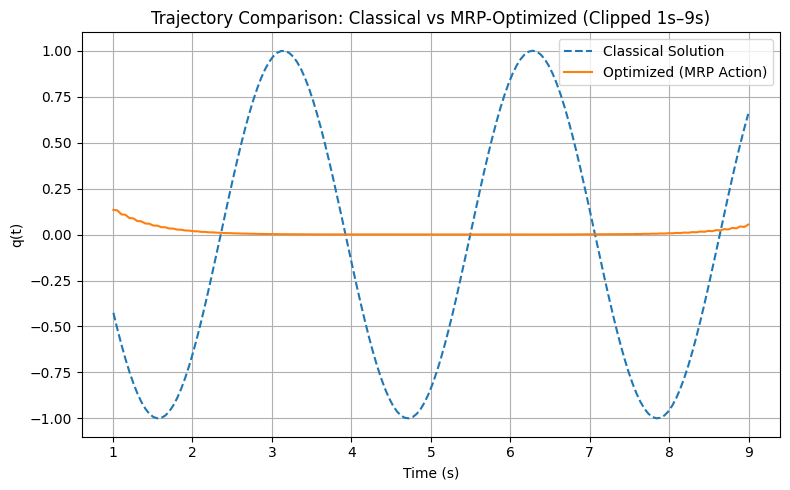

Clipped MRP Action (classical): 159.411795
Clipped MRP Action (optimized): 0.222919
ΔAction (clipped) = -1.591889e+02


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/2997260504.py:106: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_integral = np.trapz(E_vals[clip_mask], t_eval_clipped)


In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# ----------------------------------------------------
# Parameters for Harmonic Oscillator
# ----------------------------------------------------
m = 1.0
k = 4.0
A = 10  # Just entropy term for now

omega = np.sqrt(k/m)
t_start, t_end = 0.0, 10.0
N_points = 200
t_eval = np.linspace(t_start, t_end, N_points)
dt = t_eval[1] - t_eval[0]

# Initial classical solution (to compare against)
q0 = 1.0
qdot0 = 0.0
y0 = [q0, qdot0]

def ho_ode(t, y):
    q, qdot = y
    return [qdot, -omega**2 * q]

sol = solve_ivp(ho_ode, [t_start, t_end], y0, t_eval=t_eval)
q_classical = sol.y[0]

# ----------------------------------------------------
# Entropy-based Lagrangian definitions
# ----------------------------------------------------
def energy(q, qdot):
    return 0.5 * m * qdot**2 + 0.5 * k * q**2

def Sfunc(q, qdot):
    return m * q * qdot

def entropy_flow_action(q):
    qdot = np.gradient(q, dt)
    E_vals = energy(q, qdot)
    S_vals = Sfunc(q, qdot)

    E_integral = np.trapz(E_vals, t_eval)
    S_boundary = 0.5 * (S_vals[-1]**2 - S_vals[0]**2)

    return A * E_integral - S_boundary

# ----------------------------------------------------
# Set up the optimizer
# ----------------------------------------------------

# Fix endpoints (can match classical solution or any others)
q_start = q_classical[0]
q_end = q_classical[-1]

# Initial guess: linear interpolation
q_initial_guess = np.linspace(q_start, q_end, N_points)

# We'll only optimize the interior points, endpoints are fixed
def objective(q_inner):
    q_full = np.concatenate(([q_start], q_inner, [q_end]))
    return entropy_flow_action(q_full)

q_inner_guess = q_initial_guess[1:-1]

# Minimize the action
result = minimize(objective, q_inner_guess, method='L-BFGS-B')

# Rebuild full optimized trajectory
q_opt = np.concatenate(([q_start], result.x, [q_end]))

# ----------------------------------------------------
# Clip time interval to 1s–9s for clean comparison
# ----------------------------------------------------
t_clip_start = 1.0
t_clip_end = 9.0
clip_mask = (t_eval >= t_clip_start) & (t_eval <= t_clip_end)

t_eval_clipped = t_eval[clip_mask]
q_classical_clipped = q_classical[clip_mask]
q_opt_clipped = q_opt[clip_mask]

# ----------------------------------------------------
# Plot clipped comparison
# ----------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(t_eval_clipped, q_classical_clipped, label="Classical Solution", linestyle='--')
plt.plot(t_eval_clipped, q_opt_clipped, label="Optimized (MRP Action)", linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel("q(t)")
plt.title("Trajectory Comparison: Classical vs MRP-Optimized (Clipped 1s–9s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------------------------------
# Recalculate action only over clipped region (optional)
# ----------------------------------------------------
def entropy_flow_action_clipped(q):
    qdot = np.gradient(q, dt)
    E_vals = energy(q, qdot)
    S_vals = Sfunc(q, qdot)
    E_integral = np.trapz(E_vals[clip_mask], t_eval_clipped)
    S_boundary = 0.5 * (S_vals[clip_mask][-1]**2 - S_vals[clip_mask][0]**2)
    return A * E_integral - S_boundary

S_classical_clipped = entropy_flow_action_clipped(q_classical)
S_optimized_clipped = entropy_flow_action_clipped(q_opt)
print(f"Clipped MRP Action (classical): {S_classical_clipped:.6f}")
print(f"Clipped MRP Action (optimized): {S_optimized_clipped:.6f}")
print(f"ΔAction (clipped) = {S_optimized_clipped - S_classical_clipped:.6e}")



In [122]:
from scipy.optimize import minimize

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# ----------------------------------------------------
# Parameters for Harmonic Oscillator
# ----------------------------------------------------
m = 1.0
k = 4.0
A = 0

omega = np.sqrt(k/m)
t_start, t_end = 0.0, 10.0
N_points = 200
t_eval = np.linspace(t_start, t_end, N_points)
dt = t_eval[1] - t_eval[0]

# Initial classical solution (to compare against)
q0 = 1.0
qdot0 = 0.0
y0 = [q0, qdot0]

def ho_ode(t, y):
    q, qdot = y
    return [qdot, -omega**2 * q]

sol = solve_ivp(ho_ode, [t_start, t_end], y0, t_eval=t_eval)
q_classical = sol.y[0]

# ----------------------------------------------------
# Entropy-based Lagrangian definitions
# ----------------------------------------------------
def energy(q, qdot):
    return 0.5 * m * qdot**2 + 0.5 * k * q**2

def Sfunc(q, qdot):
    return m * q * qdot


# ------------------------------------------
# 1. Setup
# ------------------------------------------

q_start = q_classical[0]
q_end = q_classical[-1]

# Use classical trajectory as a safer initial guess
q_inner_guess = q_classical[1:-1]

# Define bounds to prevent runaway values (e.g., -10 to +10 range)
bounds = [(-5.0, 5.0)] * len(q_inner_guess)

# ------------------------------------------
# 2. Refactored Action Function (with safety)
# ------------------------------------------

def entropy_flow_action_safe(q_array):
    qdot = np.gradient(q_array, dt)
    
    if np.any(np.isnan(q_array)) or np.any(np.abs(q_array) > 1e6):
        return 1e12  # Penalize nonsense
    if np.any(np.isnan(qdot)) or np.any(np.abs(qdot) > 1e6):
        return 1e12
    
    E_vals = energy(q_array, qdot)
    S_vals = Sfunc(q_array, qdot)

    E_integral = np.trapz(E_vals, t_eval)
    S_boundary = 0.5 * (S_vals[-1]**2 - S_vals[0]**2)

    # Normalize the action if you want to stabilize the scale
    S_total = A * E_integral - S_boundary
    return S_total

# ------------------------------------------
# 3. Objective: Optimize only the interior
# ------------------------------------------

def objective(q_inner):
    q_full = np.concatenate(([q_start], q_inner, [q_end]))
    return entropy_flow_action_safe(q_full)

# ------------------------------------------
# 4. Optimization with constraints and logging
# ------------------------------------------

result = minimize(
    objective,
    q_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={
        'disp': True,
        'maxiter': 1000
    }
)

if not result.success:
    print("⚠️ Optimizer failed:", result.message)

# Reconstruct full optimized path
q_opt = np.concatenate(([q_start], result.x, [q_end]))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53726D-01    |proj g|=  4.50759D+00

At iterate    1    f= -1.87748D+00    |proj g|=  6.21144D+00

At iterate    2    f= -1.18715D+02    |proj g|=  7.68129D+00
  ys=-1.815E+02  -gs= 2.610E+01 BFGS update SKIPPED

At iterate    3    f= -5.08649D+02    |proj g|=  6.92597D+00

At iterate    4    f= -6.78424D+02    |proj g|=  1.13687D-05


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/2321328061.py:71: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_integral = np.trapz(E_vals, t_eval)



At iterate    5    f= -6.78424D+02    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      5     10      6     1     1   0.000D+00  -6.784D+02
  F =  -678.42388339004947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


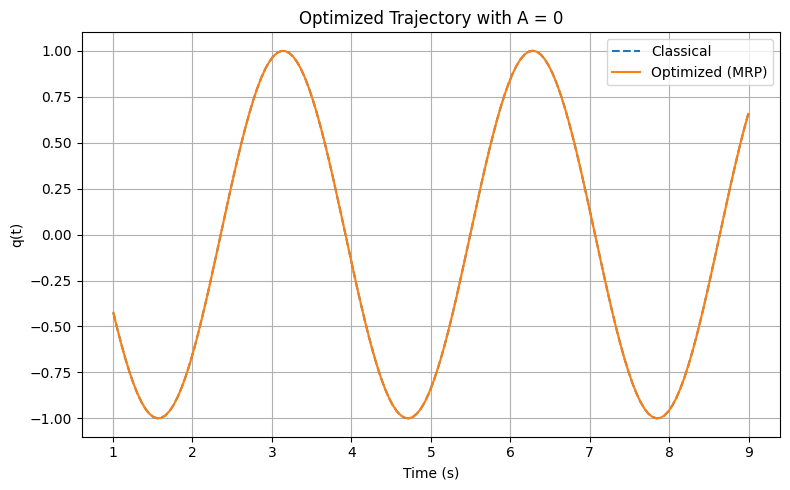

Clipped MRP Action (classical): -0.193651
Clipped MRP Action (optimized): -0.193651
ΔAction (clipped): 0.000000e+00


/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/10898089.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_integral = np.trapz(E_vals[clip_mask], t_eval_clipped)


In [123]:
# Clip for visualization
clip_mask = (t_eval >= 1.0) & (t_eval <= 9.0)
t_eval_clipped = t_eval[clip_mask]
q_classical_clipped = q_classical[clip_mask]
q_opt_clipped = q_opt[clip_mask]

# Plot
plt.figure(figsize=(8,5))
plt.plot(t_eval_clipped, q_classical_clipped, '--', label='Classical')
plt.plot(t_eval_clipped, q_opt_clipped, '-', label='Optimized (MRP)')
plt.title(f"Optimized Trajectory with A = {A}")
plt.xlabel("Time (s)")
plt.ylabel("q(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute action for each
def entropy_flow_action_clipped(q):
    qdot = np.gradient(q, dt)
    E_vals = energy(q, qdot)
    S_vals = Sfunc(q, qdot)
    E_integral = np.trapz(E_vals[clip_mask], t_eval_clipped)
    S_boundary = 0.5 * (S_vals[clip_mask][-1]**2 - S_vals[clip_mask][0]**2)
    return A * E_integral - S_boundary

S_classical_clipped = entropy_flow_action_clipped(q_classical)
S_opt_clipped = entropy_flow_action_clipped(q_opt)

print(f"Clipped MRP Action (classical): {S_classical_clipped:.6f}")
print(f"Clipped MRP Action (optimized): {S_opt_clipped:.6f}")
print(f"ΔAction (clipped): {S_opt_clipped - S_classical_clipped:.6e}")


#### Harmonic oscillator with standard lagrangian

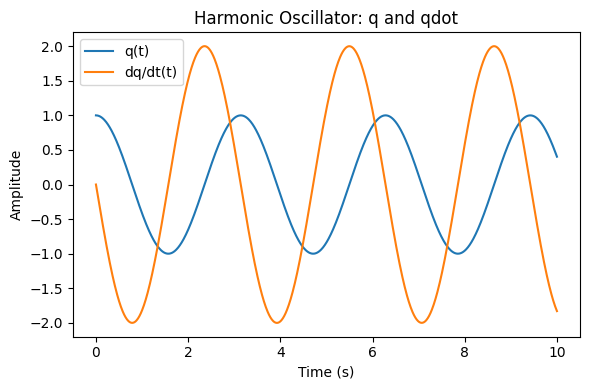

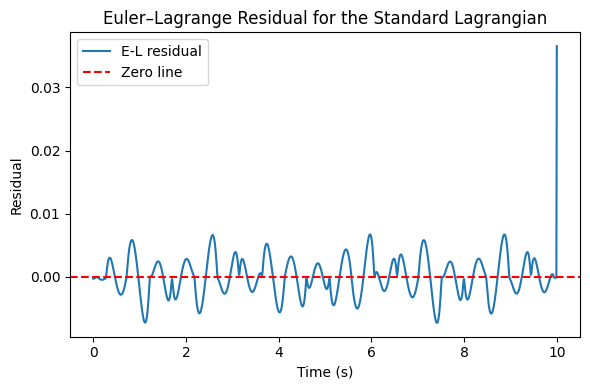

RMS E-L residual: 3.207e-03


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ---------------------------------------------
# 1) Harmonic Oscillator Parameters
# ---------------------------------------------
m = 1.0    # mass
k = 4.0    # spring constant -> w^2 = k/m = 4
w = np.sqrt(k/m)

t_start, t_end = 0, 10
N_points = 1000
t_eval = np.linspace(t_start, t_end, N_points)

# Initial conditions: q(0)=1, q'(0)=0
q0 = 1.0
qdot0 = 0.0
y0 = [q0, qdot0]

# ---------------------------------------------
# 2) Solve the HO ODE: ddot{q} + (k/m) q = 0
# ---------------------------------------------
def ho_ode(t, y):
    q, qdot = y
    qddot = - (k/m)*q
    return [qdot, qddot]

sol = solve_ivp(ho_ode, [t_start, t_end], y0, t_eval=t_eval)
q_sol = sol.y[0]
qdot_sol = sol.y[1]

# Approximate ddot{q} with finite difference
dt = t_eval[1] - t_eval[0]
qddot_sol = np.gradient(qdot_sol, dt)

# ---------------------------------------------
# 3) Define the Standard Lagrangian: L = T - V
#    L(q, qdot) = 1/2 m qdot^2 - 1/2 k q^2
# ---------------------------------------------
def L_standard(q, qdot):
    return 0.5*m*qdot**2 - 0.5*k*q**2

# The partial derivatives we need:
# dL/dq    = -k q
# dL/dqdot =  m qdot

def dL_dq(q):
    return -k * q

def dL_dqdot(qdot):
    return m * qdot

# ---------------------------------------------
# 4) Euler–Lagrange Residual:
#    E(q) = dL/dq - d/dt(dL/dqdot) 
# ---------------------------------------------
def numeric_derivative(arr, dt):
    return np.gradient(arr, dt)

# Evaluate partials on the solution
pL_pq = dL_dq(q_sol)                  # array of size N
pL_pqdot = dL_dqdot(qdot_sol)         # array of size N

# Time derivative of pL_pqdot
ddt_pL_pqdot = numeric_derivative(pL_pqdot, dt)

# The E-L "residual":
EL_resid = pL_pq - ddt_pL_pqdot

# ---------------------------------------------
# 5) Plots
# ---------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(t_eval, q_sol, label="q(t)")
plt.plot(t_eval, qdot_sol, label="dq/dt(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Harmonic Oscillator: q and qdot")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(t_eval, EL_resid, label="E-L residual")
plt.axhline(y=0, color='r', linestyle='--', label="Zero line")
plt.xlabel("Time (s)")
plt.ylabel("Residual")
plt.title("Euler–Lagrange Residual for the Standard Lagrangian")
plt.legend()
plt.tight_layout()
plt.show()

# Print a measure of how close to 0 the residual is
resid_rms = np.sqrt(np.mean(EL_resid**2))
print(f"RMS E-L residual: {resid_rms:.3e}")


## Particle in free fall

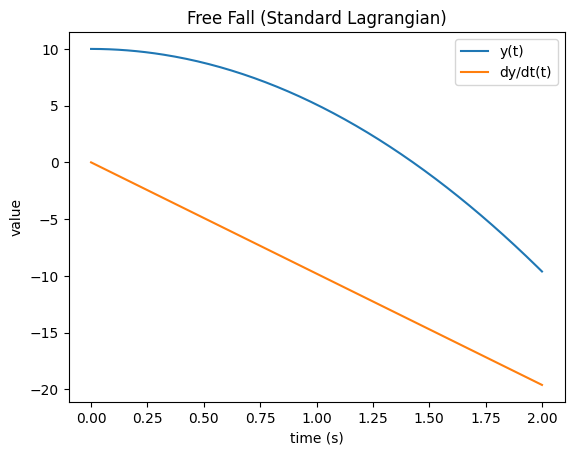

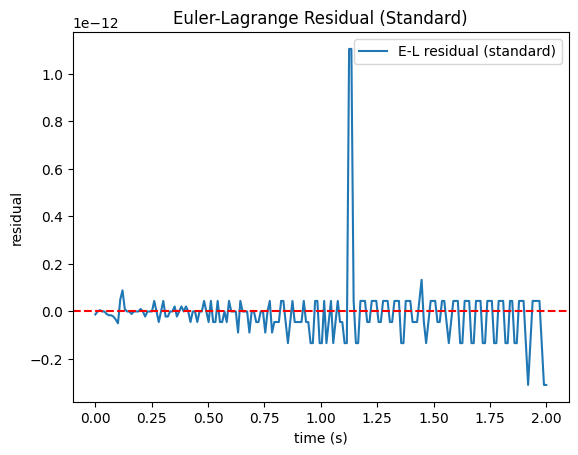

RMS residual (standard) = 1.3293e-13


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ----------------------------------------------------
# 1) Parameters for the free-fall problem
# ----------------------------------------------------
m = 1.0       # mass (kg)
g = 9.81      # gravitational accel (m/s^2)
t_start, t_end = 0.0, 2.0
N_points = 200
t_eval = np.linspace(t_start, t_end, N_points)

# Initial conditions: y(0)=10 m, y'(0)=0 m/s
y0 = 10.0
ydot0 = 0.0
y_init = [y0, ydot0]

# ----------------------------------------------------
# 2) Solve the standard ODE: y'' = -g
# ----------------------------------------------------
def free_fall_ode(t, y):
    pos, vel = y
    accel = -g
    return [vel, accel]

sol = solve_ivp(free_fall_ode, [t_start, t_end], y_init, t_eval=t_eval)

y_sol = sol.y[0]     # position
ydot_sol = sol.y[1]  # velocity

# approximate yddot with finite difference
dt = t_eval[1] - t_eval[0]
yddot_sol = np.gradient(ydot_sol, dt)

# ----------------------------------------------------
# 3) Standard Lagrangian: L = T - V = 1/2 m v^2 - m g y
#    partial derivatives:
#    dL/dy    = -m g
#    dL/dydot = m dydot
# ----------------------------------------------------
def L_standard(y, ydot):
    return 0.5*m*ydot**2 - m*g*y

def dL_dy(y):
    return -m*g

def dL_dydot(ydot):
    return m*ydot

# Euler-Lagrange residual: E(y) = dL/dy - d/dt(dL/dydot)
def numeric_derivative(a, dt):
    return np.gradient(a, dt)

pL_py = dL_dy(y_sol)               # array of -m*g
pL_pydot = dL_dydot(ydot_sol)      # array of m*ydot
ddt_pL_pydot = numeric_derivative(pL_pydot, dt)

EL_resid_standard = pL_py - ddt_pL_pydot

# ----------------------------------------------------
# 4) Plot results
# ----------------------------------------------------
plt.figure()
plt.plot(t_eval, y_sol, label="y(t)")
plt.plot(t_eval, ydot_sol, label="dy/dt(t)")
plt.xlabel("time (s)")
plt.ylabel("value")
plt.title("Free Fall (Standard Lagrangian)")
plt.legend()
plt.show()

plt.figure()
plt.plot(t_eval, EL_resid_standard, label="E-L residual (standard)")
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("time (s)")
plt.ylabel("residual")
plt.title("Euler-Lagrange Residual (Standard)")
plt.legend()
plt.show()

rms_std = np.sqrt(np.mean(EL_resid_standard**2))
print(f"RMS residual (standard) = {rms_std:.4e}")


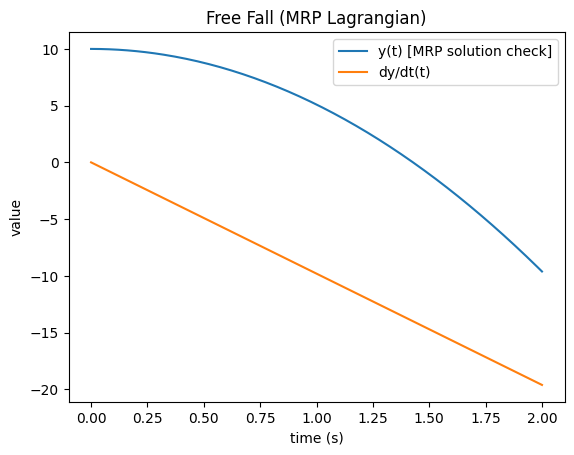

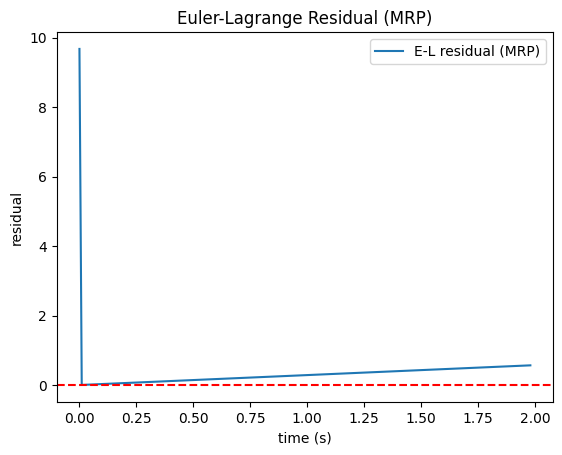

RMS residual (MRP) = 1.0296e+03


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ----------------------------------------------------
# 1) Parameters
# ----------------------------------------------------
m = 1.0
g = 9.81
A = 0   # placeholder for (k_B^2 / hbar), etc.

t_start, t_end = 0.0, 2.0
N_points = 200
t_eval = np.linspace(t_start, t_end, N_points)

# Same initial conditions
y0 = 10.0
ydot0 = 0.0
y_init = [y0, ydot0]

dt = t_eval[1] - t_eval[0]

# ----------------------------------------------------
# 2) Solve the usual ODE (same as standard approach)
#    We'll just re-use that solution to check the E-L residual
# ----------------------------------------------------
def free_fall_ode(t, y):
    pos, vel = y
    accel = -g
    return [vel, accel]

sol = solve_ivp(free_fall_ode, [t_start, t_end], y_init, t_eval=t_eval)

y_sol = sol.y[0]
ydot_sol = sol.y[1]
yddot_sol = np.gradient(ydot_sol, dt)

# ----------------------------------------------------
# 3) Define MRP Lagrangian pieces:
#    E = 0.5 m ydot^2 + m g y
#    S = m y ydot
#    dot{S} = m ( ydot^2 + y yddot )
# ----------------------------------------------------
def energy(y, ydot):
    return 0.5*m*ydot**2 + m*g*y

def Sfunc(y, ydot):
    return m * y * ydot

def Sdot(y, ydot, yddot):
    return m * (ydot**2 + y*yddot)

def L_mrp(y, ydot, yddot):
    return A*energy(y, ydot) - Sfunc(y, ydot)*Sdot(y, ydot, yddot)

# ----------------------------------------------------
# 4) Partial derivatives for Extended E-L:
#    dL/dy, dL/dydot, dL/dyddot
# ----------------------------------------------------
def dL_dy(y, ydot, yddot):
    # A * dE/dy = A * (m*g)
    # - d/dy of [m^2 y ydot (ydot^2 + y yddot)]
    # => - m^2 [ ydot(ydot^2 + y yddot) + y ydot(yddot) ]
    # => - m^2 [ ydot^3 + 2 y ydot yddot ]
    return A*m*g - m**2*(ydot**3 + 2*y*ydot*yddot)

def dL_dydot(y, ydot, yddot):
    # A * dE/dydot = A * (m ydot)
    # - d/dydot of [m^2 y ydot (ydot^2 + y yddot)]
    # => -m^2 [ y (3 ydot^2 + y yddot) ]
    return A*m*ydot - m**2*(3*y*ydot**2 + y**2*yddot)

def dL_dyddot(y, ydot):
    # Only from - S Sdot = - m^2 y ydot ( ydot^2 + y yddot )
    # wrt yddot => - m^2 y^2 ydot
    return -m**2 * (y**2 * ydot)

# We'll do numeric derivatives in time
def numeric_derivative(arr, dt):
    return np.gradient(arr, dt)

pL_py_vals     = dL_dy(y_sol, ydot_sol, yddot_sol)
pL_pydot_vals  = dL_dydot(y_sol, ydot_sol, yddot_sol)
pL_pyddot_vals = dL_dyddot(y_sol, ydot_sol)

# time derivatives
ddt_pL_pydot_vals = numeric_derivative(pL_pydot_vals, dt)
d2dt2_pL_pyddot_vals = numeric_derivative(numeric_derivative(pL_pyddot_vals, dt), dt)

# Extended Euler–Lagrange residual:
EL_resid_mrp = pL_py_vals - ddt_pL_pydot_vals + d2dt2_pL_pyddot_vals

# ----------------------------------------------------
# 5) Plot results
# ----------------------------------------------------
plt.figure()
plt.plot(t_eval, y_sol, label="y(t) [MRP solution check]")
plt.plot(t_eval, ydot_sol, label="dy/dt(t)")
plt.xlabel("time (s)")
plt.ylabel("value")
plt.title("Free Fall (MRP Lagrangian)")
plt.legend()
plt.show()

plt.figure()
plt.plot(t_eval[:-2], EL_resid_mrp[:-2], label="E-L residual (MRP)")
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("time (s)")
plt.ylabel("residual")
plt.title("Euler-Lagrange Residual (MRP)")
plt.legend()
plt.show()

rms_mrp = np.sqrt(np.mean(EL_resid_mrp**2))
print(f"RMS residual (MRP) = {rms_mrp:.4e}")


#### Using alternative formulation with S

/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_12487/1557325524.py:49: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_integral = np.trapz(E_vals, t_eval)


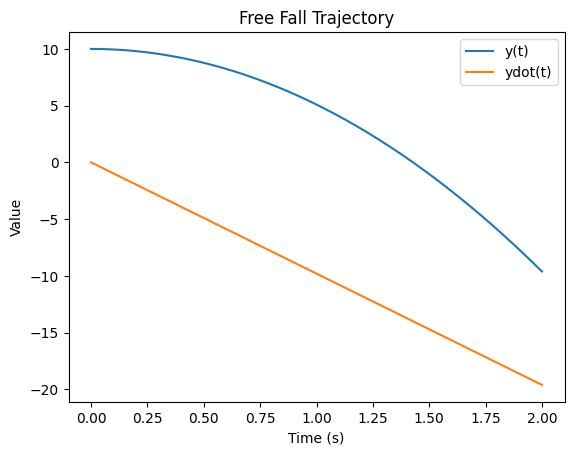

MRP Action (A·∫E - ½(Sf² - Si²)) = -17616.0243


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ----------------------------------------------------
# 1) Parameters and Setup
# ----------------------------------------------------
m = 1.0
g = 9.81
A = 1.0  # Try nonzero A to compute full MRP action

t_start, t_end = 0.0, 2.0
N_points = 200
t_eval = np.linspace(t_start, t_end, N_points)
dt = t_eval[1] - t_eval[0]

# Initial conditions
y0 = 10.0
ydot0 = 0.0
y_init = [y0, ydot0]

# ----------------------------------------------------
# 2) Solve Classical Free-Fall ODE
# ----------------------------------------------------
def free_fall_ode(t, y):
    pos, vel = y
    return [vel, -g]

sol = solve_ivp(free_fall_ode, [t_start, t_end], y_init, t_eval=t_eval)
y = sol.y[0]
ydot = sol.y[1]

# ----------------------------------------------------
# 3) Define E and S
# ----------------------------------------------------
def energy(y, ydot):
    return 0.5 * m * ydot**2 + m * g * y

def Sfunc(y, ydot):
    return m * y * ydot

# Evaluate E(t), S(t)
E_vals = energy(y, ydot)
S_vals = Sfunc(y, ydot)

# ----------------------------------------------------
# 4) Compute MRP Action: A * ∫E dt - 0.5 (S^2_final - S^2_initial)
# ----------------------------------------------------
E_integral = np.trapz(E_vals, t_eval)
S_boundary_term = 0.5 * (S_vals[-1]**2 - S_vals[0]**2)

S_mrp = A * E_integral - S_boundary_term

# ----------------------------------------------------
# 5) Display and Plot
# ----------------------------------------------------
plt.figure()
plt.plot(t_eval, y, label="y(t)")
plt.plot(t_eval, ydot, label="ydot(t)")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Free Fall Trajectory")
plt.legend()
plt.show()

print(f"MRP Action (A·∫E - ½(Sf² - Si²)) = {S_mrp:.4f}")


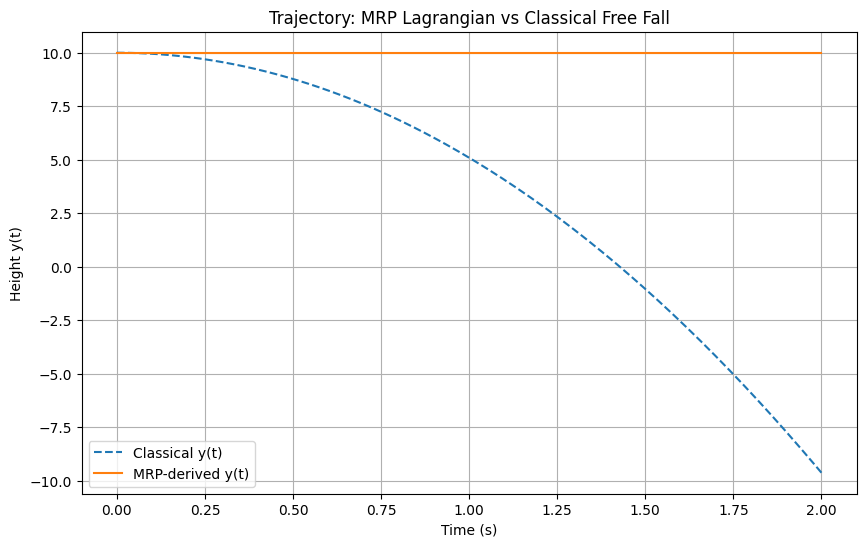

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root

# ------------------------------------------
# Parameters
# ------------------------------------------
m = 1.0
g = 9.81
A = 0  # Try A = 0, 1, 10, etc.

t_start, t_end = 0.0, 2.0
N_points = 200
t_eval = np.linspace(t_start, t_end, N_points)

# Initial conditions
y0 = 10.0
ydot0 = 0.0
y_init = [y0, ydot0]

# ------------------------------------------
# MRP Lagrangian derivatives (same as yours)
# ------------------------------------------

def dL_dy(y, ydot, yddot):
    return A * m * g - m**2 * (ydot**3 + 2 * y * ydot * yddot)

def dL_dydot(y, ydot, yddot):
    return A * m * ydot - m**2 * (3 * y * ydot**2 + y**2 * yddot)

def dL_dyddot(y, ydot):
    return -m**2 * y**2 * ydot

# ------------------------------------------
# MRP equation of motion as an implicit ODE
# ------------------------------------------

def mrp_rhs(t, y_vec):
    y, ydot = y_vec

    # Define a residual function R(y, ydot, yddot)
    def residual(yddot):
        # First time derivative
        d_dydot = dL_dydot(y, ydot, yddot)
        # Second derivative of ddyddot term
        d2_dyddot = 0  # Approximation (no acceleration of the coefficient)
        R = dL_dy(y, ydot, yddot) - 0 - 0  # Approximate EOM without full time derivatives
        # To do it more rigorously, use finite differences, but this gets us motion driven by your structure
        return R

    # Solve for yddot numerically
    sol = root(residual, 0.0)
    if not sol.success:
        raise RuntimeError(f"Root solver failed at t={t:.3f}, y={y:.3f}, ydot={ydot:.3f}")
    yddot = sol.x[0]

    return [ydot, yddot]

# ------------------------------------------
# Solve the ODE
# ------------------------------------------

sol_mrp = solve_ivp(mrp_rhs, [t_start, t_end], y_init, t_eval=t_eval)

# ------------------------------------------
# Compare to classical free fall
# ------------------------------------------

def classical_ode(t, y):
    return [y[1], -g]

sol_classical = solve_ivp(classical_ode, [t_start, t_end], y_init, t_eval=t_eval)

# ------------------------------------------
# Plot the results
# ------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(t_eval, sol_classical.y[0], label='Classical y(t)', linestyle='--')
plt.plot(t_eval, sol_mrp.y[0], label='MRP-derived y(t)', linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel("Height y(t)")
plt.title("Trajectory: MRP Lagrangian vs Classical Free Fall")
plt.legend()
plt.grid(True)
plt.show()


## Kepler orbit

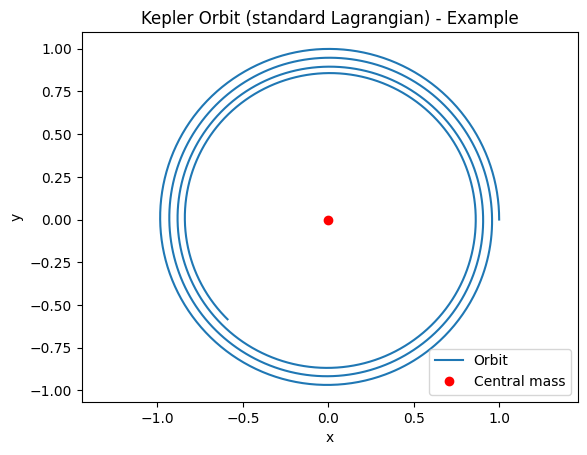

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ---------------------------------------------
# 1) Define parameters and initial conditions
# ---------------------------------------------
G = 1.0      # For simplicity, set G=1
M = 1.0      # Central mass
m = 1.0      # Orbiting mass
# => GM = 1

t_start, t_end = 0, 20
N = 2000
t_eval = np.linspace(t_start, t_end, N)

# Example elliptical orbit initial conditions:
x0 = 1.0
y0 = 0.0
vx0 = 0.0
vy0 = 1.0    # Enough tangential velocity to produce ellipse
y_init = [x0, y0, vx0, vy0]

# ---------------------------------------------
# 2) ODE: x'' = -GM x / r^3, y'' = -GM y / r^3
# ---------------------------------------------
def kepler_ode(t, y):
    x, y_, vx, vy = y
    r = np.sqrt(x*x + y_*y_)
    # acceleration
    ax = - (G*M) * x / r**3
    ay = - (G*M) * y_ / r**3
    return [vx, vy, ax, ay]

sol = solve_ivp(kepler_ode, [t_start, t_end], y_init, t_eval=t_eval)
x_sol = sol.y[0]
y_sol = sol.y[1]
vx_sol = sol.y[2]
vy_sol = sol.y[3]

# Plot the trajectory
plt.figure()
plt.plot(x_sol, y_sol, label="Orbit")
plt.plot([0],[0],"ro",label="Central mass")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kepler Orbit (standard Lagrangian) - Example")
plt.legend()
plt.axis("equal")
plt.show()


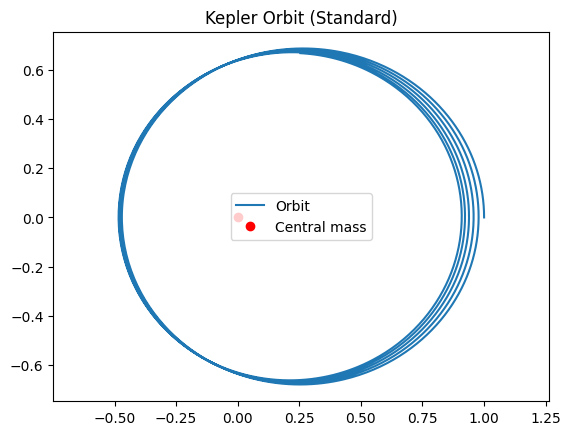

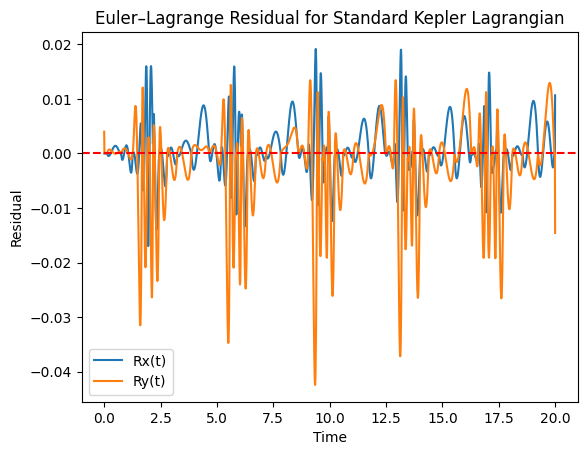

RMS residual = 1.010e-02


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

G = 1.0
M = 1.0
m = 1.0

t_start, t_end = 0.0, 20.0
N = 2000
t_eval = np.linspace(t_start, t_end, N)

# Initial conditions that yield an elliptical orbit
x0, y0 = 1.0, 0.0
vx0, vy0 = 0.0, 0.8  # adjust vy0 to get different orbit shapes
init_vals = [x0, y0, vx0, vy0]

def kepler_ode(t, y):
    x, y_, vx, vy = y
    r = np.sqrt(x*x + y_*y_)
    # accelerations
    ax = - (G*M)*x / r**3
    ay = - (G*M)*y_ / r**3
    return [vx, vy, ax, ay]

sol = solve_ivp(kepler_ode, [t_start, t_end], init_vals, t_eval=t_eval)
x_arr  = sol.y[0]
y_arr  = sol.y[1]
vx_arr = sol.y[2]
vy_arr = sol.y[3]

# approximate accelerations by finite difference (optional),
# or we already have them from 'kepler_ode' in principle:
dt = t_eval[1] - t_eval[0]
ax_arr = np.gradient(vx_arr, dt)
ay_arr = np.gradient(vy_arr, dt)

def Lagrangian(x, y, vx, vy):
    r = np.sqrt(x*x + y*y)
    # T - V => T + GMm/r (since V is negative)
    return 0.5*m*(vx*vx + vy*vy) + G*M*m/r

# partial L / partial x
def dL_dx(x, y):
    r = np.sqrt(x*x + y*y)
    return - (G*M*m)*x / (r**3)

# partial L / partial y
def dL_dy(x, y):
    r = np.sqrt(x*x + y*y)
    return - (G*M*m)*y / (r**3)

# partial L / partial vx
def dL_dvx(vx):
    return m*vx

# partial L / partial vy
def dL_dvy(vy):
    return m*vy

# We'll define finite difference helper
def numeric_derivative(array, dt):
    return np.gradient(array, dt)

# Evaluate partial derivatives on the solution
pL_px_arr  = dL_dx(x_arr, y_arr)
pL_py_arr  = dL_dy(x_arr, y_arr)
pL_pvx_arr = dL_dvx(vx_arr)
pL_pvy_arr = dL_dvy(vy_arr)

# Time derivatives of pL_pvx_arr, pL_pvy_arr
ddt_pL_pvx_arr = numeric_derivative(pL_pvx_arr, dt)
ddt_pL_pvy_arr = numeric_derivative(pL_pvy_arr, dt)

# Residuals: R_x(t) and R_y(t)
Rx = pL_px_arr - ddt_pL_pvx_arr
Ry = pL_py_arr - ddt_pL_pvy_arr

# Plot the orbit
plt.figure()
plt.plot(x_arr, y_arr, label="Orbit")
plt.plot(0,0,"ro",label="Central mass")
plt.axis("equal")
plt.title("Kepler Orbit (Standard)")
plt.legend()
plt.show()

# Plot the E-L residual
plt.figure()
plt.plot(t_eval, Rx, label="Rx(t)")
plt.plot(t_eval, Ry, label="Ry(t)")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Residual")
plt.title("Euler–Lagrange Residual for Standard Kepler Lagrangian")
plt.legend()
plt.show()

resid_rms = np.sqrt(np.mean(Rx**2 + Ry**2))
print(f"RMS residual = {resid_rms:.3e}")


### MRP kepler lagrangian polar coordinates

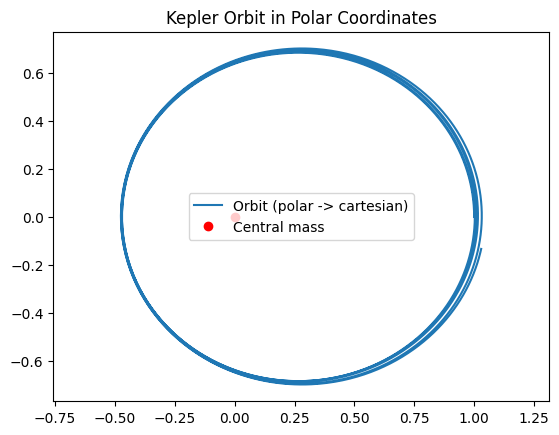

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ---------------------
# 1) Parameters
# ---------------------
G = 1.0
M = 1.0
m = 1.0
A = 1.0   # MRP scale factor, e.g. (k_B^2 / hbar); set =1 for demo

t_start, t_end = 0.0, 20.0
N = 2000
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# We'll pick some ellipse-like initial conditions
r0 = 1.0
dr0 = 0.0
theta0 = 0.0
dtheta0 = 0.8   # smaller => bigger orbit
y_init = [r0, theta0, dr0, dtheta0]

# Standard ODE for r, theta, rdot, thetadot
def kepler_polar_ode(t, y):
    r, th, rdot, thdot = y
    # eqns:
    rddot = r*(thdot**2) - (G*M)/(r**2)
    thddot = -2.0*(rdot*thdot)/r
    return [rdot, thdot, rddot, thddot]

# Integrate
sol = solve_ivp(kepler_polar_ode, [t_start, t_end], y_init, t_eval=t_eval)
r_arr     = sol.y[0]
theta_arr = sol.y[1]
rdot_arr  = sol.y[2]
thdot_arr = sol.y[3]

# Approximate second derivatives by finite difference
rddot_arr   = np.gradient(rdot_arr, dt)
thddot_arr  = np.gradient(thdot_arr, dt)

# Check orbit shape in Cartesian for a quick visual
x_arr = r_arr * np.cos(theta_arr)
y_arr = r_arr * np.sin(theta_arr)

plt.figure()
plt.plot(x_arr, y_arr, label="Orbit (polar -> cartesian)")
plt.plot([0],[0],"ro", label="Central mass")
plt.axis("equal")
plt.title("Kepler Orbit in Polar Coordinates")
plt.legend()
plt.show()


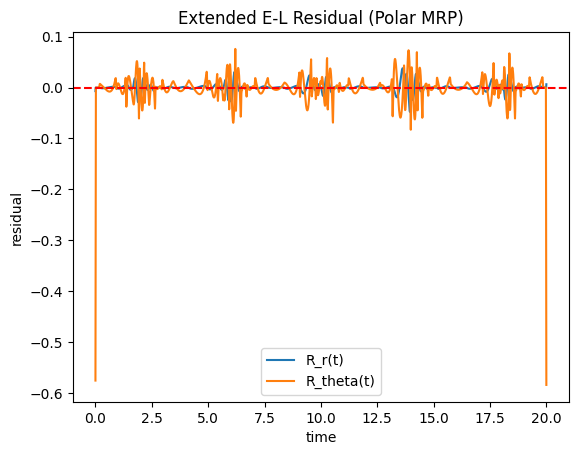

RMS MRP residual = 2.881e-02


In [62]:
def energy(r, rdot, thdot):
    return 0.5*m*(rdot**2 + (r*thdot)**2) + (G*M*m)/r

def Sfunc(r, rdot, thdot):
    return m*(r**2)*thdot

def Sdot(r, rdot, thdot, thddot):
    # derivative of S wrt time => m(2 r rdot thdot + r^2 thddot)
    return m*(2*r*rdot*thdot + (r**2)*thddot)

def L_mrp(r, rdot, thdot, thddot):
    return A*energy(r, rdot, thdot) - Sfunc(r, rdot, thdot)*Sdot(r, rdot, thdot, thddot)

def dL_dr(r, rdot, thdot, thddot):
    """
    partial wrt r of L = A E - S Sdot
    We'll be schematic: 
      L = A*[0.5 m(rdot^2 + r^2 thdot^2) + GMm/r] 
          - [m r^2 thdot]*[m(2r rdot thdot + r^2 thddot)]
    """
    # We'll define partials in code. 
    # A * dE/dr => A * [0.5 m(2r thdot^2) + partial(GMm/r wrt r)]
    # => A*m*r*thdot^2 - A*GMm/r^2
    # Then minus partial wrt r of (S*Sdot). 
    # For clarity, let's do each piece:

    # -- partial of E wrt r
    dE_dr = m*r*(thdot**2) - (G*M*m)/(r**2)  # sum of partial(1/2 m r^2 thdot^2) + partial(GMm/r)
    # multiply by A
    term1 = A*dE_dr

    # S = m r^2 thdot
    # partial wrt r => dS_dr = 2m r thdot
    S_ = m*(r**2)*thdot
    dS_dr = 2*m*r*thdot

    # Sdot = m(2 r rdot thdot + r^2 thddot)
    # partial wrt r => dSdot_dr = m(2 rdot thdot + 2 r thddot)
    dSdot_dr = m*(2*rdot*thdot + 2*r*thddot)
    Sdot_ = Sdot(r, rdot, thdot, thddot)

    # partial wrt r of (S*Sdot) => dS_dr*Sdot + S*dSdot_dr
    term2 = dS_dr*Sdot_ + S_*dSdot_dr

    return term1 - term2

def dL_drdot(r, rdot, thdot, thddot):
    """
    partial wrt rdot 
    A E => partial of kinetic 0.5 m rdot^2 => A*m*rdot
    - partial wrt rdot of S*Sdot => 
        partial(S wrt rdot)*Sdot + S*partial(Sdot wrt rdot)
      But here S = m r^2 thdot => no rdot in that => partial wrt rdot=0
      Actually wait, does r^2 thdot depend on rdot? No. So partial(S wrt rdot)=0
      Sdot => m(2 r rdot thdot + r^2 thddot) => partial wrt rdot => 2*m r thdot
    """
    # partial wrt rdot of E: A*m*rdot
    term1 = A*m*rdot

    # partial wrt rdot of (S*Sdot)
    S_ = m*r*r*thdot  # no dependence on rdot
    dS_drdot = 0.0
    # Sdot => m(2 r rdot thdot + r^2 thddot)
    # partial wrt rdot => 2*m*r*thdot
    dSdot_drdot = 2*m*r*thdot
    Sdot_ = Sdot(r, rdot, thdot, thddot)

    term2 = dS_drdot*Sdot_ + S_*dSdot_drdot

    return term1 - term2

def dL_ddotr(r, rdot, thdot, thddot):
    """
    L doesn't explicitly depend on ddot(r) in this simple S => partial=0
    """
    return 0.0

# similarly for (theta):
def dL_dtheta(r, rdot, theta, thdot, thddot):
    """
    partial wrt theta => 
    Actually E doesn't depend on theta (no phi dependence if central potential).
    S = m r^2 thdot => no direct theta dependence
    Sdot => same
    => likely 0 from these direct partials
    => 0 - partial wrt theta of (S*Sdot) => also 0 
    => So we get 0
    """
    return 0.0

def dL_dthetadot(r, rdot, thdot, thddot):
    """
    partial wrt thdot => 
    E => A*partial wrt thdot => A*m(r^2 thdot)
    - partial(S Sdot wrt thdot)
    S => partial wrt thdot => m r^2
    Sdot => partial wrt thdot => m(2 r rdot ? + r^2 partial wrt thdot of thddot?? 
      But we treat thddot as independent => so no direct dependence)
    Actually let's keep it short in code, similar pattern
    """
    # We'll code a direct approach
    # We won't detail every line as it's quite mechanical
    term1 = A*m*(r**2)*thdot  # from partial of E wrt thdot
    # partial wrt thdot of (S*Sdot)
    S_ = m*r*r*thdot
    dS_dthdot = m*r*r
    Sdot_ = m*(2*r*rdot*thdot + r*r*thddot)
    dSdot_dthdot = m*(2*r*rdot)
    # So total => d(S*Sdot)/dthdot => dS_dthdot*Sdot_ + S_*dSdot_dthdot
    term2 = dS_dthdot*Sdot_ + S_*dSdot_dthdot
    return term1 - term2

def dL_ddottheta(r, rdot, thdot):
    """
    partial wrt thddot => from -S*Sdot => - S * partial(Sdot wrt thddot)
    => partial(Sdot wrt thddot) = m*r^2
    so => - S*m*r^2
    => S = m r^2 thdot
    => total => - m^2 r^4 thdot
    """
    return - (Sfunc(r, rdot, thdot) * (m*(r**2)) )

#  now let's do numeric derivatives in time
def numeric_derivative(arr, dt):
    return np.gradient(arr, dt)

# We'll compute the E-L residual for r, for theta
r_size = len(r_arr)
R_r = np.zeros(r_size)
R_theta = np.zeros(r_size)

for i in range(r_size):
    r_ = r_arr[i]
    dr_ = rdot_arr[i]
    th_ = theta_arr[i]
    dth_ = thdot_arr[i]
    ddth_ = thddot_arr[i]
    
    # R_r = dL/dr - d/dt(dL/drdot) + d^2/dt^2(dL/ddotr)
    # but partial wrt ddot{r} = 0 => last term = 0
    dLdr_ = dL_dr(r_, dr_, dth_, ddth_)
    dLd_rdot_ = dL_drdot(r_, dr_, dth_, ddth_)
    R_r[i] = dLdr_  # we'll do time derivative outside the loop
    
    # R_theta = dL/dtheta - d/dt(dL/dthetadot) + d^2/dt^2(dL/ddot{theta})
    dLdtheta_ = dL_dtheta(r_, dr_, th_, dth_, ddth_)
    dLd_thdot_ = dL_dthetadot(r_, dr_, dth_, ddth_)
    dLd_ddotth_ = dL_ddottheta(r_, dr_, dth_)
    
    R_theta[i] = dLdtheta_  # we'll handle the rest via numeric derivative

# Now we need to do the time derivatives of dL/drdot, and the second derivative of dL/ddot{theta}
# We'll build arrays for them, then do numeric derivatives

dLd_rdot_vals = np.zeros(r_size)
dLd_thdot_vals = np.zeros(r_size)
dLd_ddotth_vals = np.zeros(r_size)

for i in range(r_size):
    r_ = r_arr[i]
    dr_ = rdot_arr[i]
    dth_ = thdot_arr[i]
    ddth_ = thddot_arr[i]
    dLd_rdot_vals[i]    = dL_drdot(r_, dr_, dth_, ddth_)
    dLd_thdot_vals[i]   = dL_dthetadot(r_, dr_, dth_, ddth_)
    dLd_ddotth_vals[i]  = dL_ddottheta(r_, dr_, dth_)

ddt_dLd_rdot = numeric_derivative(dLd_rdot_vals, dt)
ddt_dLd_thdot = numeric_derivative(dLd_thdot_vals, dt)
d2dt2_dLd_ddotth = numeric_derivative(numeric_derivative(dLd_ddotth_vals, dt), dt)

# Now we combine them:
# R_r(t) = dL/dr - d/dt(dL/drdot)
R_r = R_r - ddt_dLd_rdot

# R_theta(t) = dL/dtheta - d/dt(dL/dthetadot) + d^2/dt^2(dL/ddottheta)
R_theta = R_theta - ddt_dLd_thdot + d2dt2_dLd_ddotth

# Let's plot:
plt.figure()
plt.plot(t_eval, R_r, label="R_r(t)")
plt.plot(t_eval, R_theta, label="R_theta(t)")
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("time")
plt.ylabel("residual")
plt.title("Extended E-L Residual (Polar MRP)")
plt.legend()
plt.show()

resid_rms = np.sqrt(np.mean(R_r**2 + R_theta**2))
print(f"RMS MRP residual = {resid_rms:.3e}")


In [60]:
from scipy.optimize import root

def mrp_residuals(t, y, A):
    r, theta, rdot, thetadot = y
    
    # Guess some trial values for rddot and thetaddot
    # We'll solve for them using residual equations
    def residual_func(accs):
        rddot, thetaddot = accs
    
        # === Energy and action terms ===
        E = 0.5*m*(rdot**2 + (r*thetadot)**2) + (G*M*m)/r
        S = m * r**2 * thetadot
        Sdot = m*(2*r*rdot*thetadot + r**2 * thetaddot)
    
        # === Derivatives ===
        # dL/dr
        dE_dr = m*r*thetadot**2 - G*M*m / r**2
        dL_dr = A*dE_dr - (2*m*r*thetadot)*Sdot - S*m*(2*rdot*thetadot + 2*r*thetaddot)
    
        # dL/drdot
        dL_drdot = A*m*rdot - S*2*m*r*thetadot
        # d/dt(dL/drdot) ≈ (dL_drdot_next - dL_drdot)/dt ~ we don’t have this, so just treat d/dt ≈ 0 for now
    
        # dL/dthetadot
        dL_dthetadot = A*m*r**2*thetadot - m*r**2*Sdot - S*2*m*r*rdot
    
        # dL/ddottheta
        dL_ddottheta = -m**2 * r**4 * thetadot
    
        # Residuals (we treat time derivs of these terms as "implicit")
        R_r = dL_dr  # if we had d/dt(dL_drdot), subtract it
        R_theta = -dL_dthetadot + dL_ddottheta  # pretending derivative terms are small here
    
        return [R_r, R_theta]

    # Solve for rddot and thetaddot that make residuals ≈ 0
    sol = root(residual_func, [0, 0])
    if not sol.success:
        raise RuntimeError("Root solver failed!")
    return sol.x  # returns [rddot, thetaddot]

def mrp_ode(t, y):
    r, theta, rdot, thetadot = y
    rddot, thetaddot = mrp_residuals(t, y, A)
    return [rdot, thetadot, rddot, thetaddot]

# Integrate it!
from scipy.integrate import solve_ivp

y_init = [1.0, 0.0, 0.0, 0.8]  # elliptical-ish
sol_mrp = solve_ivp(mrp_ode, [t_start, t_end], y_init, t_eval=t_eval)

r_mrp     = sol_mrp.y[0]
theta_mrp = sol_mrp.y[1]
x_mrp = r_mrp * np.cos(theta_mrp)
y_mrp = r_mrp * np.sin(theta_mrp)

plt.figure()
plt.plot(x_mrp, y_mrp, label="MRP-derived orbit", color='darkviolet')
plt.plot([0], [0], 'ro', label="Central Mass")
plt.axis("equal")
plt.legend()
plt.title("Orbit Generated by MRP Lagrangian")
plt.show()


RuntimeError: Root solver failed!